# **Evaluation of Feature Enhancement**  
  
  

## **Contents**
1. [Importing Libraries](evaluation_of_feature_enhancement.ipynb#1-importing-libraries)  
   
2. [Load Results](evaluation_of_feature_enhancement.ipynb#2-load-results)  
   
3. [RMSE and MAE](evaluation_of_feature_enhancement.ipynb#3-rmse-and-mae)  
   - 3.1 [RMSE and MAE Statistical Analysis](evaluation_of_feature_enhancement.ipynb#3.1-rmse-and-mae-statistical-analysis)  
  
4. [CG-EGA Summary Classification](evaluation_of_feature_enhancement.ipynb#4-cg-ega-summary-classification)
   - 4.1 [CG-EGA Summary Classification Statistical Analysis](evaluation_of_feature_enhancement.ipynb#4.1-cg-ega-summary-classification-statistical-analysis)  
  


## **1. Importing Libraries**

In [50]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from IPython.display import display


current_dir = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.join(current_dir, "../../"))

sys.path.append(os.path.join(PROJECT_ROOT, "shared_utilities"))
try:
	from metrics import *
except ModuleNotFoundError:
	print("Module 'metrics' not found. Please ensure it exists in the 'shared_utilities' directory.")

In [2]:
ptid_list = [540, 544, 552, 559, 563, 567, 570, 575, 584, 588, 591, 596]


## **2. Load Results**

In [3]:
"""Base Model Evaluation Files"""

base_eval_dir = os.path.join(PROJECT_ROOT, "models/jpformer/population_jpformer_final_model/population_jpformer_ohio_ptid_results")

base_overall_dict = {}

aggregate_df = pd.DataFrame()

for ptid in ptid_list:
    base_eval_df = pd.read_csv(os.path.join(base_eval_dir, f"patient_{ptid}", "base_model_eval", f"patient_{ptid}_base_model_detailed_test.csv"))
    base_overall_dict[ptid] = base_eval_df


all_base_dfs = list(base_overall_dict.values())

aggregate_base_df = pd.concat(all_base_dfs, axis=0)
aggregate_base_df = aggregate_base_df.reset_index(drop=True)

aggregate_base_df.head()


,sequence_id,timepoint,true,predicted,dy_true,dy_pred,true_glucose,predicted_glucose,dy_true_glucose,dy_pred_glucose,P_EGA_Class,R_EGA_Class,CG_EGA_Class,glycemic_region
0,0,0,-0.411417,-0.373452,0.000000,0.000000,124.0,126.667880,0.0,0.000000,A,A,AP,eu
1,0,1,-0.397187,-0.387933,0.002846,-0.002896,125.0,125.650270,0.2,-0.203523,A,A,AP,eu
2,0,2,-0.382956,-0.405007,0.002846,-0.003415,126.0,124.450485,0.2,-0.239956,A,A,AP,eu
3,0,3,-0.368725,-0.392831,0.002846,0.002435,127.0,125.306114,0.2,0.171125,A,A,AP,eu
4,0,4,-0.368725,-0.406312,0.000000,-0.002696,127.0,124.358790,0.0,-0.189465,A,A,AP,eu


In [4]:
fine_tuned_dir = os.path.join(PROJECT_ROOT, "models/jpformer/fine_tuning_development_files/loss_function_weights_lowest")

fine_tuned_dict = {}

for ptid in ptid_list:
    fine_tuned_df = pd.read_csv(os.path.join(fine_tuned_dir, f"patient_{ptid}/fine_tuning_eval/patient_{ptid}_detailed_test_results.csv"))
    fine_tuned_dict[ptid] = fine_tuned_df



all_fine_tuned_dfs = list(fine_tuned_dict.values())

aggregate_fine_tuned_df = pd.concat(all_fine_tuned_dfs, axis=0)
aggregate_fine_tuned_df = aggregate_fine_tuned_df.reset_index(drop=True)

aggregate_fine_tuned_df.head()


,sequence_id,timepoint,true,predicted,dy_true,dy_pred,true_glucose,predicted_glucose,dy_true_glucose,dy_pred_glucose,P_EGA_Class,R_EGA_Class,CG_EGA_Class,glycemic_region
0,0,0,-1.236799,-1.491586,0.000000,0.000000,66.0,48.096024,0.0,0.000000,A,A,AP,hypo
1,0,1,-1.251030,-1.489212,-0.002846,0.000475,65.0,48.262817,-0.2,0.033358,A,A,AP,hypo
2,0,2,-1.236799,-1.497855,0.002846,-0.001728,66.0,47.655525,0.2,-0.121458,A,A,AP,hypo
3,0,3,-1.236799,-1.500269,0.000000,-0.000483,66.0,47.485855,0.0,-0.033933,A,A,AP,hypo
4,0,4,-1.251030,-1.488368,-0.002846,0.002380,65.0,48.322166,-0.2,0.167262,A,A,AP,hypo


## **Aggregate Results**

## **3. RMSE and MAPE**

In [5]:
# Define a simple RMSE function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

base_rmse = calculate_rmse(aggregate_base_df['true_glucose'], aggregate_base_df['predicted_glucose'])
fine_tuned_rmse = calculate_rmse(aggregate_fine_tuned_df['true_glucose'], aggregate_fine_tuned_df['predicted_glucose'])



def mape(predictions, targets):
    return np.mean(np.abs((predictions - targets) / targets)) * 100

base_mape = mape(aggregate_base_df['predicted_glucose'], aggregate_base_df['true_glucose'])
fine_tuned_mape = mape(aggregate_fine_tuned_df['predicted_glucose'], aggregate_fine_tuned_df['true_glucose'])


In [6]:
# create table with model in 1st column and rmse and mae in 2nd and 3rd columns
rmse_mape_table = pd.DataFrame({'model': ['base model', 'fine-tuned models'], 'MSE': [base_rmse, fine_tuned_rmse], 'MAPE': [base_mape, fine_tuned_mape]})
rmse_mape_table


,model,MSE,MAPE
0,base model,38.710591,18.372019
1,fine-tuned models,39.155467,18.618670


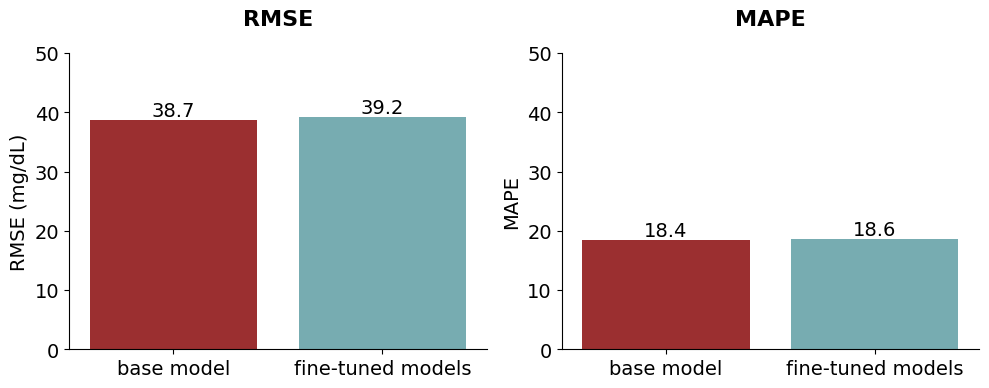

In [7]:
# plot comparison column chart for RMSE and MAE and display in a 2x1 grid
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
palette = [model1_color, model2_color]

# Plot RMSE
sns.barplot(x='model', y='MSE', data=rmse_mape_table, ax=axs[0], hue='model', palette=palette, legend=False)
axs[0].set_title('RMSE', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('RMSE (mg/dL)', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label

# Plot MAE
sns.barplot(x='model', y='MAPE', data=rmse_mape_table, ax=axs[1], hue='model', palette=palette, legend=False)
axs[1].set_title('MAPE', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('MAPE', fontsize=14)
axs[1].set_xlabel('')  # Remove x-axis label

# Set y-axis limits and add data labels
for ax in axs:
    ax.set_ylim(0, 50)  # Adjusted to better fit the data range
    # Make tick labels smaller
    ax.tick_params(axis='both', labelsize=14)
    # Add data labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=14)
    # Remove top and right borders
    sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.show()


### **3.1 RMSE and MAPE Statistical Analysis**



In [8]:
def return_ttests(no_fe_model, fe_model, glycemic_region, model1_name="Model w/o FE", model2_name="Model w/ FE"):
    print(f"\n🔍 Running t-test for {model1_name} vs {model2_name} ({glycemic_region.capitalize()}glycaemic Range Performance):\n")

    # Copy data to avoid modifying the originals
    df1 = no_fe_model.copy()
    df2 = fe_model.copy()

    # Filter based on glycemic region
    glycemic_region = glycemic_region.lower()
    if glycemic_region == 'hypo':
        df1 = df1[df1['glycemic_region'] == 'hypo']
        df2 = df2[df2['glycemic_region'] == 'hypo']
    elif glycemic_region == 'hyper':
        df1 = df1[df1['glycemic_region'] == 'hyper']
        df2 = df2[df2['glycemic_region'] == 'hyper']
    elif glycemic_region == 'eu':
        df1 = df1[df1['glycemic_region'] == 'eu']
        df2 = df2[df2['glycemic_region'] == 'eu']
    else:
        pass  # Use all data if 'overall' or invalid

    # Calculate errors
    df1['absolute_error'] = np.abs(df1['true_glucose'] - df1['predicted_glucose'])
    df2['absolute_error'] = np.abs(df2['true_glucose'] - df2['predicted_glucose'])

    df1['squared_error'] = df1['absolute_error'] ** 2
    df2['squared_error'] = df2['absolute_error'] ** 2
    
    # Calculate percentage errors for MAPE
    df1['percentage_error'] = np.abs((df1['true_glucose'] - df1['predicted_glucose']) / df1['true_glucose']) * 100
    df2['percentage_error'] = np.abs((df2['true_glucose'] - df2['predicted_glucose']) / df2['true_glucose']) * 100

    # Use Welch's t-test (unpaired, unequal variance)
    tt_mse, p_mse = stats.ttest_ind(df1['squared_error'], df2['squared_error'], equal_var=False)
    tt_mape, p_mape = stats.ttest_ind(df1['percentage_error'], df2['percentage_error'], equal_var=False)

    # Format results
    results = pd.DataFrame({
        "Metric": ["RMSE", "MAPE"],
        "t-statistic": [tt_mse, tt_mape],
        "p-value": [p_mse, p_mape],
        "Significance (p < 0.05)": [p_mse < 0.05, p_mape < 0.05]
    })

    display(results)
    return results

In [9]:
overall_ttests = return_ttests(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region="overall", model1_name="Base Model", model2_name="Fine-tuned Model")



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-5.429634,5.648204e-08,True
1,MAPE,-6.935723,4.043776e-12,True


## **4. CG-EGA Summary Classifications**

In [10]:
# ADD BINARY COLUM FOR ACCURATE PREDICTION BASED ON CGEGA_CLASS COLUMN
aggregate_base_df['AP'] = np.where(aggregate_base_df['CG_EGA_Class'] == 'AP', 1, 0)
aggregate_base_df['BE'] = np.where(aggregate_base_df['CG_EGA_Class'] == 'BE', 1, 0)
aggregate_base_df['EP'] = np.where(aggregate_base_df['CG_EGA_Class'] == 'EP', 1, 0)


aggregate_fine_tuned_df['AP'] = np.where(aggregate_fine_tuned_df['CG_EGA_Class'] == 'AP', 1, 0)
aggregate_fine_tuned_df['BE'] = np.where(aggregate_fine_tuned_df['CG_EGA_Class'] == 'BE', 1, 0)
aggregate_fine_tuned_df['EP'] = np.where(aggregate_fine_tuned_df['CG_EGA_Class'] == 'EP', 1, 0)

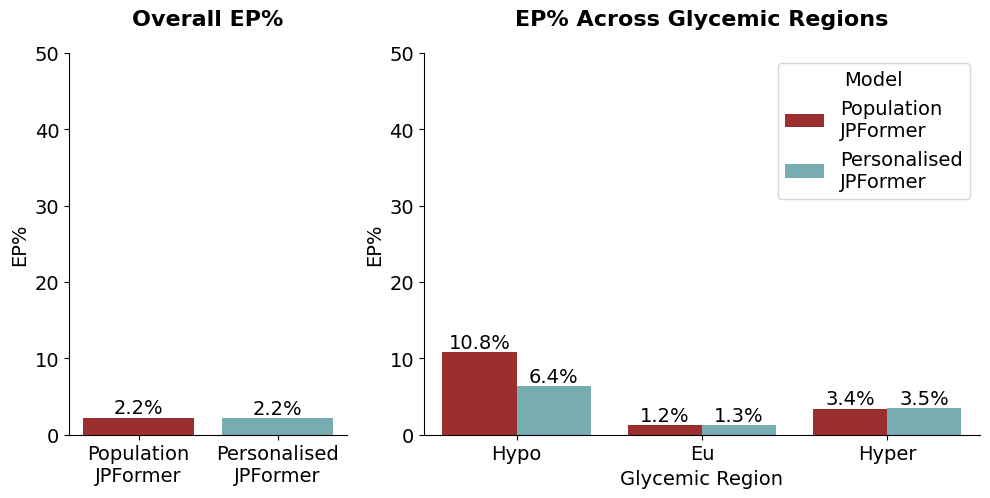

In [11]:
# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
palette = [model1_color, model2_color]

# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })
    
    # Process each model
    for model, df in zip(['Population\nJPFormer', 'Personalised\nJPFormer'], 
                        [aggregate_base_df, aggregate_fine_tuned_df]):
        
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Create 1x2 grid figure with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

# PLOT 1: Overall EP% (left panel)
sns.barplot(
    x='Model', 
    y='EP_pct', 
    data=summary_tables['overall'], 
    ax=axs[0], 
    palette=palette,
    hue='Model',
    legend=False
)
axs[0].set_title('Overall EP%', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('EP%', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_ylim(0, 50)  # Set y-axis range from 0 to 50
axs[0].grid(False)  # Remove gridlines

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=14)

# PLOT 2: EP% by Glycemic Region (right panel)
# Create a new dataframe that combines the regional data for plotting
regional_data = pd.concat([
    summary_tables['hypo'][['Model', 'EP_pct']].assign(Region='Hypo'),
    summary_tables['eu'][['Model', 'EP_pct']].assign(Region='Eu'),
    summary_tables['hyper'][['Model', 'EP_pct']].assign(Region='Hyper')
])

sns.barplot(
    x='Region', 
    y='EP_pct', 
    hue='Model',
    data=regional_data, 
    ax=axs[1], 
    palette=palette
)
axs[1].set_title('EP% Across Glycemic Regions', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('EP%', fontsize=14)
axs[1].set_xlabel('Glycemic Region', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(0, 50)  # Set y-axis range from 0 to 50
axs[1].grid(False)  # Remove gridlines

# Add data labels to the second chart
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', fontsize=14)

# Add legend to the right plot
axs[1].legend(title='Model', fontsize=14, title_fontsize=14)

# Remove top and right borders
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()


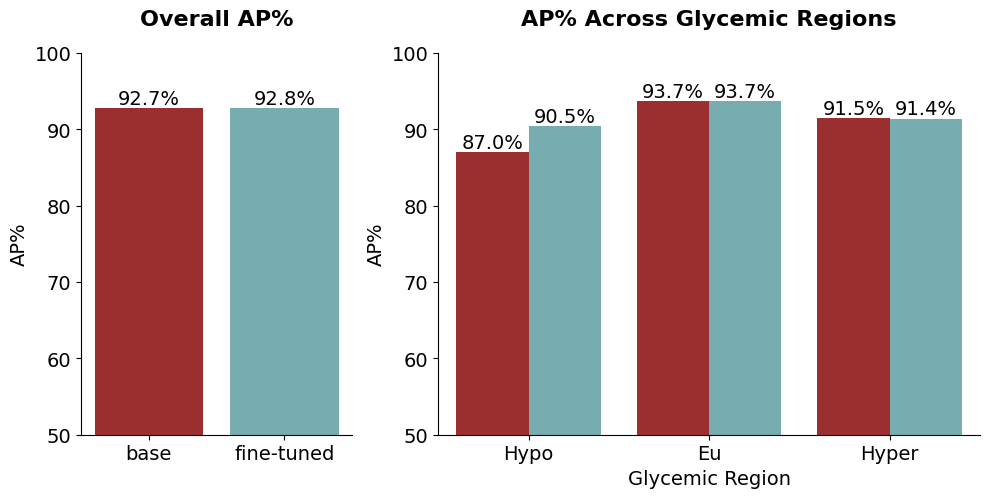

In [12]:
# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
palette = [model1_color, model2_color]

# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })

    
    # Process each model
    for model, df in zip(['base', 'fine-tuned'], 
                        [aggregate_base_df, aggregate_fine_tuned_df]):
        
        
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Create 1x2 grid figure with custom width ratios
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

# PLOT 1: Overall AP% (left panel)
sns.barplot(
    x='Model', 
    y='AP_pct', 
    data=summary_tables['overall'], 
    ax=axs[0], 
    palette=palette,
    hue='Model',
    legend=False
)
axs[0].set_title('Overall AP%', fontsize=16, fontweight='bold', pad=20)
axs[0].set_ylabel('AP%', fontsize=14)
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_ylim(50, 100)  # Set y-axis range from 0 to 100

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=14)

# PLOT 2: AP% by Glycemic Region (right panel)
# Create a new dataframe that combines the regional data for plotting
regional_data = pd.concat([
    summary_tables['hypo'][['Model', 'AP_pct']].assign(Region='Hypo'),
    summary_tables['eu'][['Model', 'AP_pct']].assign(Region='Eu'),
    summary_tables['hyper'][['Model', 'AP_pct']].assign(Region='Hyper')
])

sns.barplot(
    x='Region', 
    y='AP_pct', 
    hue='Model',
    data=regional_data, 
    ax=axs[1], 
    palette=palette,
    legend=False
)
axs[1].set_title('AP% Across Glycemic Regions', fontsize=16, fontweight='bold', pad=20)
axs[1].set_ylabel('AP%', fontsize=14)
axs[1].set_xlabel('Glycemic Region', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(50, 100)  # Set y-axis range from 0 to 100

# Add data labels to the second chart
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.1f%%', fontsize=14)

# Add legend to the right plot


# Remove top and right borders
sns.despine(ax=axs[0])
sns.despine(ax=axs[1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()


In [13]:
def return_ep_ph_chart(model1, model2, glycemic_region):
    # Process data for each model using the create_timepoint_ega_dataframe function
    model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
    model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)

    # Plot the Erroneous Prediction % for both models
    plt.figure(figsize=(10, 4))

    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement


    plt.plot(model1_timepoint_table.index[1:], model1_timepoint_table['EP_percent'][1:], 
             label='Population JPFormer', marker='o', linestyle='-', markersize=4, 
             color=model1_color)
    plt.plot(model2_timepoint_table.index[1:], model2_timepoint_table['EP_percent'][1:], 
             label='Personalised JPFormer', marker='o', linestyle='-', markersize=4, 
             color=model2_color)

    # Add titles and labels

    plt.title(f'EP%  by Prediction Horizon', 
              fontsize=16, fontweight='bold', ha='center', pad=20)
    plt.xlabel('Prediction Horizon (mins)', fontsize=14, labelpad=5, ha='center')
    plt.ylabel('EP Percent', fontsize=14, labelpad=5)
    plt.xticks(range(0, 121, 30), fontsize=14)
    plt.yticks(fontsize=14)

    # Format legend
    legend = plt.legend(title='Model', fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
                        ncol=2, frameon=False)

    legend.get_title().set_fontsize(14)

    # Add grid and styling
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.ylim(0, 50)  
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()


In [14]:
def create_timepoint_ega_dataframe(df, region=None):
    # Initialize a dataframe to store results with proper data types
    result_df = pd.DataFrame(index=(np.arange(24)+1) * 5)  # timepoints (n+1) * 5
    result_df.index.name = 'timepoint'
    
    # Initialize columns for percentages, counts and total
    result_df['AP_percent'] = 0.0
    result_df['BP_percent'] = 0.0
    result_df['EP_percent'] = 0.0
    result_df['AP_count'] = 0
    result_df['BP_count'] = 0
    result_df['EP_count'] = 0
    result_df['Total_count'] = 0

    
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()

    if region == 'hypo':
        # Filter for hypoglycemic readings only
        df = df[df['glycemic_region'] == 'hypo']
    elif region == 'hyper':
        # Filter for hyperglycemic readings only
        df = df[df['glycemic_region'] == 'hyper']
    elif region == 'eu':
        # Filter for euglycemic readings only
        df = df[df['glycemic_region'] == 'eu']
    else:
        df = df  # Use all data

    # Process each timepoint
    for timepoint in range(1,24):
        # Filter data for this timepoint
        timepoint_data = df[df['timepoint'] == timepoint]
        
        if len(timepoint_data) > 0:
            # Count occurrences of each CG_EGA_Class
            class_counts = timepoint_data['CG_EGA_Class'].value_counts()
            total_points = len(timepoint_data)
            
            # Store total count for this timepoint
            result_df.loc[(timepoint + 1) * 5, 'Total_count'] = total_points
            
            # Calculate percentages and counts for AP, BP, and EP
            for class_prefix in ['A', 'B', 'E']:
                # Find all classes that start with this letter (AP, BP, EP)
                class_matches = [c for c in class_counts.index if c.startswith(class_prefix)]
                count = sum([class_counts[c] for c in class_matches if c in class_counts])
                
                # Store count
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_count'] = count
                
                # Store percentage
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_percent'] = float((count / total_points) * 100)

        timepoint_data.reset_index(drop=True, inplace=True)

    result_df['AP:EP'] = result_df['AP_count'] / result_df['EP_count']


    # result_df = result_df.drop(index=0)
    # result_df = result_df.reset_index()
    # result_df['timepoint'] = result_df['timepoint'].astype(int)

    
    return result_df






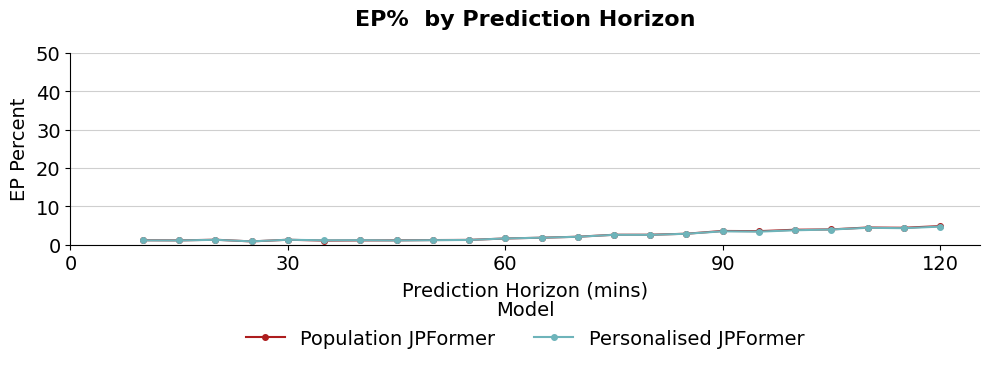

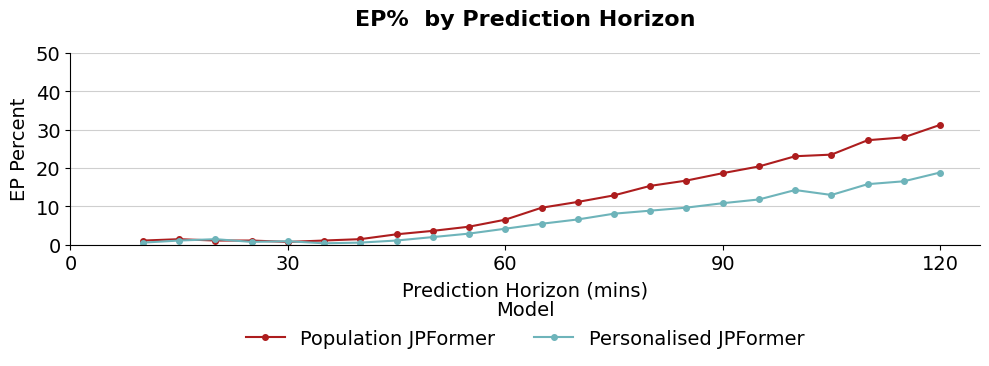

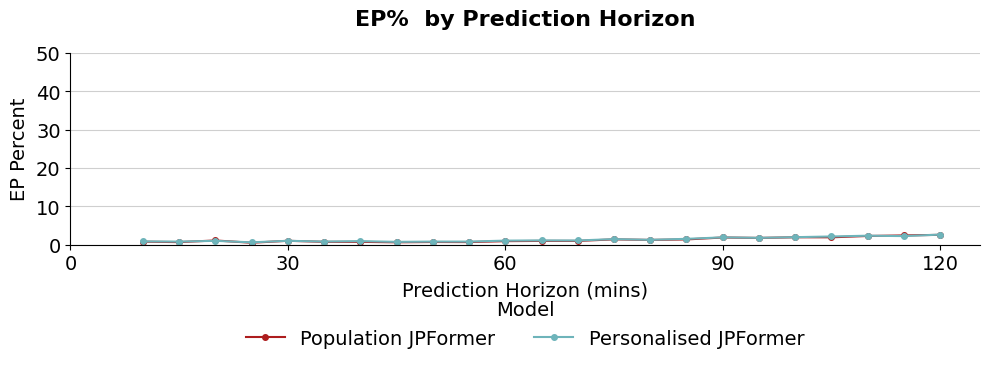

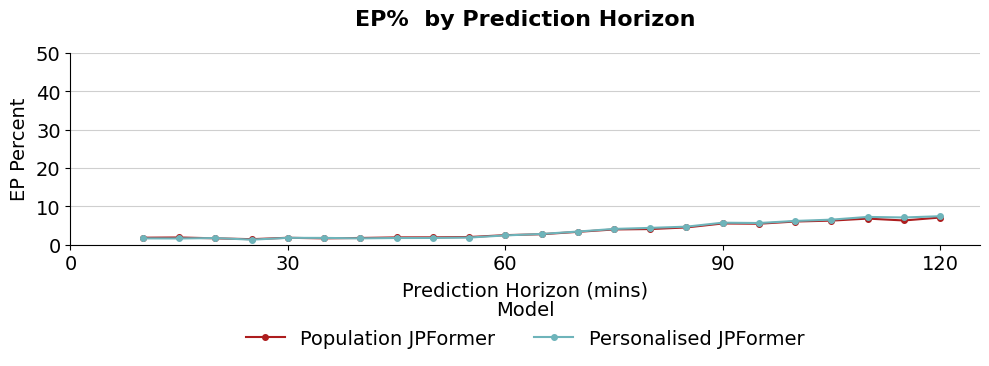

In [15]:
# Call the function with the appropriate arguments'
return_ep_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='overall')

return_ep_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='hypo')

return_ep_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='eu')

return_ep_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='hyper')

In [16]:
def return_ap_ph_chart(model1, model2, glycemic_region):
    # Process data for each model using the create_timepoint_ega_dataframe function
    model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
    model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)

    # Plot the Erroneous Prediction % for both models
    plt.figure(figsize=(10, 4))

    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement



    plt.plot(model1_timepoint_table.index[1:], model1_timepoint_table['AP_percent'][1:], 
             label='Population JPFormer', marker='o', linestyle='-', markersize=4, 
             color=model1_color)
    plt.plot(model2_timepoint_table.index[1:], model2_timepoint_table['AP_percent'][1:], 
             label='Personalised JPFormer', marker='o', linestyle='-', markersize=4, 
             color=model2_color)

    # Add titles and labels

    plt.title(f'AP%  by Prediction Horizon', 
              fontsize=16, fontweight='bold', ha='center', pad=20)
    plt.xlabel('Prediction Horizon (mins)', fontsize=14, labelpad=5, ha='center')
    plt.ylabel('AP Percent', fontsize=14, labelpad=5)
    plt.xticks(range(0, 121, 30), fontsize=14)
    plt.yticks(fontsize=14)

    # Format legend
    legend = plt.legend(title='Model', fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
                        ncol=2, frameon=False)

    legend.get_title().set_fontsize(14)

    # Add grid and styling
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.ylim(50, 100)  
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()


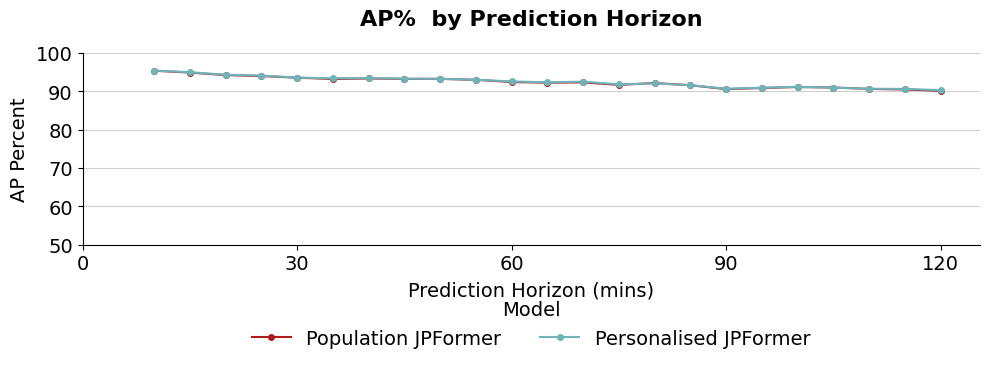

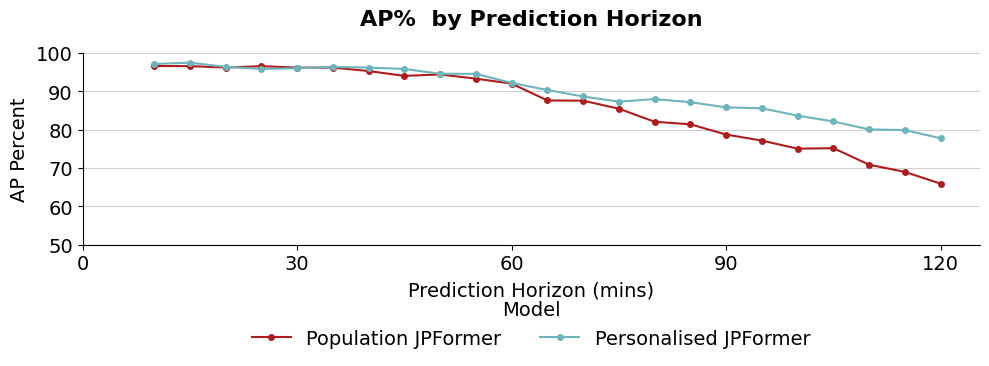

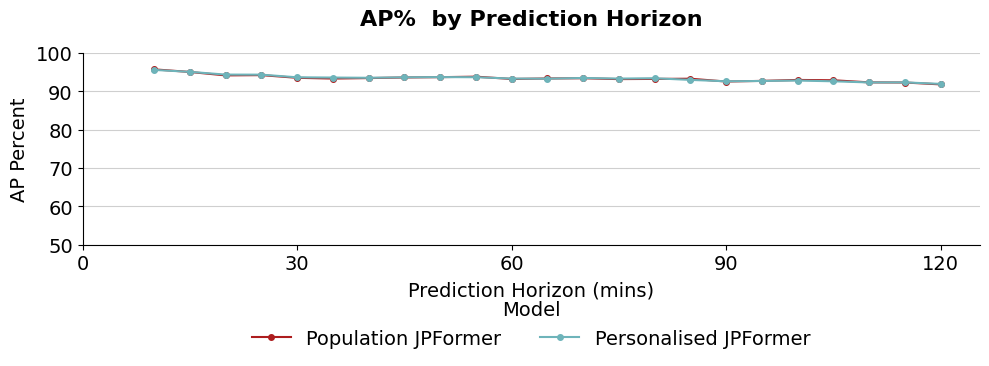

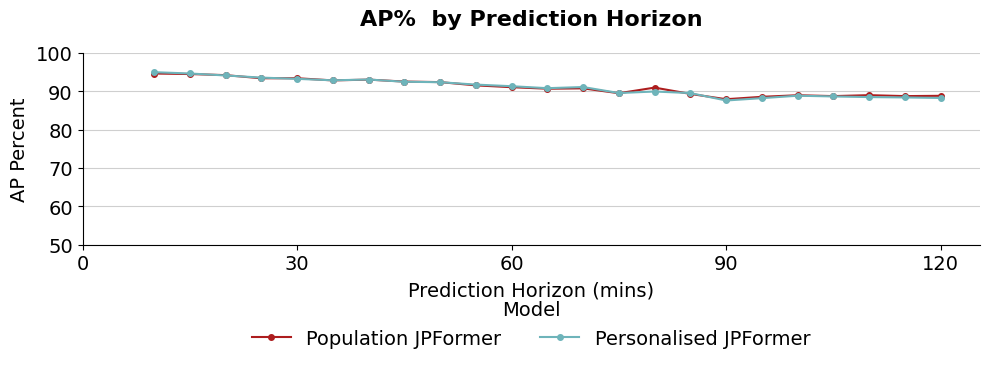

In [17]:
# Call the function with the appropriate arguments'
return_ap_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='overall')

return_ap_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='hypo')

return_ap_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='eu')

return_ap_ph_chart(model1=aggregate_base_df, model2=aggregate_fine_tuned_df, glycemic_region='hyper')

In [18]:
def return_timepoint_summary(no_fe_model, fe_model, glycemic_region):

    timepoints = [30, 60, 90, 120]

    # Create a dictionary to store DataFrames for each timepoint
    timepoint_dfs = {}

    # For each timepoint, create a DataFrame with rows from both models
    for t in timepoints:
        # Create an empty DataFrame
        timepoint_df = pd.DataFrame(columns=['Model', 'AP_percent', 'BP_percent', 'EP_percent', 
                                            'AP_count', 'BP_count', 'EP_count', 'Total_count'])
        
            # Process data for each model using the create_timepoint_ega_dataframe function
        model1_timepoint_table = create_timepoint_ega_dataframe(no_fe_model, glycemic_region)
        model2_timepoint_table = create_timepoint_ega_dataframe(fe_model, glycemic_region)

        # Get data from both models for this timepoint
        no_fe_data = model1_timepoint_table.loc[t].copy()
        fe_data = model2_timepoint_table.loc[t].copy()
        
        # Create rows with model identifiers
        no_fe_row = pd.DataFrame({
            'Model': ['Population JPFormer'],
            'AP_percent': [no_fe_data['AP_percent']],
            'BP_percent': [no_fe_data['BP_percent']],
            'EP_percent': [no_fe_data['EP_percent']],
            'AP_count': [no_fe_data['AP_count']],
            'BP_count': [no_fe_data['BP_count']],
            'EP_count': [no_fe_data['EP_count']],
            'Total_count': [no_fe_data['Total_count']],
            'AP:EP': [no_fe_data['AP:EP']]
        })
        
        fe_row = pd.DataFrame({
            'Model': ['Personalised JPFormer'],
            'AP_percent': [fe_data['AP_percent']],
            'BP_percent': [fe_data['BP_percent']],
            'EP_percent': [fe_data['EP_percent']],
            'AP_count': [fe_data['AP_count']],
            'BP_count': [fe_data['BP_count']],
            'EP_count': [fe_data['EP_count']],
            'Total_count': [fe_data['Total_count']],
            'AP:EP': [fe_data['AP:EP']]
        })
        
        # Combine the two rows
        timepoint_df = pd.concat([no_fe_row, fe_row])
        
        # Store in dictionary
        timepoint_dfs[t] = timepoint_df

    # Create a figure to visualize EP percentages across timepoints
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
    palette = [model1_color, model2_color]

    # Plot bar charts for each timepoint
    for i, t in enumerate(timepoints):
        sns.barplot(
            x='Model', 
            y='EP_percent', 
            data=timepoint_dfs[t], 
            ax=axs[i], 
            palette=palette,
            hue='Model',
            legend=False
        )
        axs[i].set_title(f'Prediction Horizon: {t} mins', fontsize=16, fontweight='bold', pad=20)
        axs[i].set_ylabel('EP Precentage', fontsize=14)
        axs[i].set_xlabel('')
        axs[i].set_ylim(0, 50)  # Set consistent y-axis limits
        
        # Add data labels
        for p in axs[i].patches:
            axs[i].annotate(f"{p.get_height():.1f}%", 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=14)
        
        # Set x-tick labels font size to 8
        axs[i].tick_params(axis='x', labelsize=12)
        
        # Remove top and right borders
        sns.despine(ax=axs[i])
    glycemic_region = glycemic_region.capitalize()


    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, hspace=0.4)  # Increased space between title and plots
    plt.show()

    # Display the comparison tables
    for t in timepoints:
        print(f"\nPrediction Horizon: {t} minutes")
        display(timepoint_dfs[t])




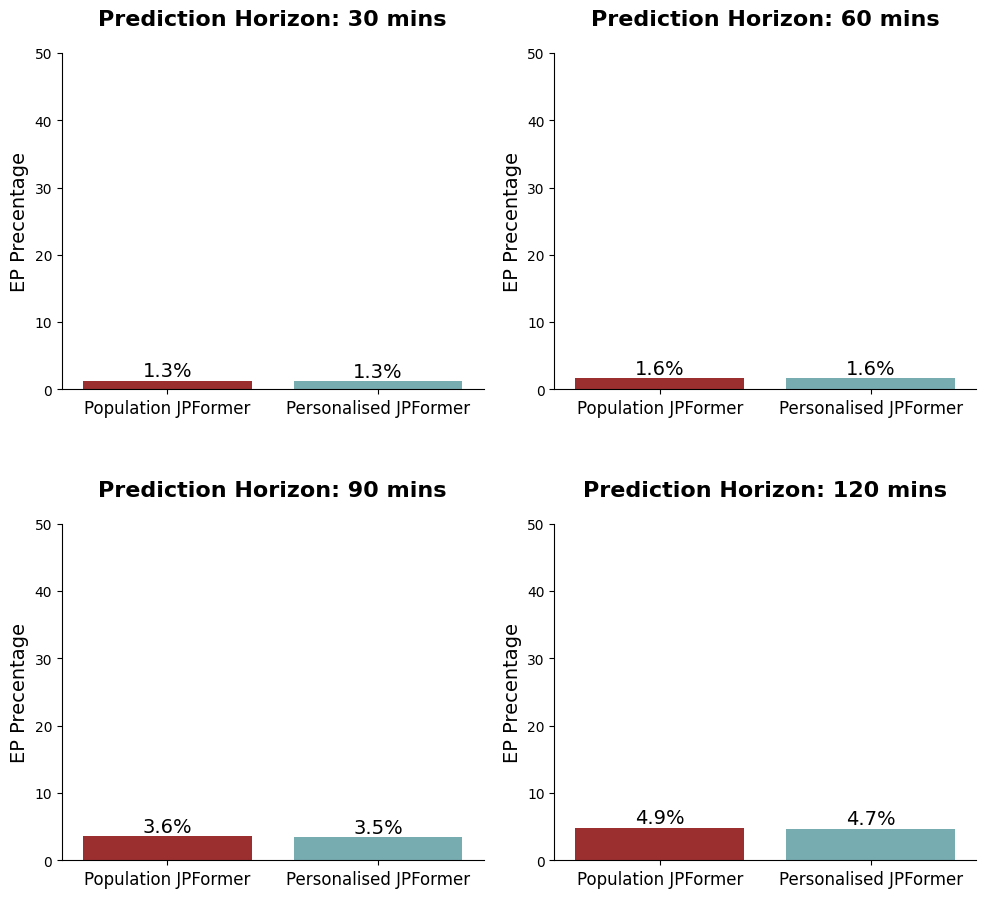


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,93.569161,5.142857,1.287982,20632.0,1134.0,284.0,22050.0,72.647887
0,Personalised JPFormer,93.587302,5.129252,1.283447,20636.0,1131.0,283.0,22050.0,72.918728



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,92.439909,5.941043,1.619048,20383.0,1310.0,357.0,22050.0,57.095238
0,Personalised JPFormer,92.603175,5.777778,1.619048,20419.0,1274.0,357.0,22050.0,57.196078



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,90.589569,5.827664,3.582766,19975.0,1285.0,790.0,22050.0,25.284810
0,Personalised JPFormer,90.684807,5.827664,3.487528,19996.0,1285.0,769.0,22050.0,26.002601



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,90.145125,5.002268,4.852608,19877.0,1103.0,1070.0,22050.0,18.576636
0,Personalised JPFormer,90.312925,4.970522,4.716553,19914.0,1096.0,1040.0,22050.0,19.148077


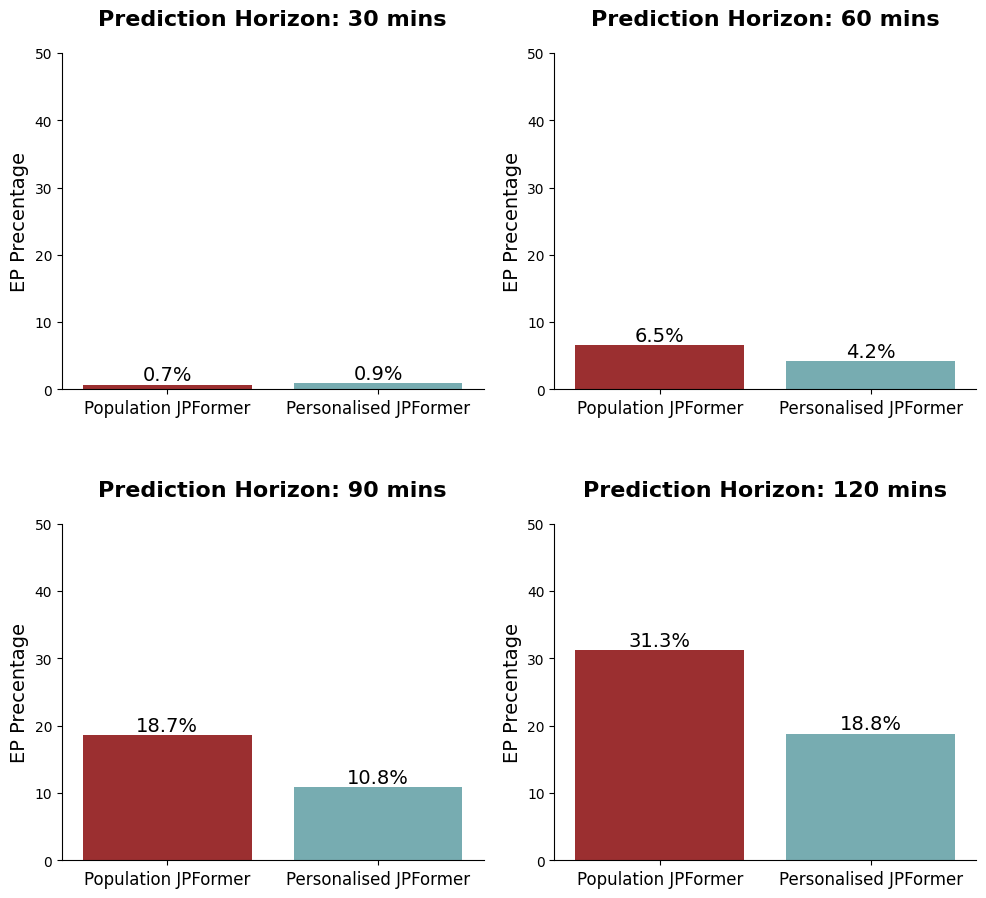


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,96.209386,3.068592,0.722022,533.0,17.0,4.0,554.0,133.25
0,Personalised JPFormer,96.028881,3.068592,0.902527,532.0,17.0,5.0,554.0,106.40



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,92.028986,1.449275,6.521739,508.0,8.0,36.0,552.0,14.111111
0,Personalised JPFormer,92.210145,3.623188,4.166667,509.0,20.0,23.0,552.0,22.130435



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,78.731343,2.611940,18.656716,422.0,14.0,100.0,536.0,4.220000
0,Personalised JPFormer,85.820896,3.358209,10.820896,460.0,18.0,58.0,536.0,7.931034



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,65.913371,2.824859,31.261770,350.0,15.0,166.0,531.0,2.108434
0,Personalised JPFormer,77.777778,3.389831,18.832392,413.0,18.0,100.0,531.0,4.130000


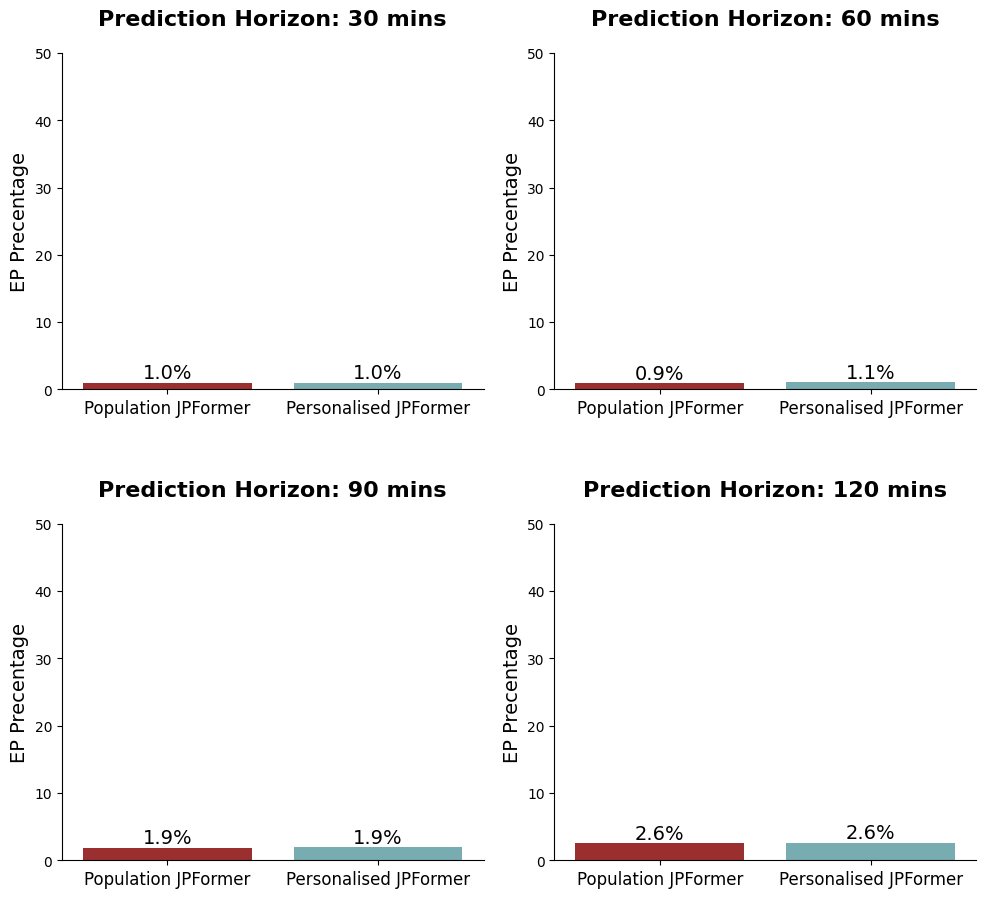


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,93.541284,5.445872,1.012844,12745.0,742.0,138.0,13625.0,92.355072
0,Personalised JPFormer,93.673394,5.313761,1.012844,12763.0,724.0,138.0,13625.0,92.485507



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,93.234517,5.848254,0.917229,12706.0,797.0,125.0,13628.0,101.648000
0,Personalised JPFormer,93.344585,5.598767,1.056648,12721.0,763.0,144.0,13628.0,88.340278



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,92.567666,5.559620,1.872714,12654.0,760.0,256.0,13670.0,49.429688
0,Personalised JPFormer,92.633504,5.457206,1.909290,12663.0,746.0,261.0,13670.0,48.517241



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,91.823349,5.611427,2.565224,12600.0,770.0,352.0,13722.0,35.795455
0,Personalised JPFormer,91.954526,5.414663,2.630812,12618.0,743.0,361.0,13722.0,34.952909


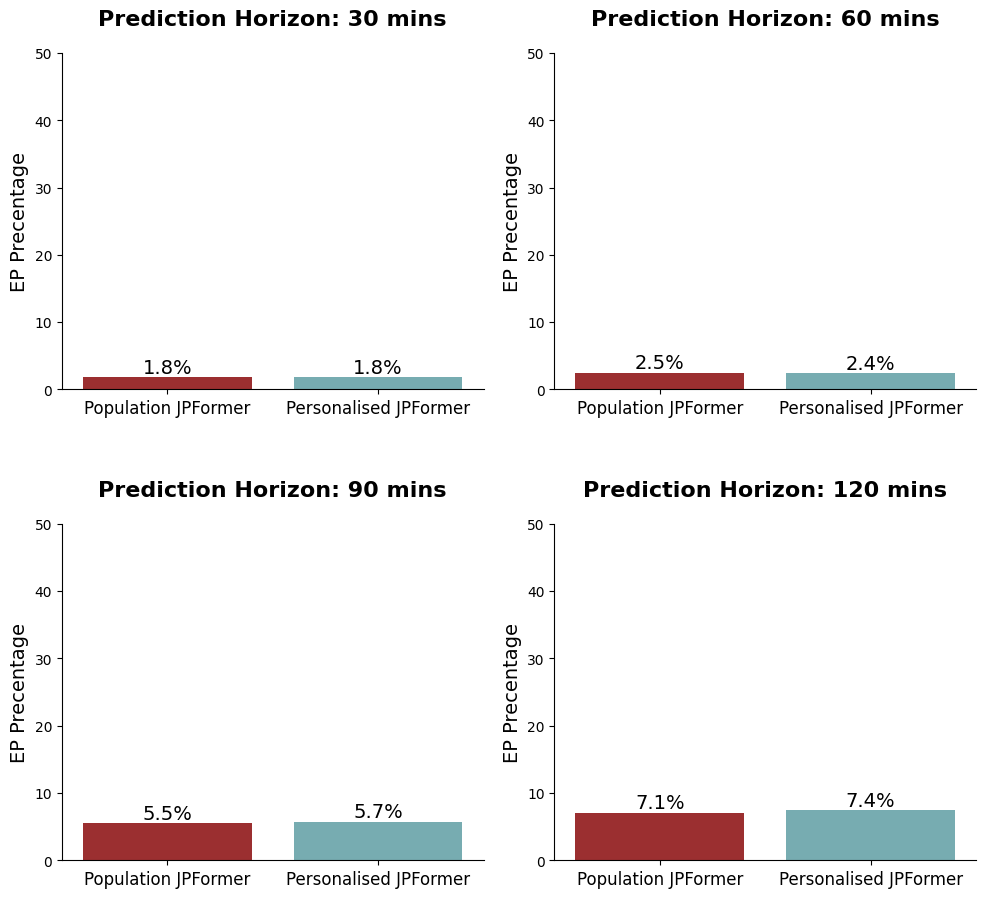


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,93.431584,4.764325,1.804091,7354.0,375.0,142.0,7871.0,51.788732
0,Personalised JPFormer,93.266421,4.954898,1.778681,7341.0,390.0,140.0,7871.0,52.435714



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,91.092757,6.416773,2.490470,7169.0,505.0,196.0,7870.0,36.576531
0,Personalised JPFormer,91.346887,6.238882,2.414231,7189.0,491.0,190.0,7870.0,37.836842



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,87.952575,6.514533,5.532891,6899.0,511.0,434.0,7844.0,15.896313
0,Personalised JPFormer,87.621112,6.642019,5.736869,6873.0,521.0,450.0,7844.0,15.273333



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,Population JPFormer,88.841862,4.078492,7.079646,6927.0,318.0,552.0,7797.0,12.548913
0,Personalised JPFormer,88.277543,4.296524,7.425933,6883.0,335.0,579.0,7797.0,11.887737


In [19]:
return_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='overall')

return_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hypo')

return_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='eu')

return_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hyper')


In [20]:
def return_ap_timepoint_summary(no_fe_model, fe_model, glycemic_region):

    timepoints = [30, 60, 90, 120]

    # Create a dictionary to store DataFrames for each timepoint
    timepoint_dfs = {}

    # For each timepoint, create a DataFrame with rows from both models
    for t in timepoints:
        # Create an empty DataFrame
        timepoint_df = pd.DataFrame(columns=['Model', 'AP_percent', 'BP_percent', 'EP_percent', 
                                            'AP_count', 'BP_count', 'EP_count', 'Total_count'])
        
        # Process data for each model using the create_timepoint_ega_dataframe function
        model1_timepoint_table = create_timepoint_ega_dataframe(no_fe_model, glycemic_region)
        model2_timepoint_table = create_timepoint_ega_dataframe(fe_model, glycemic_region)

        # Get data from both models for this timepoint
        no_fe_data = model1_timepoint_table.loc[t].copy()
        fe_data = model2_timepoint_table.loc[t].copy()
        
        # Create rows with model identifiers
        no_fe_row = pd.DataFrame({
            'Model': ['base model'],
            'AP_percent': [no_fe_data['AP_percent']],
            'BP_percent': [no_fe_data['BP_percent']],
            'EP_percent': [no_fe_data['EP_percent']],
            'AP_count': [no_fe_data['AP_count']],
            'BP_count': [no_fe_data['BP_count']],
            'EP_count': [no_fe_data['EP_count']],
            'Total_count': [no_fe_data['Total_count']],
            'AP:EP': [no_fe_data['AP:EP']]
        })
        
        fe_row = pd.DataFrame({
            'Model': ['fine-tuned models'],
            'AP_percent': [fe_data['AP_percent']],
            'BP_percent': [fe_data['BP_percent']],
            'EP_percent': [fe_data['EP_percent']],
            'AP_count': [fe_data['AP_count']],
            'BP_count': [fe_data['BP_count']],
            'EP_count': [fe_data['EP_count']],
            'Total_count': [fe_data['Total_count']],
            'AP:EP': [fe_data['AP:EP']]
        })
        
        # Combine the two rows
        timepoint_df = pd.concat([no_fe_row, fe_row])
        
        # Store in dictionary
        timepoint_dfs[t] = timepoint_df

    # Create a figure to visualize AP percentages across timepoints
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
    palette = [model1_color, model2_color]

    # Plot bar charts for each timepoint
    for i, t in enumerate(timepoints):
        sns.barplot(
            x='Model', 
            y='AP_percent',  # Changed from EP_percent to AP_percent
            data=timepoint_dfs[t], 
            ax=axs[i], 
            palette=palette,
            hue='Model',
            legend=False
        )
        axs[i].set_title(f'Prediction Horizon: {t} mins', fontsize=16, fontweight='bold', pad=20)
        axs[i].set_ylabel('AP Percentage', fontsize=14)  # Updated label
        axs[i].set_xlabel('')
        axs[i].set_ylim(50, 100)  # Adjusted y-axis limits for AP percentages
        
        # Add data labels
        for p in axs[i].patches:
            axs[i].annotate(f"{p.get_height():.1f}%", 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=14)
        
        # Set x-tick labels font size to 8
        axs[i].tick_params(axis='x', labelsize=14)
        
        # Remove top and right borders
        sns.despine(ax=axs[i])
    glycemic_region = glycemic_region.capitalize()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, hspace=0.4)  # Increased space between title and plots
    plt.show()

    # Display the comparison tables
    for t in timepoints:
        print(f"\nPrediction Horizon: {t} minutes")
        display(timepoint_dfs[t])


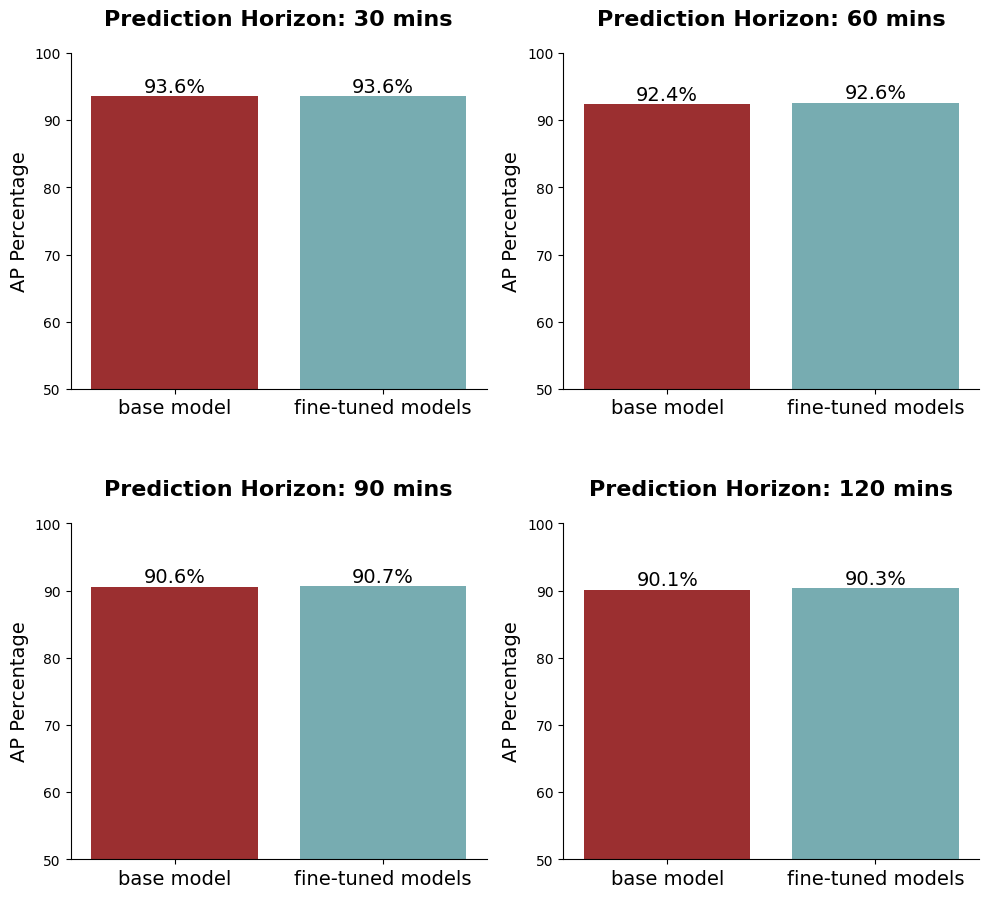


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,93.569161,5.142857,1.287982,20632.0,1134.0,284.0,22050.0,72.647887
0,fine-tuned models,93.587302,5.129252,1.283447,20636.0,1131.0,283.0,22050.0,72.918728



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,92.439909,5.941043,1.619048,20383.0,1310.0,357.0,22050.0,57.095238
0,fine-tuned models,92.603175,5.777778,1.619048,20419.0,1274.0,357.0,22050.0,57.196078



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,90.589569,5.827664,3.582766,19975.0,1285.0,790.0,22050.0,25.284810
0,fine-tuned models,90.684807,5.827664,3.487528,19996.0,1285.0,769.0,22050.0,26.002601



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,90.145125,5.002268,4.852608,19877.0,1103.0,1070.0,22050.0,18.576636
0,fine-tuned models,90.312925,4.970522,4.716553,19914.0,1096.0,1040.0,22050.0,19.148077


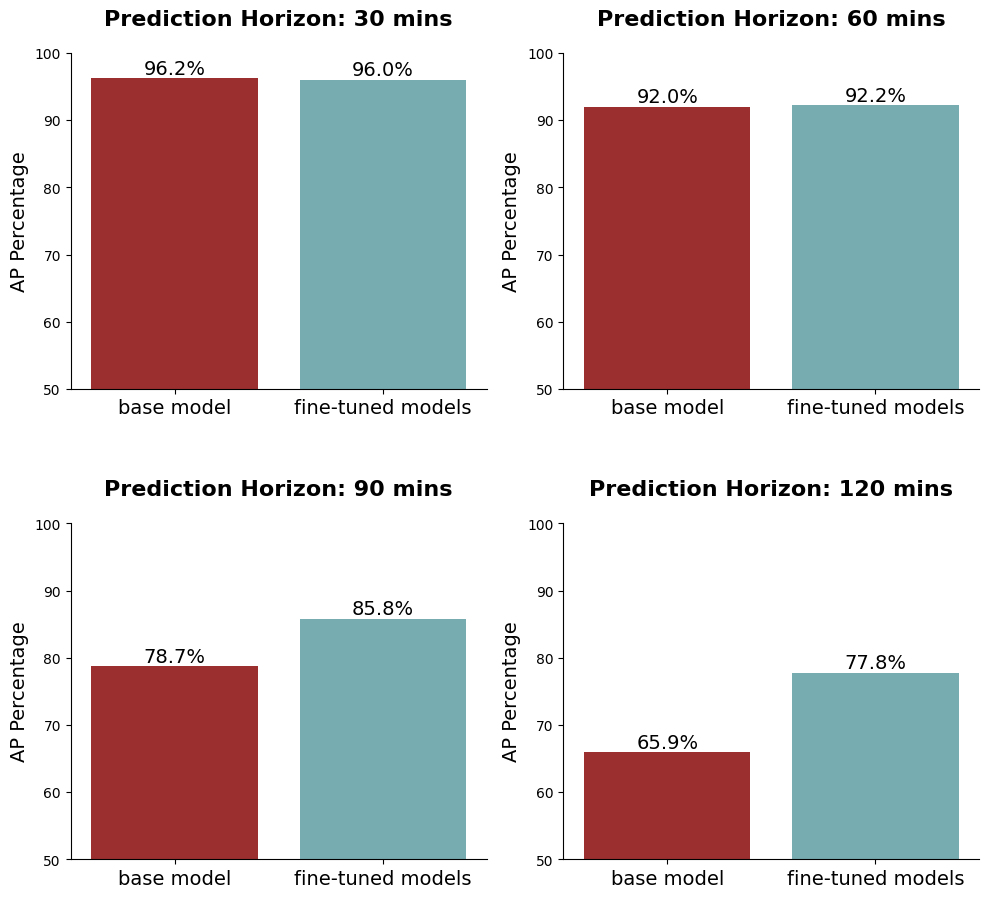


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,96.209386,3.068592,0.722022,533.0,17.0,4.0,554.0,133.25
0,fine-tuned models,96.028881,3.068592,0.902527,532.0,17.0,5.0,554.0,106.40



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,92.028986,1.449275,6.521739,508.0,8.0,36.0,552.0,14.111111
0,fine-tuned models,92.210145,3.623188,4.166667,509.0,20.0,23.0,552.0,22.130435



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,78.731343,2.611940,18.656716,422.0,14.0,100.0,536.0,4.220000
0,fine-tuned models,85.820896,3.358209,10.820896,460.0,18.0,58.0,536.0,7.931034



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,65.913371,2.824859,31.261770,350.0,15.0,166.0,531.0,2.108434
0,fine-tuned models,77.777778,3.389831,18.832392,413.0,18.0,100.0,531.0,4.130000


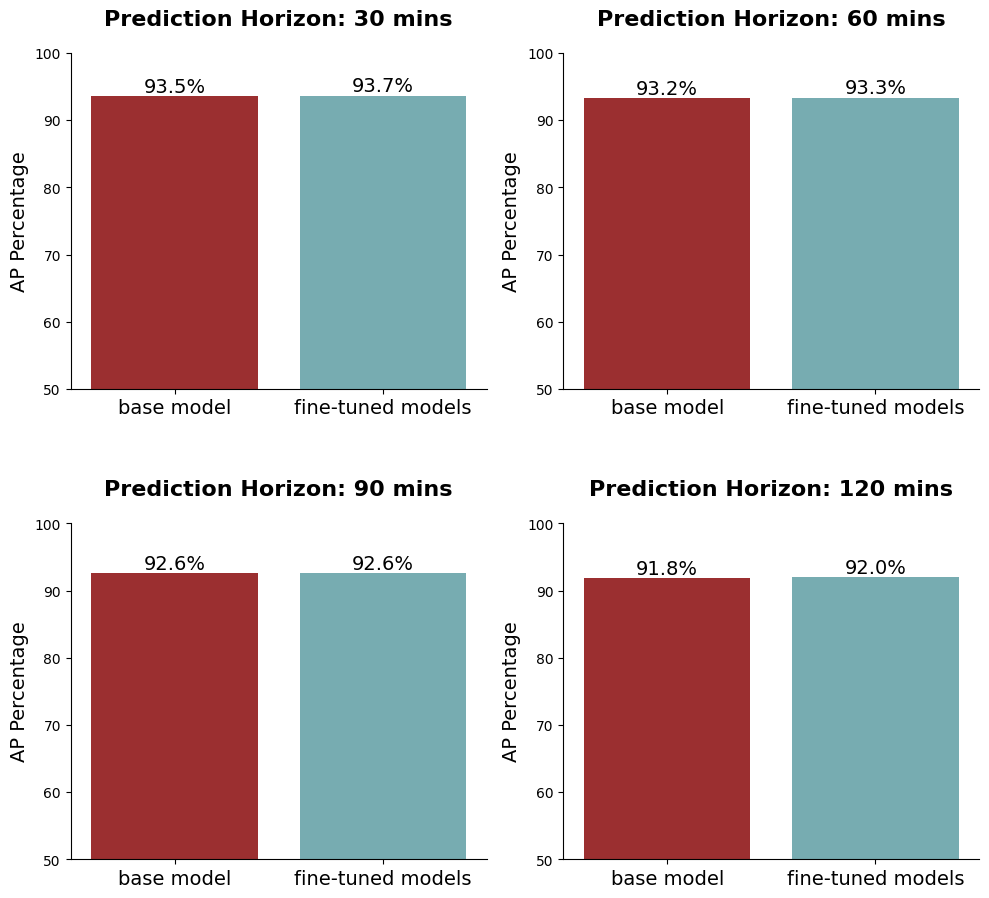


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,93.541284,5.445872,1.012844,12745.0,742.0,138.0,13625.0,92.355072
0,fine-tuned models,93.673394,5.313761,1.012844,12763.0,724.0,138.0,13625.0,92.485507



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,93.234517,5.848254,0.917229,12706.0,797.0,125.0,13628.0,101.648000
0,fine-tuned models,93.344585,5.598767,1.056648,12721.0,763.0,144.0,13628.0,88.340278



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,92.567666,5.559620,1.872714,12654.0,760.0,256.0,13670.0,49.429688
0,fine-tuned models,92.633504,5.457206,1.909290,12663.0,746.0,261.0,13670.0,48.517241



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,91.823349,5.611427,2.565224,12600.0,770.0,352.0,13722.0,35.795455
0,fine-tuned models,91.954526,5.414663,2.630812,12618.0,743.0,361.0,13722.0,34.952909


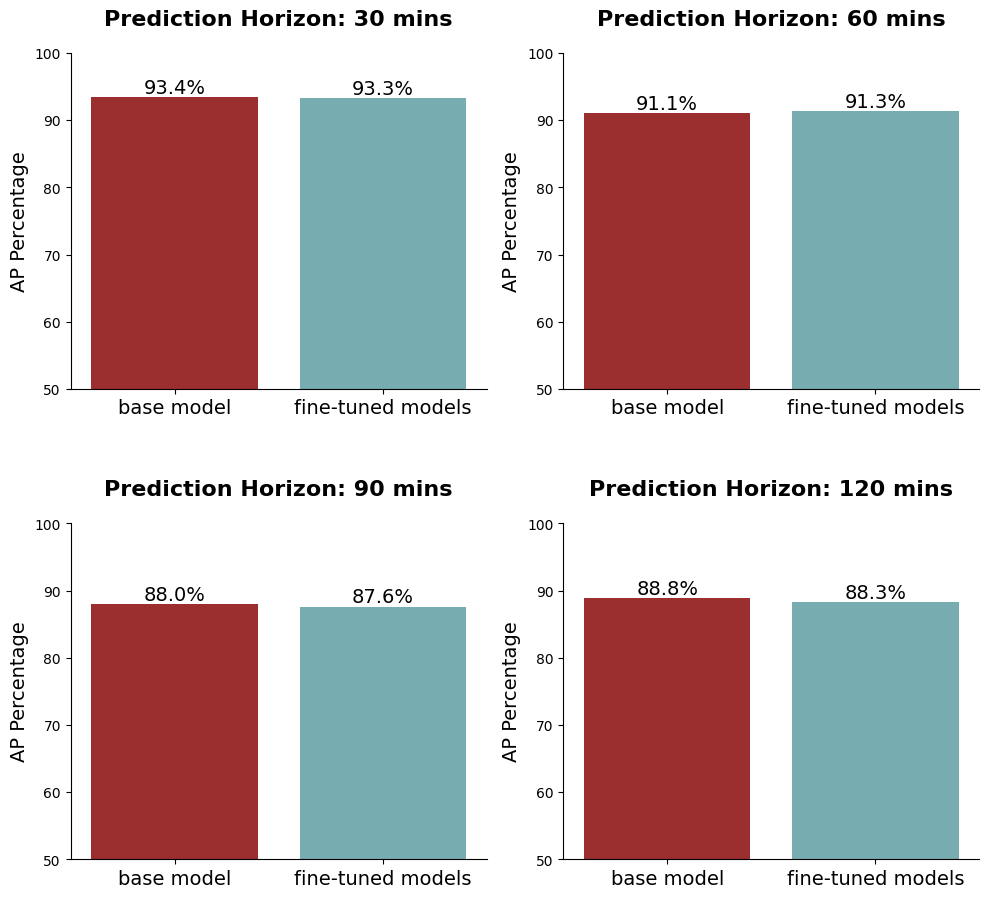


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,93.431584,4.764325,1.804091,7354.0,375.0,142.0,7871.0,51.788732
0,fine-tuned models,93.266421,4.954898,1.778681,7341.0,390.0,140.0,7871.0,52.435714



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,91.092757,6.416773,2.490470,7169.0,505.0,196.0,7870.0,36.576531
0,fine-tuned models,91.346887,6.238882,2.414231,7189.0,491.0,190.0,7870.0,37.836842



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,87.952575,6.514533,5.532891,6899.0,511.0,434.0,7844.0,15.896313
0,fine-tuned models,87.621112,6.642019,5.736869,6873.0,521.0,450.0,7844.0,15.273333



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,base model,88.841862,4.078492,7.079646,6927.0,318.0,552.0,7797.0,12.548913
0,fine-tuned models,88.277543,4.296524,7.425933,6883.0,335.0,579.0,7797.0,11.887737


In [21]:
return_ap_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='overall')
return_ap_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hypo')
return_ap_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='eu')
return_ap_timepoint_summary(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hyper')

### **4.1. Statistical Analysis**

In [22]:
from IPython.display import display

# Function to compute Cramér's V
def cramers_v(chi2, n, contingency_table):
    """Computes Cramér's V effect size from the chi-square test."""
    min_dim = min(np.shape(contingency_table)) - 1  # Min(row-1, col-1)
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan

# Function to interpret Cramér's V effect size
def interpret_cramers_v(v_value):
    """Provides qualitative interpretation of Cramér's V."""
    if pd.isna(v_value):  
        return "Not Enough Data"
    elif v_value < 0.1:
        return "Negligible Effect"
    elif v_value < 0.3:
        return "Small Effect"
    elif v_value < 0.5:
        return "Medium Effect"
    else:
        return "Large Effect"

# Chi-square analysis function
def return_chi_square_analysis(no_fe_model, fe_model, glycemic_region, model1_name="Model w/o FE", model2_name="Model w/ FE"):
    glycemic_region = glycemic_region.lower()
    data_dist_chi_square_results = []

    print(f"\n Running Chi-Square test for {model1_name} vs {model2_name} ({glycemic_region.capitalize()}glycaemic Range Performance):\n")

    # Copy data to avoid modifying the originals
    df1 = no_fe_model.copy()
    df2 = fe_model.copy()

    # Filter based on glycemic region
    if glycemic_region == 'hypo':
        df1 = df1[df1['glycemic_region'] == 'hypo']
        df2 = df2[df2['glycemic_region'] == 'hypo']
    elif glycemic_region == 'hyper':
        df1 = df1[df1['glycemic_region'] == 'hyper']
        df2 = df2[df2['glycemic_region'] == 'hyper']
    elif glycemic_region == 'eu':
        df1 = df1[df1['glycemic_region'] == 'eu']
        df2 = df2[df2['glycemic_region'] == 'eu']
    else:
        pass  # Use all data

    # Calculate class counts
    df1_counts = df1['CG_EGA_Class'].value_counts()
    df2_counts = df2['CG_EGA_Class'].value_counts()
    
    # Totals
    df1_total = df1_counts.sum()
    df2_total = df2_counts.sum()

    # Contingency table
    contingency_table = [
        [df1_counts.get('AP', 0), df1_counts.get('BE', 0), df1_counts.get('EP', 0)],
        [df2_counts.get('AP', 0), df2_counts.get('BE', 0), df2_counts.get('EP', 0)],
    ]

    # Percentages
    df1_percent = {
        'AP': (df1_counts.get('AP', 0) / df1_total) * 100 if df1_total else 0,
        'BE': (df1_counts.get('BE', 0) / df1_total) * 100 if df1_total else 0,
        'EP': (df1_counts.get('EP', 0) / df1_total) * 100 if df1_total else 0
    }
    df2_percent = {
        'AP': (df2_counts.get('AP', 0) / df2_total) * 100 if df2_total else 0,
        'BE': (df2_counts.get('BE', 0) / df2_total) * 100 if df2_total else 0,
        'EP': (df2_counts.get('EP', 0) / df2_total) * 100 if df2_total else 0
    }

    # Chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Cramér's V
    n = np.sum(contingency_table)
    cramers_v_value = cramers_v(chi2, n, contingency_table)
    cramers_v_interpretation = interpret_cramers_v(cramers_v_value)

    # Store result
    data_dist_chi_square_results.append({
        "Model 1": f"{model1_name} ({glycemic_region.capitalize()})",
        "Model 2": f"{model2_name} ({glycemic_region.capitalize()})",
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Significant": p_value < 0.05,
        "Cramér's V": cramers_v_value,
        "Cramér's V Interpretation": cramers_v_interpretation
    })

    # Display results
    print(f"\n  χ² = {chi2:.3f}, p = {p_value:.5f}, "
          f"{'Significant' if p_value < 0.05 else 'Not Significant'} | "
          f"Cramér's V = {cramers_v_value:.3f} ({cramers_v_interpretation})\n")

    # Contingency table (readable)
    table_data = pd.DataFrame({
        "AP (Accurate Predictions)": [f"{df1_counts.get('AP', 0)} ({df1_percent['AP']:.2f}%)", 
                                     f"{df2_counts.get('AP', 0)} ({df2_percent['AP']:.2f}%)"],
        "BE (Benign Errors)": [f"{df1_counts.get('BE', 0)} ({df1_percent['BE']:.2f}%)", 
                              f"{df2_counts.get('BE', 0)} ({df2_percent['BE']:.2f}%)"],
        "EP (Erroneous Predictions)": [f"{df1_counts.get('EP', 0)} ({df1_percent['EP']:.2f}%)", 
                                      f"{df2_counts.get('EP', 0)} ({df2_percent['EP']:.2f}%)"]
    }, index=[model1_name, model2_name])

    print("\nContingency Table:")
    display(table_data)

    return pd.DataFrame(data_dist_chi_square_results)

In [23]:
overall_chi_square_results = return_chi_square_analysis(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='overall', model1_name="Base model", model2_name="Fine-tuned models")
hypo_chi_square_results = return_chi_square_analysis(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hypo', model1_name="Base model", model2_name="Fine-tuned models")
eu_chi_square_results = return_chi_square_analysis(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='eu', model1_name="Base model", model2_name="Fine-tuned models")
hyper_chi_square_results = return_chi_square_analysis(aggregate_base_df, aggregate_fine_tuned_df, glycemic_region='hyper', model1_name="Base model", model2_name="Fine-tuned models")


 Running Chi-Square test for Base model vs Fine-tuned models (Overallglycaemic Range Performance):


  χ² = 1.767, p = 0.41328, Not Significant | Cramér's V = 0.001 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Base model,490742 (92.73%),26594 (5.03%),11864 (2.24%)
Fine-tuned models,491069 (92.79%),26433 (4.99%),11698 (2.21%)



 Running Chi-Square test for Base model vs Fine-tuned models (Hypoglycaemic Range Performance):


  χ² = 179.319, p = 0.00000, Significant | Cramér's V = 0.083 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Base model,11415 (87.00%),291 (2.22%),1415 (10.78%)
Fine-tuned models,11871 (90.47%),414 (3.16%),836 (6.37%)



 Running Chi-Square test for Base model vs Fine-tuned models (Euglycaemic Range Performance):


  χ² = 9.674, p = 0.00793, Significant | Cramér's V = 0.004 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Base model,306902 (93.67%),16754 (5.11%),3982 (1.22%)
Fine-tuned models,306928 (93.68%),16481 (5.03%),4229 (1.29%)



 Running Chi-Square test for Base model vs Fine-tuned models (Hyperglycaemic Range Performance):


  χ² = 2.180, p = 0.33629, Not Significant | Cramér's V = 0.002 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Base model,172425 (91.50%),9549 (5.07%),6467 (3.43%)
Fine-tuned models,172270 (91.42%),9538 (5.06%),6633 (3.52%)


In [24]:
# Extract rows for specific prediction horizons (timepoints)
population_30_df = aggregate_base_df[aggregate_base_df['timepoint'] == 5]
population_60_df = aggregate_base_df[aggregate_base_df['timepoint'] == 11]
population_90_df = aggregate_base_df[aggregate_base_df['timepoint'] == 17]
population_120_df = aggregate_base_df[aggregate_base_df['timepoint'] == 23]

# Do the same for the fine-tuned model
personalized_30_df = aggregate_fine_tuned_df[aggregate_fine_tuned_df['timepoint'] == 5]
personalized_60_df = aggregate_fine_tuned_df[aggregate_fine_tuned_df['timepoint'] == 11]
personalized_90_df = aggregate_fine_tuned_df[aggregate_fine_tuned_df['timepoint'] == 17]
personalized_120_df = aggregate_fine_tuned_df[aggregate_fine_tuned_df['timepoint'] == 23]

In [25]:
return_chi_square_analysis(population_30_df, personalized_30_df, glycemic_region='hypo', model1_name="Population JPFormer 30", model2_name="Personalised JPFormer 30")
return_chi_square_analysis(population_60_df, personalized_60_df, glycemic_region='hypo', model1_name="Population JPFormer 60", model2_name="Personalised JPFormer 60")
return_chi_square_analysis(population_90_df, personalized_90_df, glycemic_region='hypo', model1_name="Population JPFormer 90", model2_name="Personalised JPFormer 90")
return_chi_square_analysis(population_120_df, personalized_120_df, glycemic_region='hypo', model1_name="Population JPFormer 120", model2_name="Personalised JPFormer 120")


 Running Chi-Square test for Population JPFormer 30 vs Personalised JPFormer 30 (Hypoglycaemic Range Performance):


  χ² = 0.112, p = 0.94552, Not Significant | Cramér's V = 0.010 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer 30,533 (96.21%),17 (3.07%),4 (0.72%)
Personalised JPFormer 30,532 (96.03%),17 (3.07%),5 (0.90%)



 Running Chi-Square test for Population JPFormer 60 vs Personalised JPFormer 60 (Hypoglycaemic Range Performance):


  χ² = 8.008, p = 0.01824, Significant | Cramér's V = 0.085 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer 60,508 (92.03%),8 (1.45%),36 (6.52%)
Personalised JPFormer 60,509 (92.21%),20 (3.62%),23 (4.17%)



 Running Chi-Square test for Population JPFormer 90 vs Personalised JPFormer 90 (Hypoglycaemic Range Performance):


  χ² = 13.302, p = 0.00129, Significant | Cramér's V = 0.111 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer 90,422 (78.73%),14 (2.61%),100 (18.66%)
Personalised JPFormer 90,460 (85.82%),18 (3.36%),58 (10.82%)



 Running Chi-Square test for Population JPFormer 120 vs Personalised JPFormer 120 (Hypoglycaemic Range Performance):


  χ² = 21.851, p = 0.00002, Significant | Cramér's V = 0.143 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer 120,350 (65.91%),15 (2.82%),166 (31.26%)
Personalised JPFormer 120,413 (77.78%),18 (3.39%),100 (18.83%)


,Model 1,Model 2,Chi2 Statistic,p-value,Significant,Cramér's V,Cramér's V Interpretation
0,Population JPFormer 120 (Hypo),Personalised JPFormer 120 (Hypo),21.850502,0.000018,True,0.143439,Small Effect


## **Individual Level Analysis**

### RMSE and MAPE

In [26]:
ptid_base_rmse_dict = {}

ptid_fine_tuned_rmse_dict = {}

for ptid, df in base_overall_dict.items():
    base_rmse = calculate_rmse(df['true_glucose'], df['predicted_glucose'])
    ptid_base_rmse_dict[ptid] = base_rmse

for ptid, df in fine_tuned_dict.items():
    fine_tuned_rmse = calculate_rmse(df['true_glucose'], df['predicted_glucose'])
    ptid_fine_tuned_rmse_dict[ptid] = fine_tuned_rmse



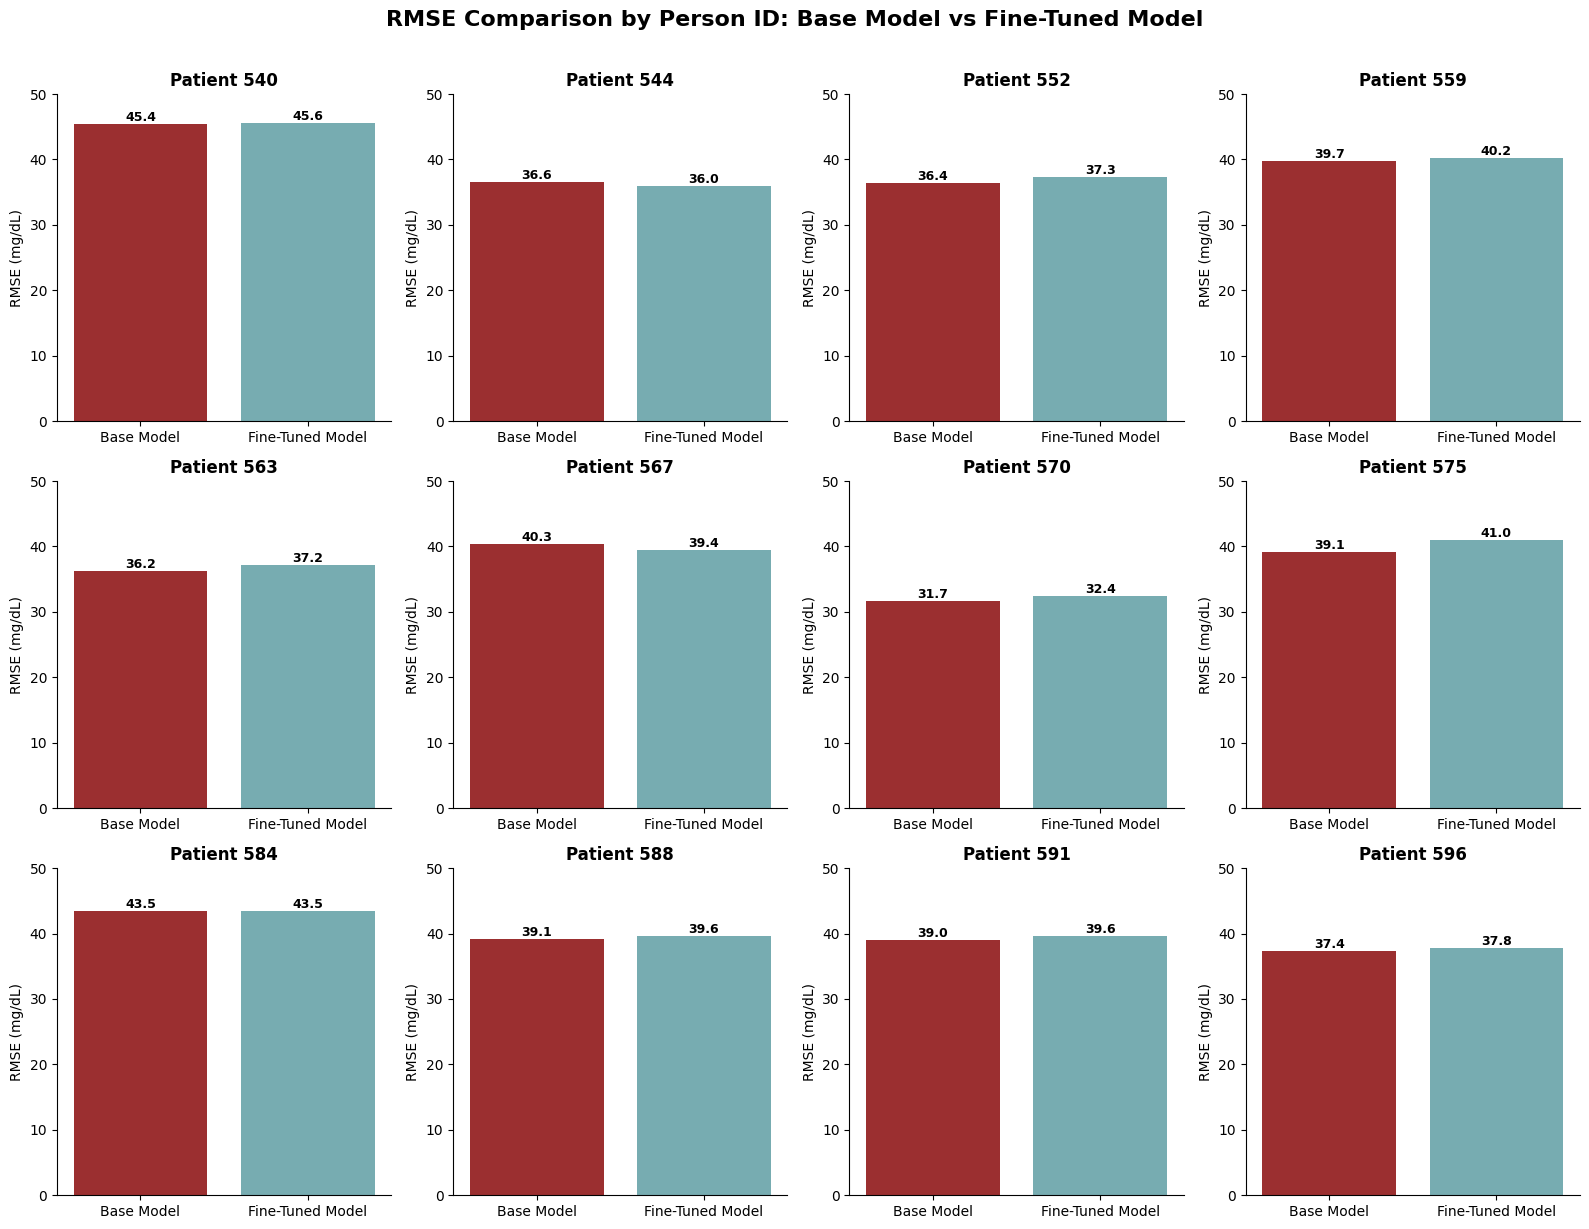

In [27]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axs = axs.flatten()  # Convert to 1D array for easier indexing

# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # Base model
model2_color = (110 / 255, 180 / 255, 186 / 255)  # Fine-tuned model
palette = [model1_color, model2_color]

# Loop through each patient ID and create a bar chart in each subplot
for i, ptid in enumerate(ptid_list):
    # Create a DataFrame for this patient's RMSE values
    df = pd.DataFrame({
        'Model': ['Base Model', 'Fine-Tuned Model'],
        'RMSE': [ptid_base_rmse_dict[ptid], ptid_fine_tuned_rmse_dict[ptid]]
    })
    
    # Create bar chart in the corresponding subplot
    sns.barplot(x='Model', y='RMSE', data=df, ax=axs[i], hue='Model', palette=palette, legend=False)
    
    # Set title and styling for the subplot
    axs[i].set_title(f'Patient {ptid}', fontsize=12, fontweight='bold')
    axs[i].set_ylabel('RMSE (mg/dL)', fontsize=10)
    axs[i].set_xlabel('')
    
    # Add data labels
    for p in axs[i].patches:
        axs[i].annotate(f"{p.get_height():.1f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Remove top and right borders
    sns.despine(ax=axs[i])
    
    # Set y-axis limits for consistency across all plots
    axs[i].set_ylim(0, 50)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('RMSE Comparison by Person ID: Base Model vs Fine-Tuned Model', 
             fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()


In [28]:
ptid_base_mape_dict = {}
ptid_fine_tuned_mape_dict = {}

for ptid, df in base_overall_dict.items():
    base_mape = mape(df['true_glucose'], df['predicted_glucose'])
    ptid_base_mape_dict[ptid] = base_mape

for ptid, df in fine_tuned_dict.items():
    fine_tuned_mape = mape(df['true_glucose'], df['predicted_glucose'])
    ptid_fine_tuned_mape_dict[ptid] = fine_tuned_mape

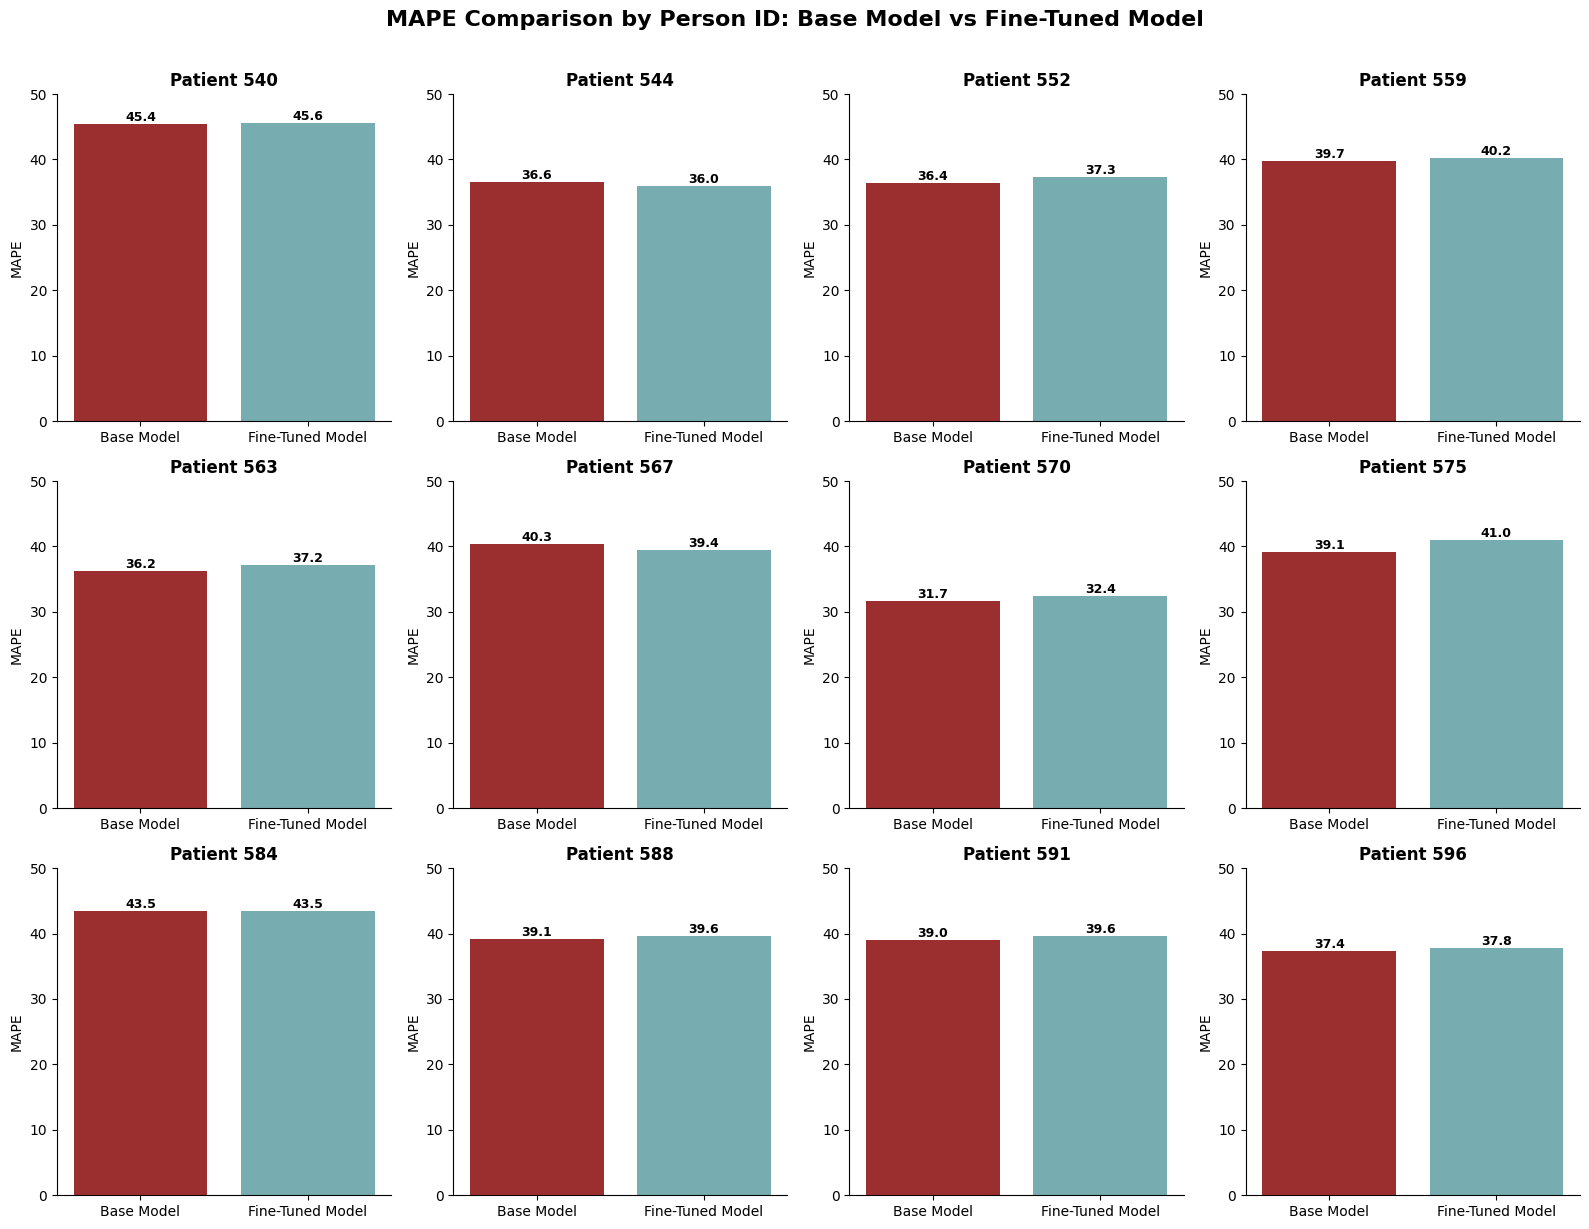

In [29]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axs = axs.flatten()  # Convert to 1D array for easier indexing

# Define custom colors for the models
model1_color = (173 / 255, 29 / 255, 30 / 255)  # Base model
model2_color = (110 / 255, 180 / 255, 186 / 255)  # Fine-tuned model
palette = [model1_color, model2_color]

# Loop through each patient ID and create a bar chart in each subplot
for i, ptid in enumerate(ptid_list):
    # Create a DataFrame for this patient's RMSE values
    df = pd.DataFrame({
        'Model': ['Base Model', 'Fine-Tuned Model'],
        'MAPE': [ptid_base_rmse_dict[ptid], ptid_fine_tuned_rmse_dict[ptid]]
    })
    
    # Create bar chart in the corresponding subplot
    sns.barplot(x='Model', y='MAPE', data=df, ax=axs[i], hue='Model', palette=palette, legend=False)
    
    # Set title and styling for the subplot
    axs[i].set_title(f'Patient {ptid}', fontsize=12, fontweight='bold')
    axs[i].set_ylabel('MAPE', fontsize=10)
    axs[i].set_xlabel('')
    
    # Add data labels
    for p in axs[i].patches:
        axs[i].annotate(f"{p.get_height():.1f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Remove top and right borders
    sns.despine(ax=axs[i])
    
    # Set y-axis limits for consistency across all plots
    axs[i].set_ylim(0, 50)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('MAPE Comparison by Person ID: Base Model vs Fine-Tuned Model', 
             fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()


In [30]:
ttest_results_dict = {}
for ptid in ptid_list:
    ttest_results = return_ttests(base_overall_dict[ptid], fine_tuned_dict[ptid], glycemic_region="overall", model1_name="Base Model", model2_name="Fine-tuned Model")
    ttest_results_dict[ptid] = ttest_results




🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-0.613300,0.539679,False
1,MAPE,0.685232,0.493199,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,2.487569,0.012864,True
1,MAPE,1.538082,0.124032,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-3.027502,0.002467,True
1,MAPE,-4.285140,0.000018,True



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-1.345876,0.178347,False
1,MAPE,-2.242291,0.024946,True



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-3.707538,0.000209,True
1,MAPE,-2.760043,0.005780,True



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,2.715436,0.006621,True
1,MAPE,0.422321,0.672792,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-3.134976,0.001719,True
1,MAPE,-3.399454,0.000676,True



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-6.006706,1.901586e-09,True
1,MAPE,-11.317234,1.136626e-29,True



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-0.027030,0.978436,False
1,MAPE,0.658598,0.510156,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-1.607404,0.107968,False
1,MAPE,-0.108016,0.913983,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-2.964140,0.003036,True
1,MAPE,-1.014997,0.310109,False



🔍 Running t-test for Base Model vs Fine-tuned Model (Overallglycaemic Range Performance):



,Metric,t-statistic,p-value,Significance (p < 0.05)
0,RMSE,-1.827458,0.067634,False
1,MAPE,-2.664850,0.007703,True


In [31]:
# create single dataframe to store all t-test results
ttest_results_rmse_df = pd.DataFrame(columns=["Patient ID", "Base RMSE", "Fine-tuned RMSE", "t-statistic", "p-value", "Significant"])
for ptid, results in ttest_results_dict.items():
    # Extract RMSE row from the t-test results
    rmse_row = results.loc[0]
    new_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Base RMSE": [ptid_base_rmse_dict[ptid]],
        "Fine-tuned RMSE": [ptid_fine_tuned_rmse_dict[ptid]],
        "t-statistic": [rmse_row["t-statistic"]],
        "p-value": [rmse_row["p-value"]],
        "Significant": [rmse_row["p-value"] < 0.05]
    })
    ttest_results_rmse_df = pd.concat([ttest_results_rmse_df, new_row], ignore_index=True)

# Format RMSE values to 2 decimal places
ttest_results_rmse_df["Base RMSE"] = ttest_results_rmse_df["Base RMSE"].round(2)
ttest_results_rmse_df["Fine-tuned RMSE"] = ttest_results_rmse_df["Fine-tuned RMSE"].round(2)
ttest_results_rmse_df["t-statistic"] = ttest_results_rmse_df["t-statistic"].round(3)
ttest_results_rmse_df["p-value"] = ttest_results_rmse_df["p-value"].map(lambda x: f"{x:.4f}")

ttest_results_rmse_df

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/2116395429.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ttest_results_rmse_df = pd.concat([ttest_results_rmse_df, new_row], ignore_index=True)


,Patient ID,Base RMSE,Fine-tuned RMSE,t-statistic,p-value,Significant
0,540,45.43,45.61,-0.613,0.5397,False
1,544,36.62,36.00,2.488,0.0129,True
2,552,36.41,37.30,-3.028,0.0025,True
3,559,39.73,40.23,-1.346,0.1783,False
4,563,36.20,37.16,-3.708,0.0002,True
5,567,40.34,39.41,2.715,0.0066,True
6,570,31.67,32.45,-3.135,0.0017,True
7,575,39.14,41.02,-6.007,0.0000,True
8,584,43.45,43.46,-0.027,0.9784,False
9,588,39.13,39.55,-1.607,0.1080,False


In [32]:
ttest_results_mape_df = pd.DataFrame(columns=["Patient ID", "Base MAPE", "Fine-tuned MAPE", "t-statistic", "p-value", "Significant"])
for ptid, results in ttest_results_dict.items():
    # Extract MAPE row from the t-test results
    mape_row = results.loc[1]
    new_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Base MAPE": [ptid_base_mape_dict[ptid]],
        "Fine-tuned MAPE": [ptid_fine_tuned_mape_dict[ptid]],
        "t-statistic": [mape_row["t-statistic"]],
        "p-value": [mape_row["p-value"]],
        "Significant": [mape_row["p-value"] < 0.05]
    })
    ttest_results_mape_df = pd.concat([ttest_results_mape_df, new_row], ignore_index=True)

# Format MAPE values to 2 decimal places
ttest_results_mape_df["Base MAPE"] = ttest_results_mape_df["Base MAPE"].round(2)
ttest_results_mape_df["Fine-tuned MAPE"] = ttest_results_mape_df["Fine-tuned MAPE"].round(2)
ttest_results_mape_df["t-statistic"] = ttest_results_mape_df["t-statistic"].round(3)
ttest_results_mape_df["p-value"] = ttest_results_mape_df["p-value"].map(lambda x: f"{x:.4f}")

ttest_results_mape_df

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/219749180.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ttest_results_mape_df = pd.concat([ttest_results_mape_df, new_row], ignore_index=True)


,Patient ID,Base MAPE,Fine-tuned MAPE,t-statistic,p-value,Significant
0,540,30.23,31.72,0.685,0.4932,False
1,544,22.70,21.61,1.538,0.1240,False
2,552,26.01,27.99,-4.285,0.0000,True
3,559,20.84,21.74,-2.242,0.0249,True
4,563,20.16,21.83,-2.760,0.0058,True
5,567,26.07,24.36,0.422,0.6728,False
6,570,15.08,16.05,-3.399,0.0007,True
7,575,26.82,31.55,-11.317,0.0000,True
8,584,26.06,26.18,0.659,0.5102,False
9,588,22.22,22.86,-0.108,0.9140,False


/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/2297933051.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_value = float(ttest_results_mape_df.loc[ttest_results_mape_df['Patient ID'] == ptid, 'p-value'])


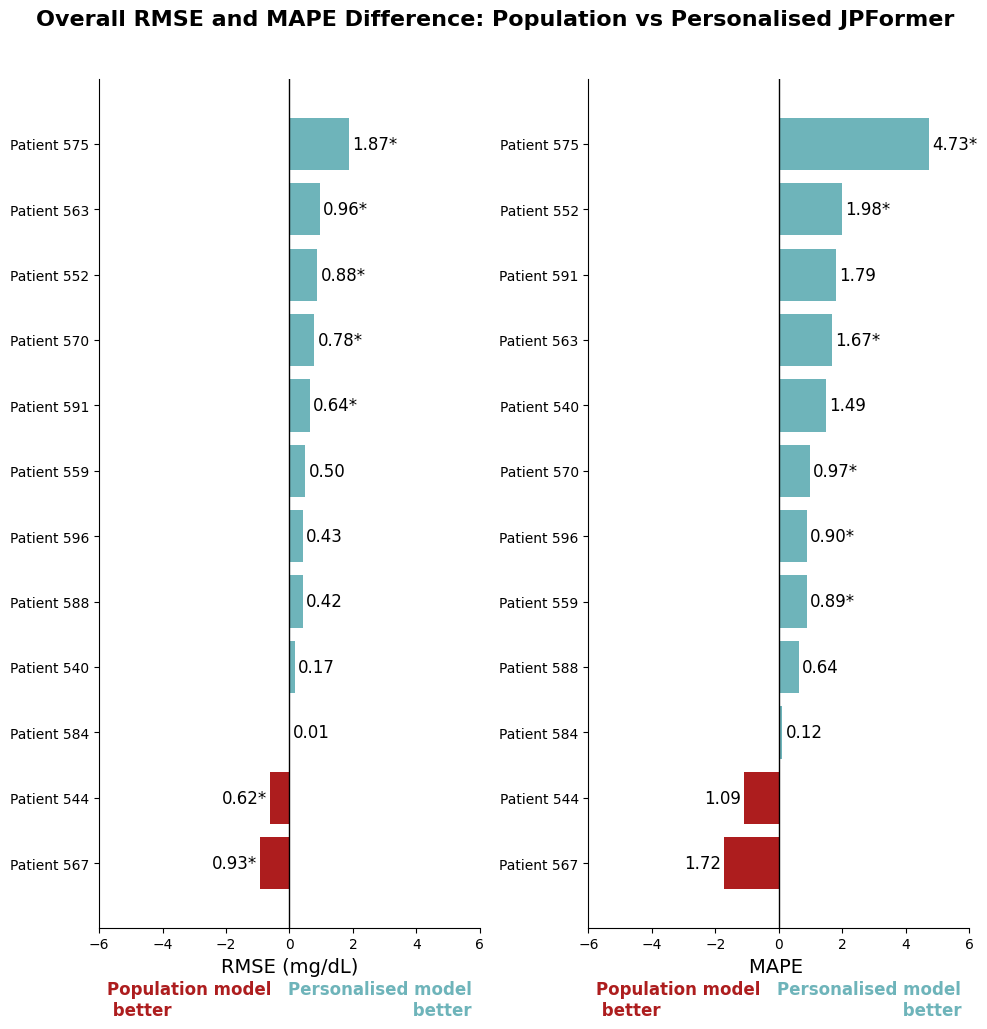

In [33]:
# Calculate the difference between base and fine-tuned metrics for each patient
ptid_rmse_diff = {}
ptid_mape_diff = {}

for ptid in ptid_list:
    # Calculate differences (base - fine_tuned)
    # Negative value means fine-tuned is higher (worse)
    ptid_rmse_diff[ptid] = ptid_base_rmse_dict[ptid] - ptid_fine_tuned_rmse_dict[ptid]
    ptid_mape_diff[ptid] = ptid_base_mape_dict[ptid] - ptid_fine_tuned_mape_dict[ptid]

# Create a figure with a 1x2 grid layout
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# RMSE Difference Chart
df_rmse_diff = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in ptid_rmse_diff.keys()],
    'RMSE Difference': [-diff for diff in ptid_rmse_diff.values()]  # Negate to make positive = base better
})
df_rmse_diff = df_rmse_diff.sort_values('RMSE Difference')
colors_rmse = ['#AEB4B8'] * len(df_rmse_diff)
for i, val in enumerate(df_rmse_diff['RMSE Difference']):
    colors_rmse[i] = model2_color if val > 0 else model1_color
bars_rmse = axs[0].barh(df_rmse_diff['Patient ID'], df_rmse_diff['RMSE Difference'], color=colors_rmse)
axs[0].axvline(0, color='black', linestyle='-', linewidth=1)

axs[0].set_xlabel('RMSE (mg/dL)', fontsize=14)
axs[0].set_xlim(-6, 6)
# Add data labels with asterisks for significant values
for i, bar in enumerate(bars_rmse):
    width = bar.get_width()
    label_x_pos = width + 0.1 if width > 0 else width - 0.1
    
    # Get the patient ID number
    ptid = int(df_rmse_diff.iloc[i]['Patient ID'].split(' ')[1])
    
    # Check if this patient has a significant p-value
    is_significant = ttest_results_rmse_df.loc[ttest_results_rmse_df['Patient ID'] == ptid, 'Significant'].values[0]
    
    # Add an asterisk if significant
    suffix = "*" if is_significant == True else ""
    
    axs[0].text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{abs(width):.2f}{suffix}',
                va='center', ha='left' if width > 0 else 'right', fontsize=12)
sns.despine(ax=axs[0])

# MAPE Difference Chart
df_mape_diff = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in ptid_mape_diff.keys()],
    'MAPE Difference': [-diff for diff in ptid_mape_diff.values()]  # Negate to make positive = base better
})
df_mape_diff = df_mape_diff.sort_values('MAPE Difference')
colors_mape = ['#AEB4B8'] * len(df_mape_diff)
for i, val in enumerate(df_mape_diff['MAPE Difference']):
    colors_mape[i] = model2_color if val > 0 else model1_color
bars_mape = axs[1].barh(df_mape_diff['Patient ID'], df_mape_diff['MAPE Difference'], color=colors_mape)
axs[1].axvline(0, color='black', linestyle='-', linewidth=1)

axs[1].set_xlabel('MAPE ', fontsize=14)
axs[1].set_xlim(-6, 6)
# Add data labels with asterisks for significant values
for i, bar in enumerate(bars_mape):
    width = bar.get_width()
    label_x_pos = width + 0.1 if width > 0 else width - 0.1
    
    # Get the patient ID number
    ptid = int(df_mape_diff.iloc[i]['Patient ID'].split(' ')[1])
    
    # Get p-value and check if it's significant
    p_value = float(ttest_results_mape_df.loc[ttest_results_mape_df['Patient ID'] == ptid, 'p-value'])
    is_significant = p_value < 0.05
    
    # Add an asterisk if significant
    suffix = "*" if is_significant else ""
    
    axs[1].text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{abs(width):.2f}{suffix}',
                va='center', ha='left' if width > 0 else 'right', fontsize=12)
sns.despine(ax=axs[1])

for ax in axs:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[0]+0.25, ylim[0] - 0.8, 'Population model\n better', 
            color=model1_color, fontsize=12, fontweight='bold', ha='left', va='top')
    ax.text(xlim[1]-0.25, ylim[0] - 0.8, 'Personalised model\n better', 
            color=model2_color, fontsize=12, fontweight='bold', ha='right', va='top')

plt.suptitle('Overall RMSE and MAPE Difference: Population vs Personalised JPFormer',
             fontsize=16, fontweight='bold', y=1.02)
# # Add a note explaining the asterisk
# fig.text(0.5, 0.01, '* indicates statistically significant difference (p < 0.05)',
#          ha='center', fontsize=12, fontstyle='italic')
# plt.subplots_adjust(top=0.95, bottom=0.05)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### CG-EGA

In [34]:
updated_base_df = {}
updated_fine_tuned_df = {}


for ptid in ptid_list:
    base_df = base_overall_dict[ptid]

    base_df['AP'] = np.where(base_df['CG_EGA_Class'] == 'AP', 1, 0)
    base_df['BE'] = np.where(base_df['CG_EGA_Class'] == 'BE', 1, 0)
    base_df['EP'] = np.where(base_df['CG_EGA_Class'] == 'EP', 1, 0)
    
    updated_base_df[ptid] = base_df


    fine_tuned_df = fine_tuned_dict[ptid]
    fine_tuned_df['AP'] = np.where(fine_tuned_df['CG_EGA_Class'] == 'AP', 1, 0)
    fine_tuned_df['BE'] = np.where(fine_tuned_df['CG_EGA_Class'] == 'BE', 1, 0)
    fine_tuned_df['EP'] = np.where(fine_tuned_df['CG_EGA_Class'] == 'EP', 1, 0)
    
    updated_fine_tuned_df[ptid] = fine_tuned_df


In [61]:
# run chi2 test for each patient id for overall model performacne

overall_chi2_results_dict = {}
hypo_chi2_results_dict  = {}
eu_chi2_results_dict  = {}
hyper_chi2_results_dict  = {}

for ptid in ptid_list:
    print(f"\nRunning Chi-Square test for Patient ID: {ptid}\n")


    overall_chi2_results_dict[ptid] = return_chi_square_analysis(updated_base_df[ptid], updated_fine_tuned_df[ptid], glycemic_region='overall', model1_name='Population JPFormer', model2_name='Personalised JPFormer')
    

    hypo_chi2_results_dict[ptid] = return_chi_square_analysis(updated_base_df[ptid], updated_fine_tuned_df[ptid], glycemic_region='hypo', model1_name='Population JPFormer', model2_name='Personalised JPFormer')


    eu_chi2_results_dict[ptid] = return_chi_square_analysis(updated_base_df[ptid], updated_fine_tuned_df[ptid], glycemic_region='eu', model1_name='Population JPFormer', model2_name='Personalised JPFormer')


    hyper_chi2_results_dict[ptid] = return_chi_square_analysis(updated_base_df[ptid], updated_fine_tuned_df[ptid], glycemic_region='hyper', model1_name='Population JPFormer', model2_name='Personalised JPFormer')

    print("\n"*5)


Running Chi-Square test for Patient ID: 540


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 1.585, p = 0.45260, Not Significant | Cramér's V = 0.004 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,44019 (90.22%),3274 (6.71%),1499 (3.07%)
Personalised JPFormer,44134 (90.45%),3187 (6.53%),1471 (3.01%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 1.350, p = 0.50910, Not Significant | Cramér's V = 0.017 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,1979 (89.43%),35 (1.58%),199 (8.99%)
Personalised JPFormer,1986 (89.74%),26 (1.17%),201 (9.08%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 87.388, p = 0.00000, Significant | Cramér's V = 0.037 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,29203 (91.90%),2207 (6.95%),366 (1.15%)
Personalised JPFormer,29470 (92.74%),2151 (6.77%),155 (0.49%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 17.217, p = 0.00018, Significant | Cramér's V = 0.024 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,12837 (86.72%),1032 (6.97%),934 (6.31%)
Personalised JPFormer,12678 (85.64%),1010 (6.82%),1115 (7.53%)









Running Chi-Square test for Patient ID: 544


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 6.402, p = 0.04072, Significant | Cramér's V = 0.008 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,46151 (95.10%),1807 (3.72%),570 (1.17%)
Personalised JPFormer,46303 (95.42%),1721 (3.55%),504 (1.04%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 8.098, p = 0.01744, Significant | Cramér's V = 0.159 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,145 (90.62%),2 (1.25%),13 (8.12%)
Personalised JPFormer,132 (82.50%),0 (0.00%),28 (17.50%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 67.290, p = 0.00000, Significant | Cramér's V = 0.032 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,30896 (95.86%),1156 (3.59%),177 (0.55%)
Personalised JPFormer,31073 (96.41%),1102 (3.42%),54 (0.17%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 2.914, p = 0.23293, Not Significant | Cramér's V = 0.010 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,15110 (93.62%),649 (4.02%),380 (2.35%)
Personalised JPFormer,15098 (93.55%),619 (3.84%),422 (2.61%)









Running Chi-Square test for Patient ID: 552


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 2.220, p = 0.32955, Not Significant | Cramér's V = 0.006 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,30865 (94.35%),1237 (3.78%),610 (1.86%)
Personalised JPFormer,30948 (94.61%),1169 (3.57%),595 (1.82%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 12.453, p = 0.00198, Significant | Cramér's V = 0.068 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,1239 (91.44%),35 (2.58%),81 (5.98%)
Personalised JPFormer,1259 (92.92%),50 (3.69%),46 (3.39%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 2.857, p = 0.23968, Not Significant | Cramér's V = 0.007 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,24288 (94.72%),954 (3.72%),400 (1.56%)
Personalised JPFormer,24352 (94.97%),934 (3.64%),356 (1.39%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 21.887, p = 0.00002, Significant | Cramér's V = 0.044 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,5338 (93.40%),248 (4.34%),129 (2.26%)
Personalised JPFormer,5337 (93.39%),185 (3.24%),193 (3.38%)









Running Chi-Square test for Patient ID: 559


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.153, p = 0.92656, Not Significant | Cramér's V = 0.002 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,30306 (92.64%),1506 (4.60%),900 (2.75%)
Personalised JPFormer,30330 (92.72%),1496 (4.57%),886 (2.71%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 3.160, p = 0.20592, Not Significant | Cramér's V = 0.060 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,410 (94.91%),13 (3.01%),9 (2.08%)
Personalised JPFormer,400 (92.59%),14 (3.24%),18 (4.17%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 0.144, p = 0.93045, Not Significant | Cramér's V = 0.002 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,15446 (93.78%),699 (4.24%),326 (1.98%)
Personalised JPFormer,15462 (93.87%),686 (4.16%),323 (1.96%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 0.374, p = 0.82941, Not Significant | Cramér's V = 0.003 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,14450 (91.40%),794 (5.02%),565 (3.57%)
Personalised JPFormer,14468 (91.52%),796 (5.04%),545 (3.45%)









Running Chi-Square test for Patient ID: 563


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 3.117, p = 0.21048, Not Significant | Cramér's V = 0.005 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,51156 (93.32%),2516 (4.59%),1144 (2.09%)
Personalised JPFormer,51095 (93.21%),2493 (4.55%),1228 (2.24%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 1.763, p = 0.41425, Not Significant | Cramér's V = 0.049 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,322 (89.44%),5 (1.39%),33 (9.17%)
Personalised JPFormer,311 (86.39%),5 (1.39%),44 (12.22%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 25.993, p = 0.00000, Significant | Cramér's V = 0.020 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,31019 (94.31%),1588 (4.83%),285 (0.87%)
Personalised JPFormer,31163 (94.74%),1552 (4.72%),177 (0.54%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 18.918, p = 0.00008, Significant | Cramér's V = 0.021 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,19815 (91.89%),923 (4.28%),826 (3.83%)
Personalised JPFormer,19621 (90.99%),936 (4.34%),1007 (4.67%)









Running Chi-Square test for Patient ID: 567


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 9.793, p = 0.00747, Significant | Cramér's V = 0.013 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,27853 (93.74%),1055 (3.55%),804 (2.71%)
Personalised JPFormer,27911 (93.94%),1109 (3.73%),692 (2.33%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 8.305, p = 0.01572, Significant | Cramér's V = 0.041 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,2267 (93.45%),46 (1.90%),113 (4.66%)
Personalised JPFormer,2307 (95.09%),25 (1.03%),94 (3.87%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 105.667, p = 0.00000, Significant | Cramér's V = 0.051 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,19334 (94.56%),710 (3.47%),402 (1.97%)
Personalised JPFormer,19564 (95.69%),722 (3.53%),160 (0.78%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 40.199, p = 0.00000, Significant | Cramér's V = 0.054 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,6252 (91.40%),299 (4.37%),289 (4.23%)
Personalised JPFormer,6040 (88.30%),362 (5.29%),438 (6.40%)









Running Chi-Square test for Patient ID: 570


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 1.454, p = 0.48348, Not Significant | Cramér's V = 0.004 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,42540 (95.97%),1216 (2.74%),572 (1.29%)
Personalised JPFormer,42487 (95.85%),1229 (2.77%),612 (1.38%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 28.973, p = 0.00000, Significant | Cramér's V = 0.234 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,178 (67.42%),0 (0.00%),86 (32.58%)
Personalised JPFormer,225 (85.23%),3 (1.14%),36 (13.64%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 92.042, p = 0.00000, Significant | Cramér's V = 0.054 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,15133 (97.18%),397 (2.55%),42 (0.27%)
Personalised JPFormer,14946 (95.98%),443 (2.84%),183 (1.18%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 4.055, p = 0.13165, Not Significant | Cramér's V = 0.008 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,27229 (95.57%),819 (2.87%),444 (1.56%)
Personalised JPFormer,27316 (95.87%),783 (2.75%),393 (1.38%)









Running Chi-Square test for Patient ID: 575


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.168, p = 0.91933, Not Significant | Cramér's V = 0.001 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,36310 (92.08%),2058 (5.22%),1064 (2.70%)
Personalised JPFormer,36290 (92.03%),2083 (5.28%),1059 (2.69%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 23.061, p = 0.00001, Significant | Cramér's V = 0.072 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,1993 (89.77%),61 (2.75%),166 (7.48%)
Personalised JPFormer,2005 (90.32%),105 (4.73%),110 (4.95%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 49.377, p = 0.00000, Significant | Cramér's V = 0.030 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,25976 (93.55%),1480 (5.33%),312 (1.12%)
Personalised JPFormer,25840 (93.06%),1418 (5.11%),510 (1.84%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 23.443, p = 0.00001, Significant | Cramér's V = 0.035 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,8341 (88.32%),517 (5.47%),586 (6.20%)
Personalised JPFormer,8445 (89.42%),560 (5.93%),439 (4.65%)









Running Chi-Square test for Patient ID: 584


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.258, p = 0.87894, Not Significant | Cramér's V = 0.002 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,27518 (88.74%),2532 (8.17%),958 (3.09%)
Personalised JPFormer,27499 (88.68%),2529 (8.16%),980 (3.16%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 2.669, p = 0.26331, Not Significant | Cramér's V = 0.093 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,131 (85.06%),12 (7.79%),11 (7.14%)
Personalised JPFormer,139 (90.26%),10 (6.49%),5 (3.25%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 11.898, p = 0.00261, Significant | Cramér's V = 0.018 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,16563 (88.92%),1592 (8.55%),472 (2.53%)
Personalised JPFormer,16578 (89.00%),1485 (7.97%),564 (3.03%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 10.431, p = 0.00543, Significant | Cramér's V = 0.021 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,10824 (88.53%),928 (7.59%),475 (3.88%)
Personalised JPFormer,10782 (88.18%),1034 (8.46%),411 (3.36%)









Running Chi-Square test for Patient ID: 588


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.024, p = 0.98809, Not Significant | Cramér's V = 0.000 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,55631 (92.57%),3379 (5.62%),1086 (1.81%)
Personalised JPFormer,55645 (92.59%),3369 (5.61%),1082 (1.80%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 4.279, p = 0.11770, Not Significant | Cramér's V = 0.149 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,89 (92.71%),1 (1.04%),6 (6.25%)
Personalised JPFormer,80 (83.33%),4 (4.17%),12 (12.50%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 116.088, p = 0.00000, Significant | Cramér's V = 0.043 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,29758 (92.72%),1803 (5.62%),533 (1.66%)
Personalised JPFormer,30093 (93.77%),1764 (5.50%),237 (0.74%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 61.384, p = 0.00000, Significant | Cramér's V = 0.033 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,25784 (92.40%),1575 (5.64%),547 (1.96%)
Personalised JPFormer,25472 (91.28%),1601 (5.74%),833 (2.99%)









Running Chi-Square test for Patient ID: 591


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.782, p = 0.67644, Not Significant | Cramér's V = 0.003 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,51050 (90.55%),3674 (6.52%),1652 (2.93%)
Personalised JPFormer,51028 (90.51%),3730 (6.62%),1618 (2.87%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 186.866, p = 0.00000, Significant | Cramér's V = 0.210 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,1598 (75.34%),76 (3.58%),447 (21.07%)
Personalised JPFormer,1855 (87.46%),123 (5.80%),143 (6.74%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 129.570, p = 0.00000, Significant | Cramér's V = 0.041 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,35335 (91.70%),2662 (6.91%),535 (1.39%)
Personalised JPFormer,34968 (90.75%),2592 (6.73%),972 (2.52%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 27.248, p = 0.00000, Significant | Cramér's V = 0.029 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,14117 (89.79%),936 (5.95%),670 (4.26%)
Personalised JPFormer,14205 (90.35%),1015 (6.46%),503 (3.20%)









Running Chi-Square test for Patient ID: 596


 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Overallglycaemic Range Performance):


  χ² = 0.722, p = 0.69697, Not Significant | Cramér's V = 0.003 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,47343 (93.40%),2340 (4.62%),1005 (1.98%)
Personalised JPFormer,47399 (93.51%),2318 (4.57%),971 (1.92%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hypoglycaemic Range Performance):


  χ² = 107.080, p = 0.00000, Significant | Cramér's V = 0.201 (Small Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,1064 (80.61%),5 (0.38%),251 (19.02%)
Personalised JPFormer,1172 (88.79%),49 (3.71%),99 (7.50%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Euglycaemic Range Performance):


  χ² = 255.284, p = 0.00000, Significant | Cramér's V = 0.060 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,33951 (95.40%),1506 (4.23%),132 (0.37%)
Personalised JPFormer,33419 (93.90%),1632 (4.59%),538 (1.51%)



 Running Chi-Square test for Population JPFormer vs Personalised JPFormer (Hyperglycaemic Range Performance):


  χ² = 121.074, p = 0.00000, Significant | Cramér's V = 0.066 (Negligible Effect)


Contingency Table:


,AP (Accurate Predictions),BE (Benign Errors),EP (Erroneous Predictions)
Population JPFormer,12328 (89.47%),829 (6.02%),622 (4.51%)
Personalised JPFormer,12808 (92.95%),637 (4.62%),334 (2.42%)


In [36]:
# Create summary dataframes for each glycemic region
overall_chi2_summary = pd.DataFrame(columns=["Patient ID", "Chi2", "p-value", "Significant"])
hypo_chi2_summary = pd.DataFrame(columns=["Patient ID", "Chi2", "p-value",  "Significant"])
eu_chi2_summary = pd.DataFrame(columns=["Patient ID", "Chi2", "p-value", "Significant"])
hyper_chi2_summary = pd.DataFrame(columns=["Patient ID", "Chi2", "p-value", "Significant"])

# Populate the dataframes with results from each patient
for ptid in ptid_list:
    # Overall results
    overall_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Chi2": [overall_chi2_results_dict[ptid]["Chi2 Statistic"].iloc[0]],
        "p-value": [overall_chi2_results_dict[ptid]["p-value"].iloc[0]],
        "Significant": [overall_chi2_results_dict[ptid]["p-value"].iloc[0] < 0.05]

    })
    overall_chi2_summary = pd.concat([overall_chi2_summary, overall_row], ignore_index=True)
    
    # Hypo results
    hypo_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Chi2": [hypo_chi2_results_dict[ptid]["Chi2 Statistic"].iloc[0]],
        "p-value": [hypo_chi2_results_dict[ptid]["p-value"].iloc[0]],
        "Significant": [hypo_chi2_results_dict[ptid]["p-value"].iloc[0] < 0.05]

    })
    hypo_chi2_summary = pd.concat([hypo_chi2_summary, hypo_row], ignore_index=True)
    
    # Eu results
    eu_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Chi2": [eu_chi2_results_dict[ptid]["Chi2 Statistic"].iloc[0]],
        "p-value": [eu_chi2_results_dict[ptid]["p-value"].iloc[0]],
        "Significant": [eu_chi2_results_dict[ptid]["p-value"].iloc[0] < 0.05]

    })
    eu_chi2_summary = pd.concat([eu_chi2_summary, eu_row], ignore_index=True)
    
    # Hyper results
    hyper_row = pd.DataFrame({
        "Patient ID": [ptid],
        "Chi2": [hyper_chi2_results_dict[ptid]["Chi2 Statistic"].iloc[0]],
        "p-value": [hyper_chi2_results_dict[ptid]["p-value"].iloc[0]],
        "Significant": [hyper_chi2_results_dict[ptid]["p-value"].iloc[0] < 0.05]

    })
    hyper_chi2_summary = pd.concat([hyper_chi2_summary, hyper_row], ignore_index=True)

# Format the dataframes
for df in [overall_chi2_summary, hypo_chi2_summary, eu_chi2_summary, hyper_chi2_summary]:
    df["Chi2"] = df["Chi2"].round(3)
    df["p-value"] = df["p-value"].map(lambda x: f"{x:.4f}")

    df["Patient ID"] = df["Patient ID"].astype(int)

# Display the summaries
print("Overall Chi-Square Test Results:")
display(overall_chi2_summary)

print("\nHypoglycemia Chi-Square Test Results:")
display(hypo_chi2_summary)

print("\nEuglycemia Chi-Square Test Results:")
display(eu_chi2_summary)

print("\nHyperglycemia Chi-Square Test Results:")
display(hyper_chi2_summary)



Overall Chi-Square Test Results:


/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/4145140272.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overall_chi2_summary = pd.concat([overall_chi2_summary, overall_row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/4145140272.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hypo_chi2_summary = pd.concat([hypo_chi2_summary, hypo_row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_41765/41451402

,Patient ID,Chi2,p-value,Significant
0,540,1.585,0.4526,False
1,544,6.402,0.0407,True
2,552,2.220,0.3296,False
3,559,0.153,0.9266,False
4,563,3.117,0.2105,False
5,567,9.793,0.0075,True
6,570,1.454,0.4835,False
7,575,0.168,0.9193,False
8,584,0.258,0.8789,False
9,588,0.024,0.9881,False



Hypoglycemia Chi-Square Test Results:


,Patient ID,Chi2,p-value,Significant
0,540,1.350,0.5091,False
1,544,8.098,0.0174,True
2,552,12.453,0.0020,True
3,559,3.160,0.2059,False
4,563,1.763,0.4142,False
5,567,8.305,0.0157,True
6,570,28.973,0.0000,True
7,575,23.061,0.0000,True
8,584,2.669,0.2633,False
9,588,4.279,0.1177,False



Euglycemia Chi-Square Test Results:


,Patient ID,Chi2,p-value,Significant
0,540,87.388,0.0000,True
1,544,67.290,0.0000,True
2,552,2.857,0.2397,False
3,559,0.144,0.9305,False
4,563,25.993,0.0000,True
5,567,105.667,0.0000,True
6,570,92.042,0.0000,True
7,575,49.377,0.0000,True
8,584,11.898,0.0026,True
9,588,116.088,0.0000,True



Hyperglycemia Chi-Square Test Results:


,Patient ID,Chi2,p-value,Significant
0,540,17.217,0.0002,True
1,544,2.914,0.2329,False
2,552,21.887,0.0000,True
3,559,0.374,0.8294,False
4,563,18.918,0.0001,True
5,567,40.199,0.0000,True
6,570,4.055,0.1316,False
7,575,23.443,0.0000,True
8,584,10.431,0.0054,True
9,588,61.384,0.0000,True


Patient ID: 540


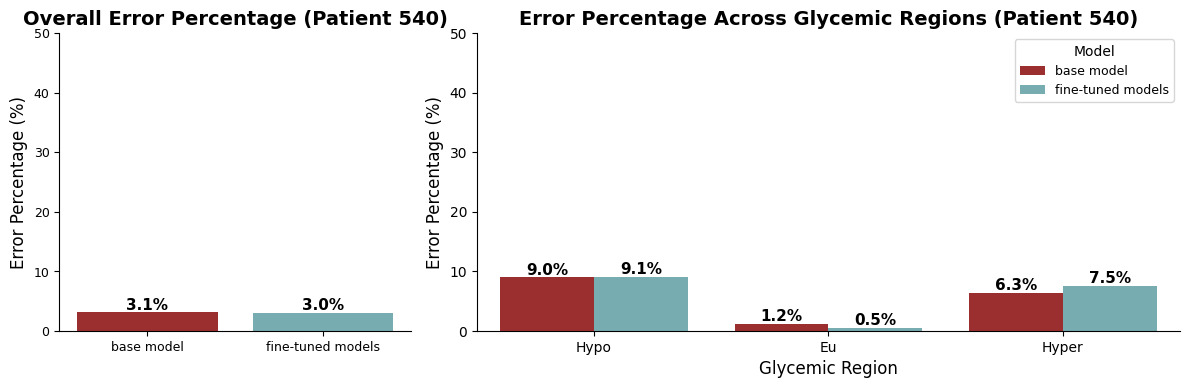

Patient ID: 544


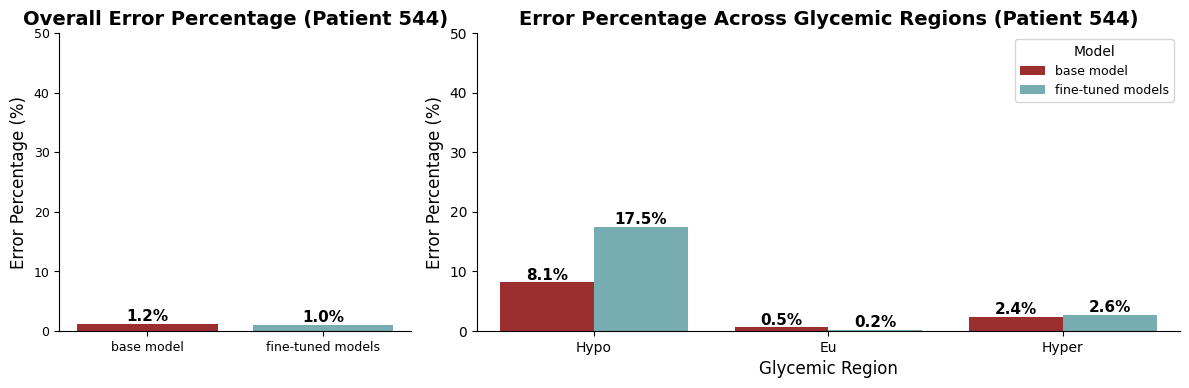

Patient ID: 552


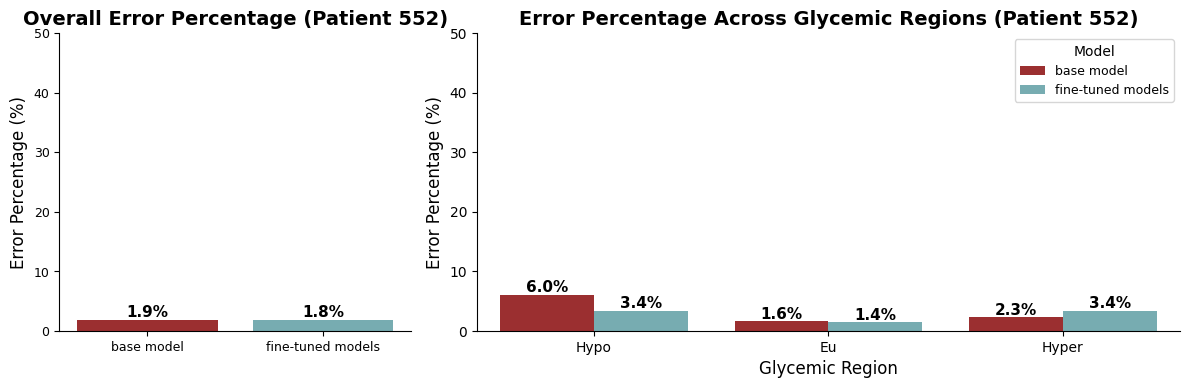

Patient ID: 559


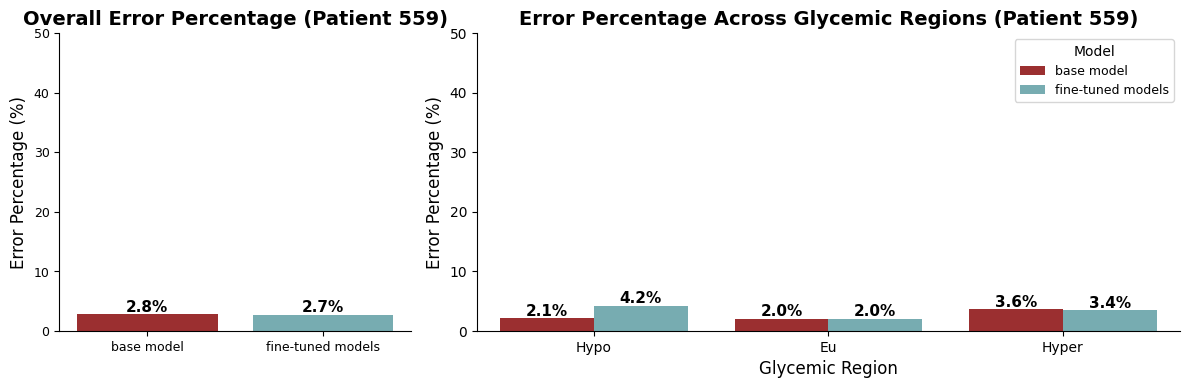

Patient ID: 563


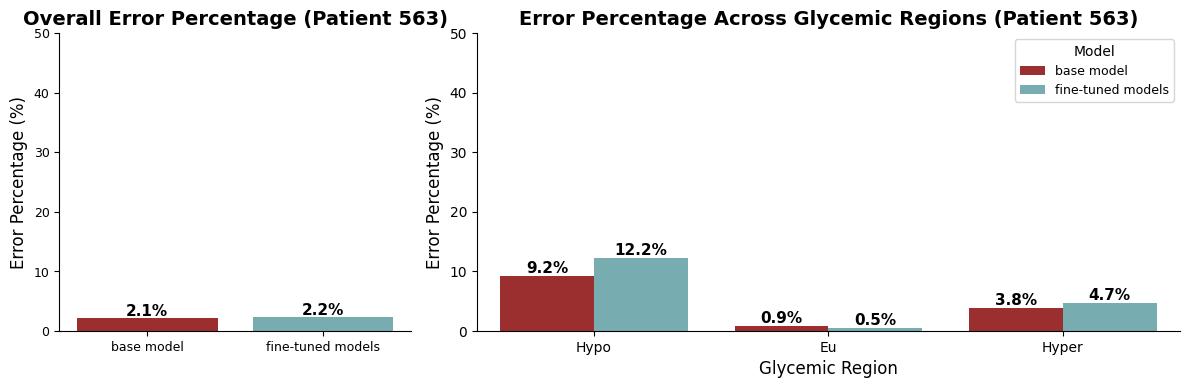

Patient ID: 567


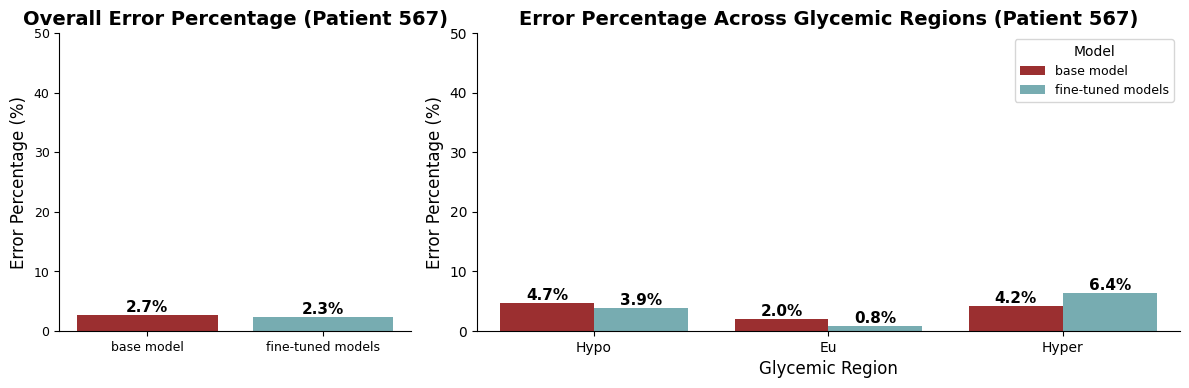

Patient ID: 570


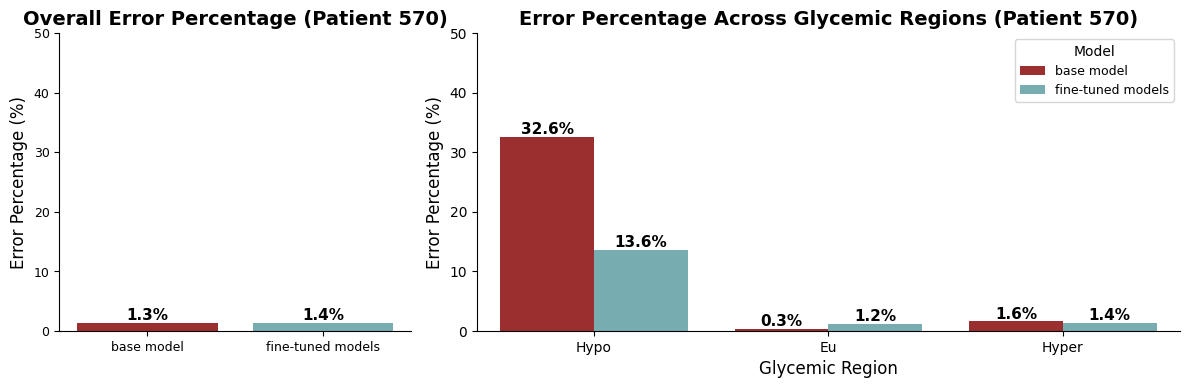

Patient ID: 575


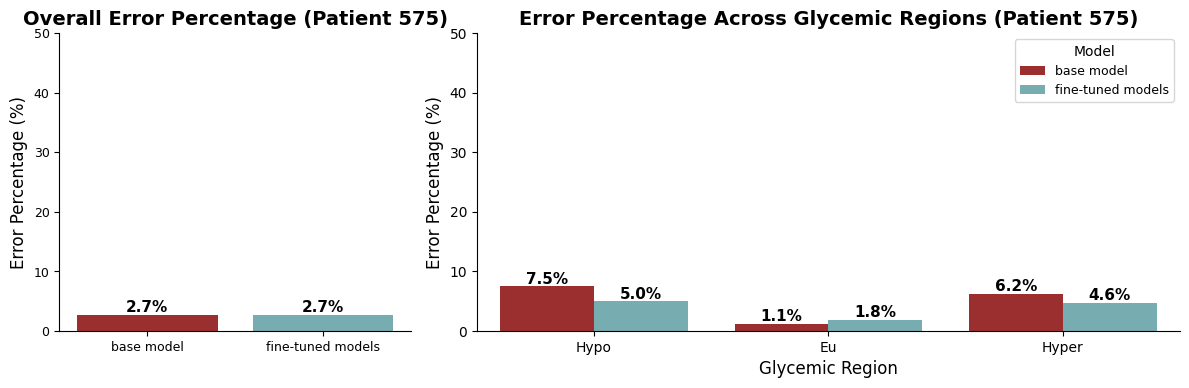

Patient ID: 584


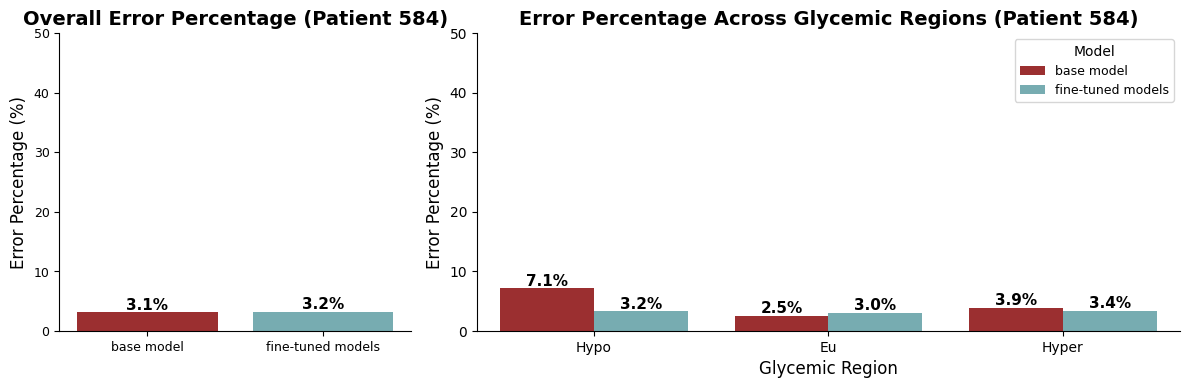

Patient ID: 588


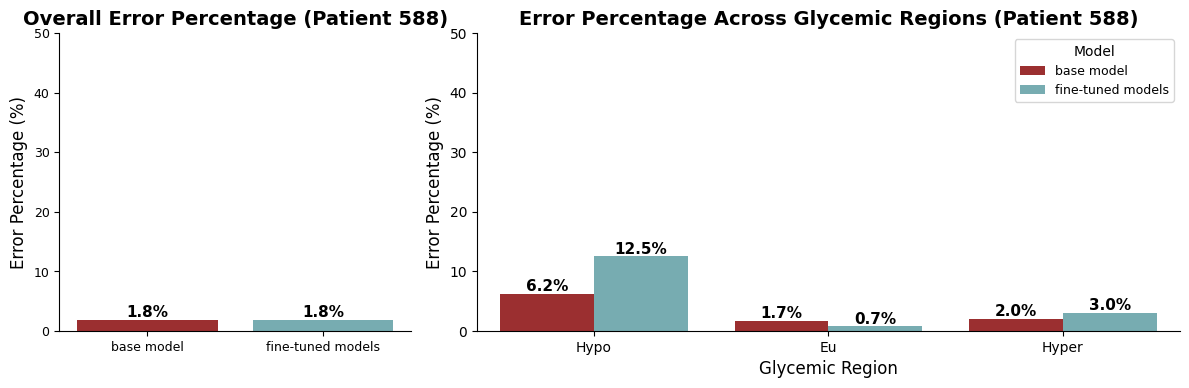

Patient ID: 591


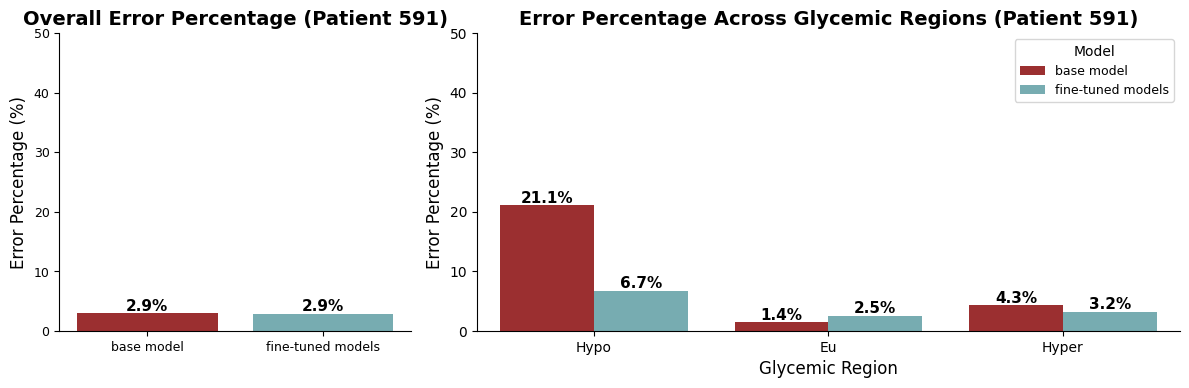

Patient ID: 596


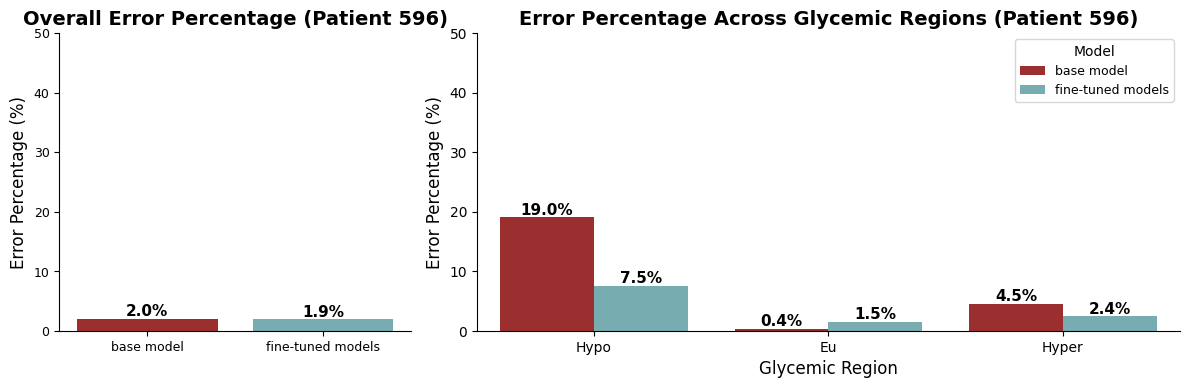

In [37]:
for ptid in ptid_list:
    print(f"Patient ID: {ptid}")

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
    palette = [model1_color, model2_color]

    # Create summary tables for overall, hypo, eu, and hyper glycaemic regions
    regions = ['overall', 'hypo', 'eu', 'hyper']
    summary_tables = {}

    # Get the dataframes for the current patient ID
    base_df = updated_base_df[ptid]
    fine_tuned_df = updated_fine_tuned_df[ptid]
    
    for region in regions:
        # Initialize empty DataFrame with specific dtypes to avoid warning
        summary_df = pd.DataFrame({
            'Model': pd.Series(dtype='object'),
            'AP': pd.Series(dtype='int64'), 
            'BE': pd.Series(dtype='int64'), 
            'EP': pd.Series(dtype='int64'), 
            'Count': pd.Series(dtype='int64'),
            'AP_pct': pd.Series(dtype='float64'), 
            'BE_pct': pd.Series(dtype='float64'), 
            'EP_pct': pd.Series(dtype='float64')
        })
        
        # Process each model
        for model, df in zip(['base model', 'fine-tuned models'], 
                            [base_df, fine_tuned_df]):
            
            # Filter for region if not overall
            if region != 'overall':
                region_df = df[df['glycemic_region'] == region]
            else:
                region_df = df
                
            # Calculate counts
            ap_count = region_df['AP'].sum()
            be_count = region_df['BE'].sum()
            ep_count = region_df['EP'].sum()
            total_count = len(region_df)
            
            # Create a new row as a dictionary and append it to the DataFrame
            new_row = {
                'Model': model, 
                'AP': ap_count, 
                'BE': be_count, 
                'EP': ep_count, 
                'Count': total_count,
                'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
                'AP_pct': ap_count / total_count * 100, 
                'BE_pct': be_count / total_count * 100, 
                'EP_pct': ep_count / total_count * 100
            }
            summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
        
        # Store in dictionary
        summary_tables[region] = summary_df

    # Create 1x2 grid figure with custom width ratios
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

    # PLOT 1: Overall EP percentage (left panel)
    sns.barplot(
        x='Model', 
        y='EP_pct', 
        data=summary_tables['overall'], 
        ax=axs[0], 
        palette=palette,
        hue='Model',
        legend=False
    )
    axs[0].set_title(f'Overall Error Percentage (Patient {ptid})', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Error Percentage (%)', fontsize=12)
    axs[0].set_xlabel('')  # Remove x-axis label
    axs[0].tick_params(axis='both', labelsize=9)
    axs[0].set_ylim(0, 50)  # Adjusted y-axis range for percentage values

    # Add data labels
    for p in axs[0].patches:
        axs[0].annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

    # PLOT 2: EP percentage by Glycemic Region (right panel)
    # Create a new dataframe that combines the regional data for plotting
    regional_data = pd.concat([
        summary_tables['hypo'][['Model', 'EP_pct']].assign(Region='Hypo'),
        summary_tables['eu'][['Model', 'EP_pct']].assign(Region='Eu'),
        summary_tables['hyper'][['Model', 'EP_pct']].assign(Region='Hyper')
    ])

    sns.barplot(
        x='Region', 
        y='EP_pct', 
        hue='Model',
        data=regional_data, 
        ax=axs[1], 
        palette=palette
    )
    axs[1].set_title(f'Error Percentage Across Glycemic Regions (Patient {ptid})', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Error Percentage (%)', fontsize=12)
    axs[1].set_xlabel('Glycemic Region', fontsize=12)
    axs[1].tick_params(axis='both', labelsize=10)
    axs[1].set_ylim(0,50)  # Adjusted y-axis range for percentage values

    # Add data labels to the second chart
    for container in axs[1].containers:
        axs[1].bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

    # Add legend to the right plot
    axs[1].legend(title='Model', fontsize=9, title_fontsize=10)

    # Remove top and right borders
    sns.despine(ax=axs[0])
    sns.despine(ax=axs[1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
    plt.show()


Patient ID: 540


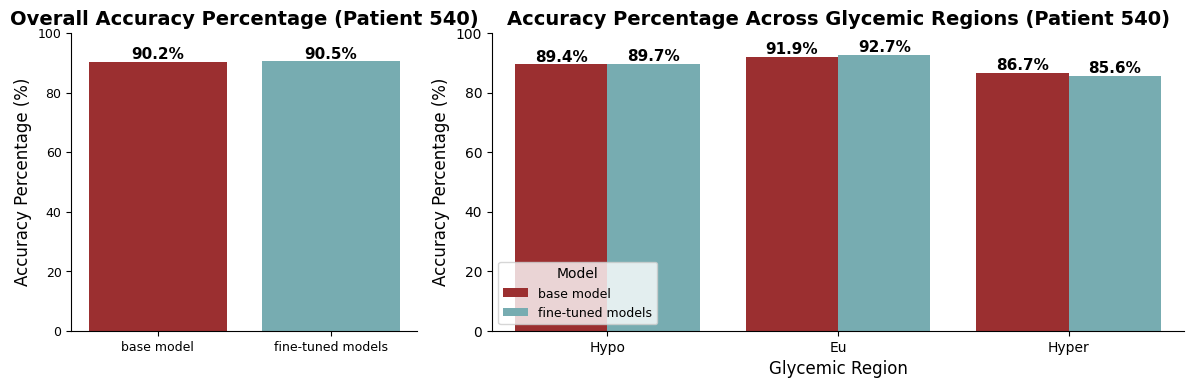

Patient ID: 544


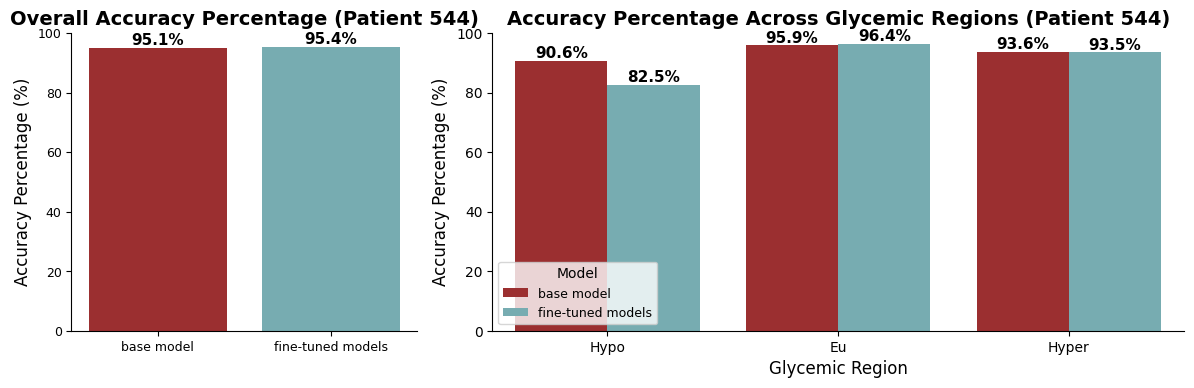

Patient ID: 552


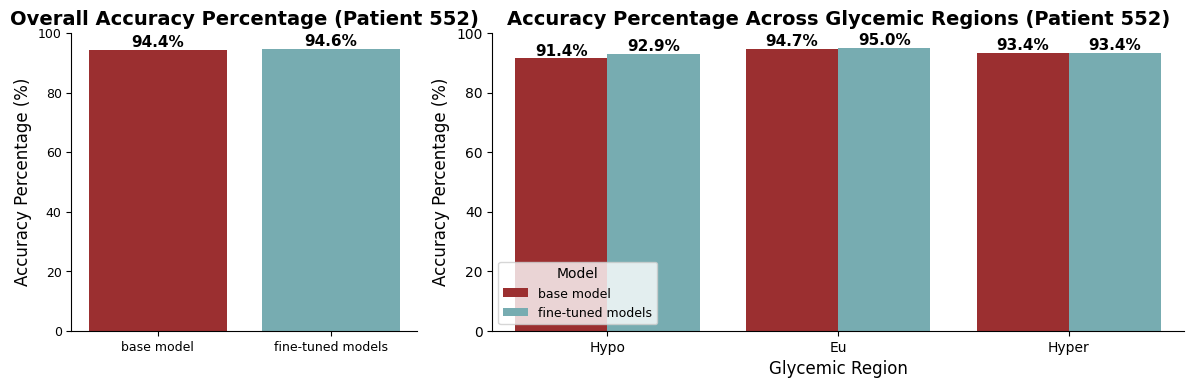

Patient ID: 559


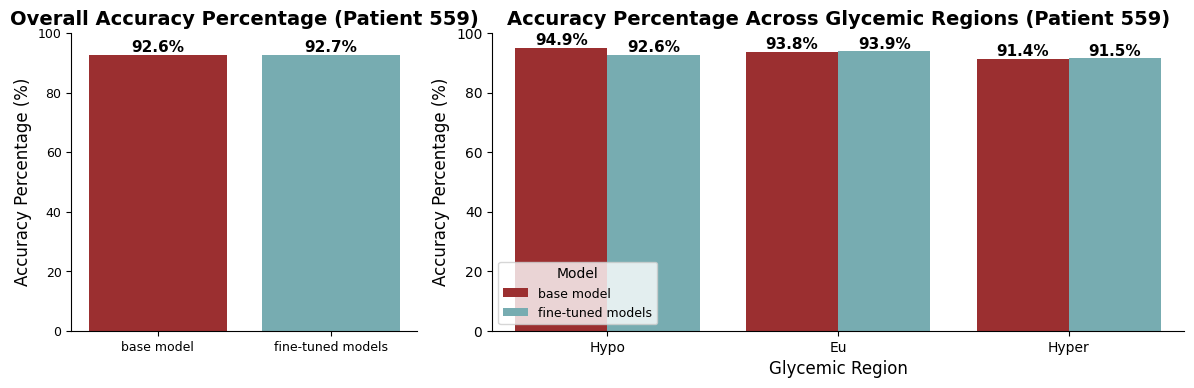

Patient ID: 563


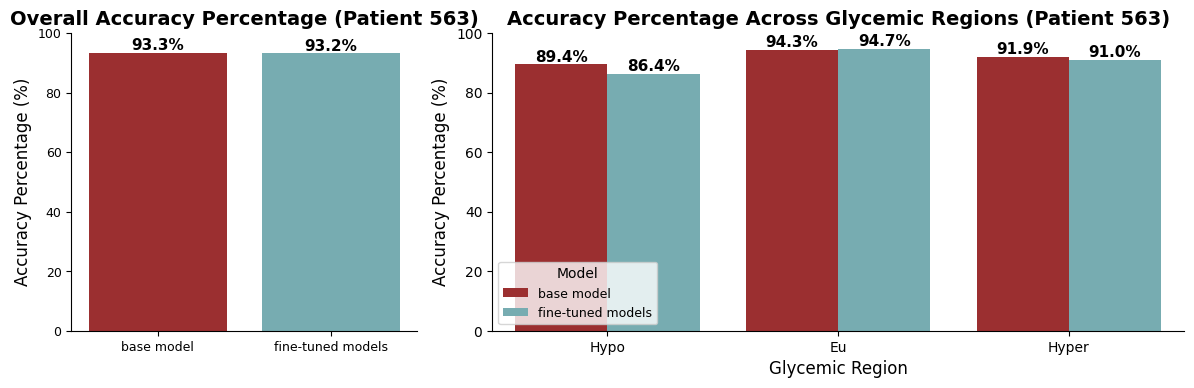

Patient ID: 567


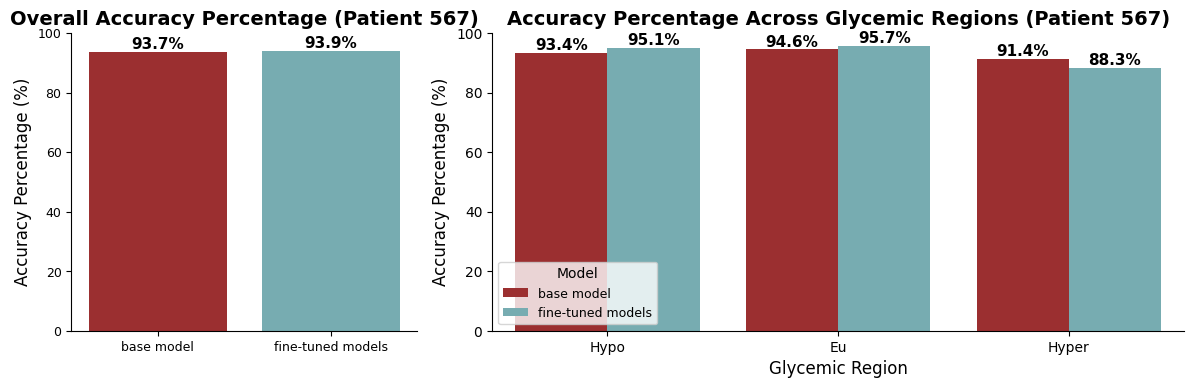

Patient ID: 570


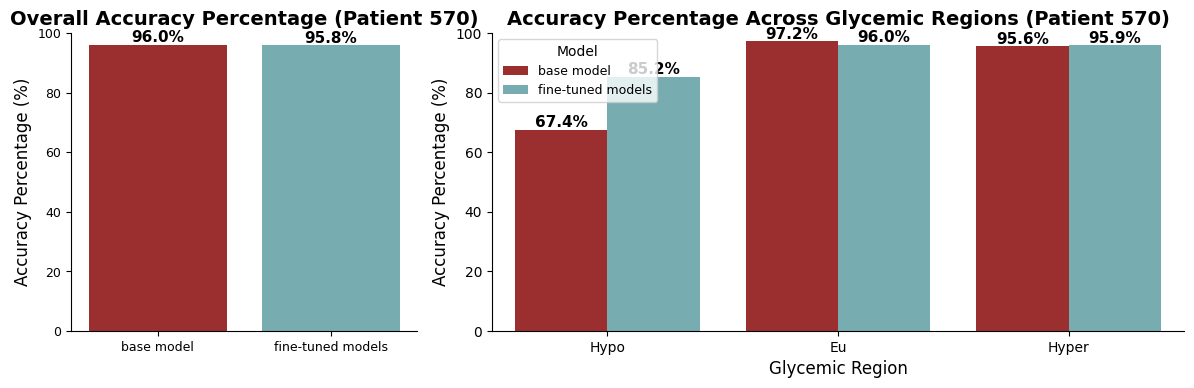

Patient ID: 575


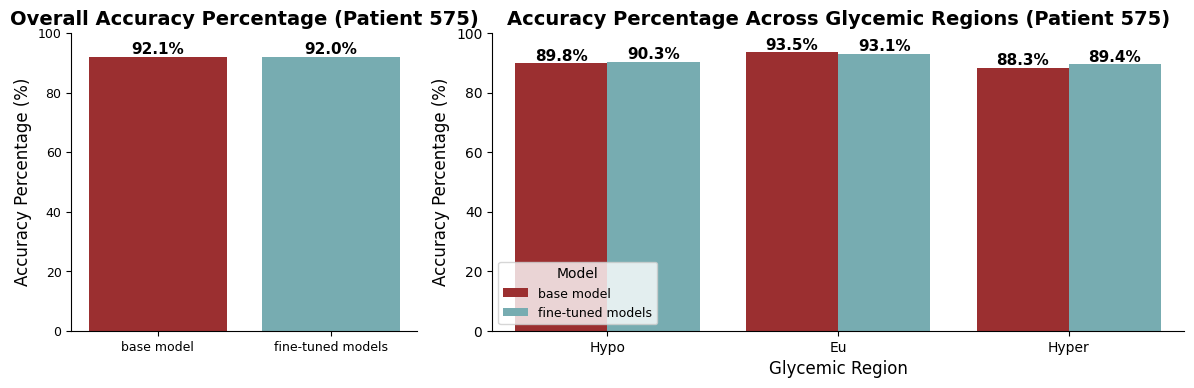

Patient ID: 584


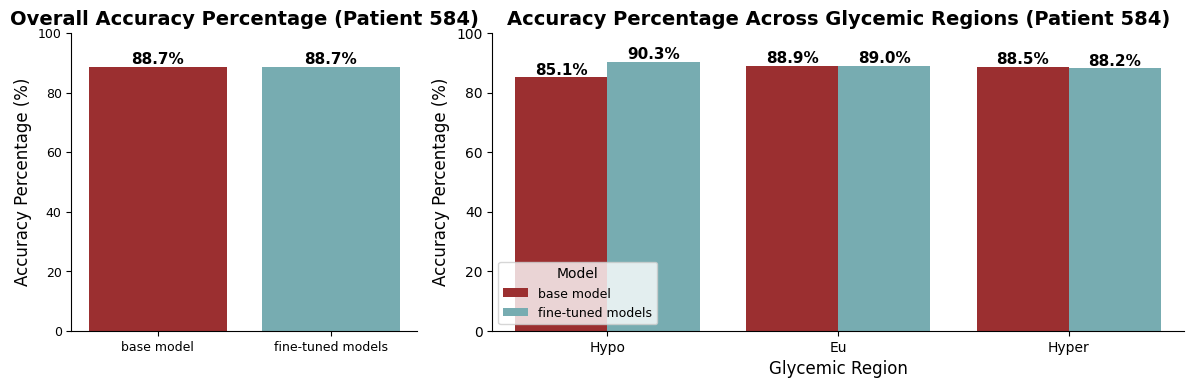

Patient ID: 588


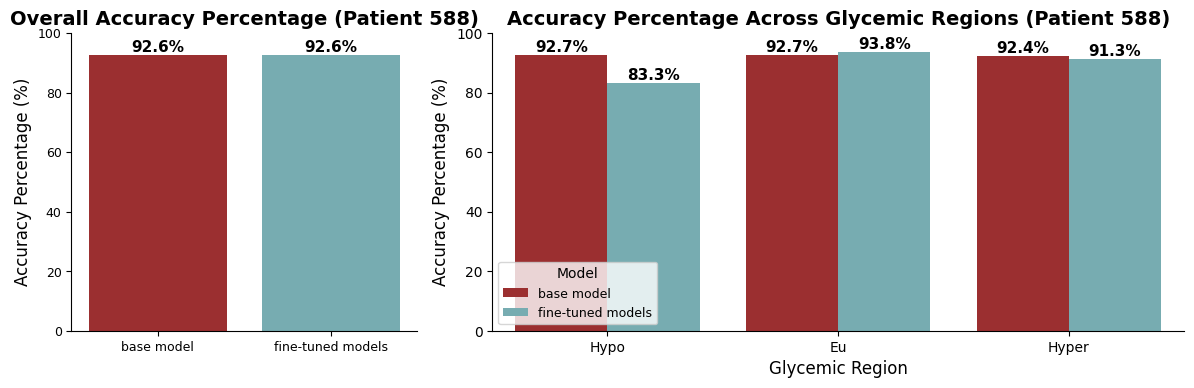

Patient ID: 591


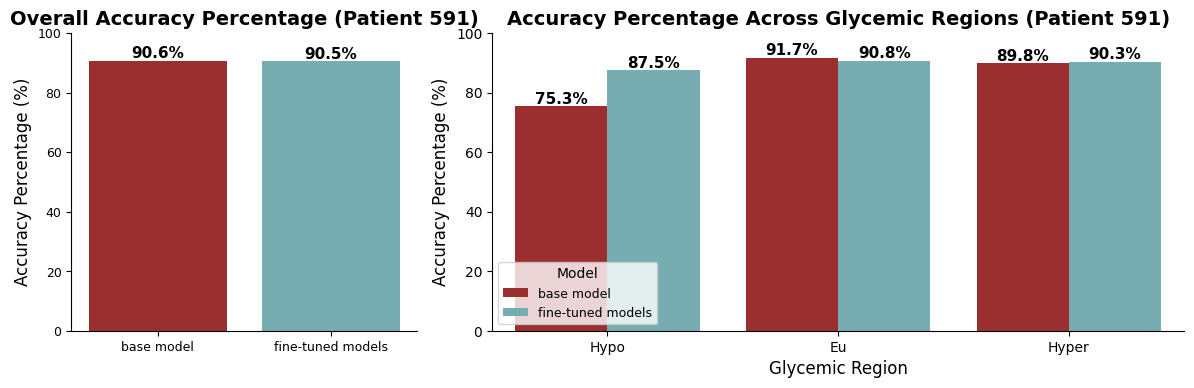

Patient ID: 596


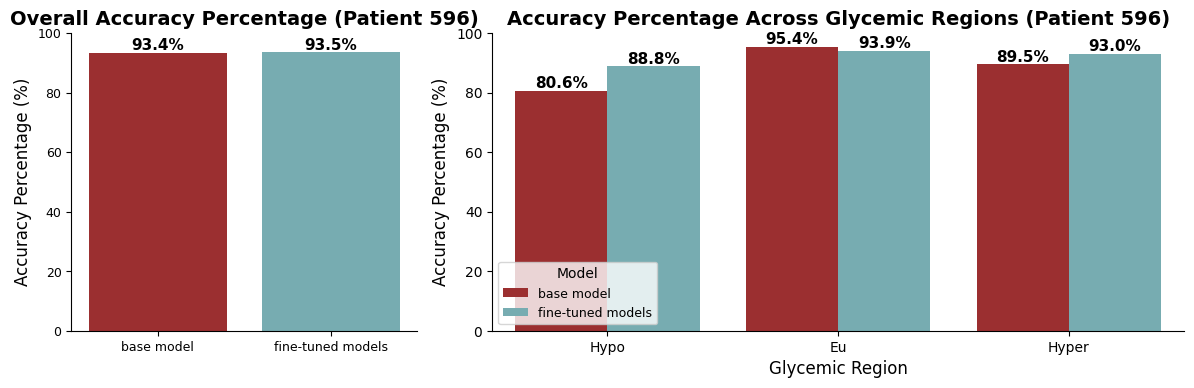

In [38]:
for ptid in ptid_list:
    print(f"Patient ID: {ptid}")

    # Define custom colors for the models
    model1_color = (173 / 255, 29 / 255, 30 / 255)  # Without Feature Enhancement
    model2_color = (110 / 255, 180 / 255, 186 / 255)  # With Feature Enhancement
    palette = [model1_color, model2_color]

    # Create summary tables for overall, hypo, eu, and hyper glycaemic regions
    regions = ['overall', 'hypo', 'eu', 'hyper']
    summary_tables = {}

    # Get the dataframes for the current patient ID
    base_df = updated_base_df[ptid]
    fine_tuned_df = updated_fine_tuned_df[ptid]
    
    for region in regions:
        # Initialize empty DataFrame with specific dtypes to avoid warning
        summary_df = pd.DataFrame({
            'Model': pd.Series(dtype='object'),
            'AP': pd.Series(dtype='int64'), 
            'BE': pd.Series(dtype='int64'), 
            'EP': pd.Series(dtype='int64'), 
            'Count': pd.Series(dtype='int64'),
            'AP_pct': pd.Series(dtype='float64'), 
            'BE_pct': pd.Series(dtype='float64'), 
            'EP_pct': pd.Series(dtype='float64')
        })
        
        # Process each model
        for model, df in zip(['base model', 'fine-tuned models'], 
                            [base_df, fine_tuned_df]):
            
            # Filter for region if not overall
            if region != 'overall':
                region_df = df[df['glycemic_region'] == region]
            else:
                region_df = df
                
            # Calculate counts
            ap_count = region_df['AP'].sum()
            be_count = region_df['BE'].sum()
            ep_count = region_df['EP'].sum()
            total_count = len(region_df)
            
            # Create a new row as a dictionary and append it to the DataFrame
            new_row = {
                'Model': model, 
                'AP': ap_count, 
                'BE': be_count, 
                'EP': ep_count, 
                'Count': total_count,
                'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
                'AP_pct': ap_count / total_count * 100, 
                'BE_pct': be_count / total_count * 100, 
                'EP_pct': ep_count / total_count * 100
            }
            summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
        
        # Store in dictionary
        summary_tables[region] = summary_df

    # Create 1x2 grid figure with custom width ratios
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

    # PLOT 1: Overall AP percentage (left panel) - changed from EP to AP
    sns.barplot(
        x='Model', 
        y='AP_pct', 
        data=summary_tables['overall'], 
        ax=axs[0], 
        palette=palette,
        hue='Model',
        legend=False
    )
    axs[0].set_title(f'Overall Accuracy Percentage (Patient {ptid})', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Accuracy Percentage (%)', fontsize=12)
    axs[0].set_xlabel('')  # Remove x-axis label
    axs[0].tick_params(axis='both', labelsize=9)
    axs[0].set_ylim(0, 100)  # Adjusted y-axis range for percentage values

    # Add data labels
    for p in axs[0].patches:
        axs[0].annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

    # PLOT 2: AP percentage by Glycemic Region (right panel) - changed from EP to AP
    # Create a new dataframe that combines the regional data for plotting
    regional_data = pd.concat([
        summary_tables['hypo'][['Model', 'AP_pct']].assign(Region='Hypo'),
        summary_tables['eu'][['Model', 'AP_pct']].assign(Region='Eu'),
        summary_tables['hyper'][['Model', 'AP_pct']].assign(Region='Hyper')
    ])

    sns.barplot(
        x='Region', 
        y='AP_pct', 
        hue='Model',
        data=regional_data, 
        ax=axs[1], 
        palette=palette
    )
    axs[1].set_title(f'Accuracy Percentage Across Glycemic Regions (Patient {ptid})', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Accuracy Percentage (%)', fontsize=12)
    axs[1].set_xlabel('Glycemic Region', fontsize=12)
    axs[1].tick_params(axis='both', labelsize=10)
    axs[1].set_ylim(0,100)  # Adjusted y-axis range for percentage values

    # Add data labels to the second chart
    for container in axs[1].containers:
        axs[1].bar_label(container, fmt='%.1f%%', fontsize=11, fontweight='bold')

    # Add legend to the right plot
    axs[1].legend(title='Model', fontsize=9, title_fontsize=10)

    # Remove top and right borders
    sns.despine(ax=axs[0])
    sns.despine(ax=axs[1])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
    plt.show()


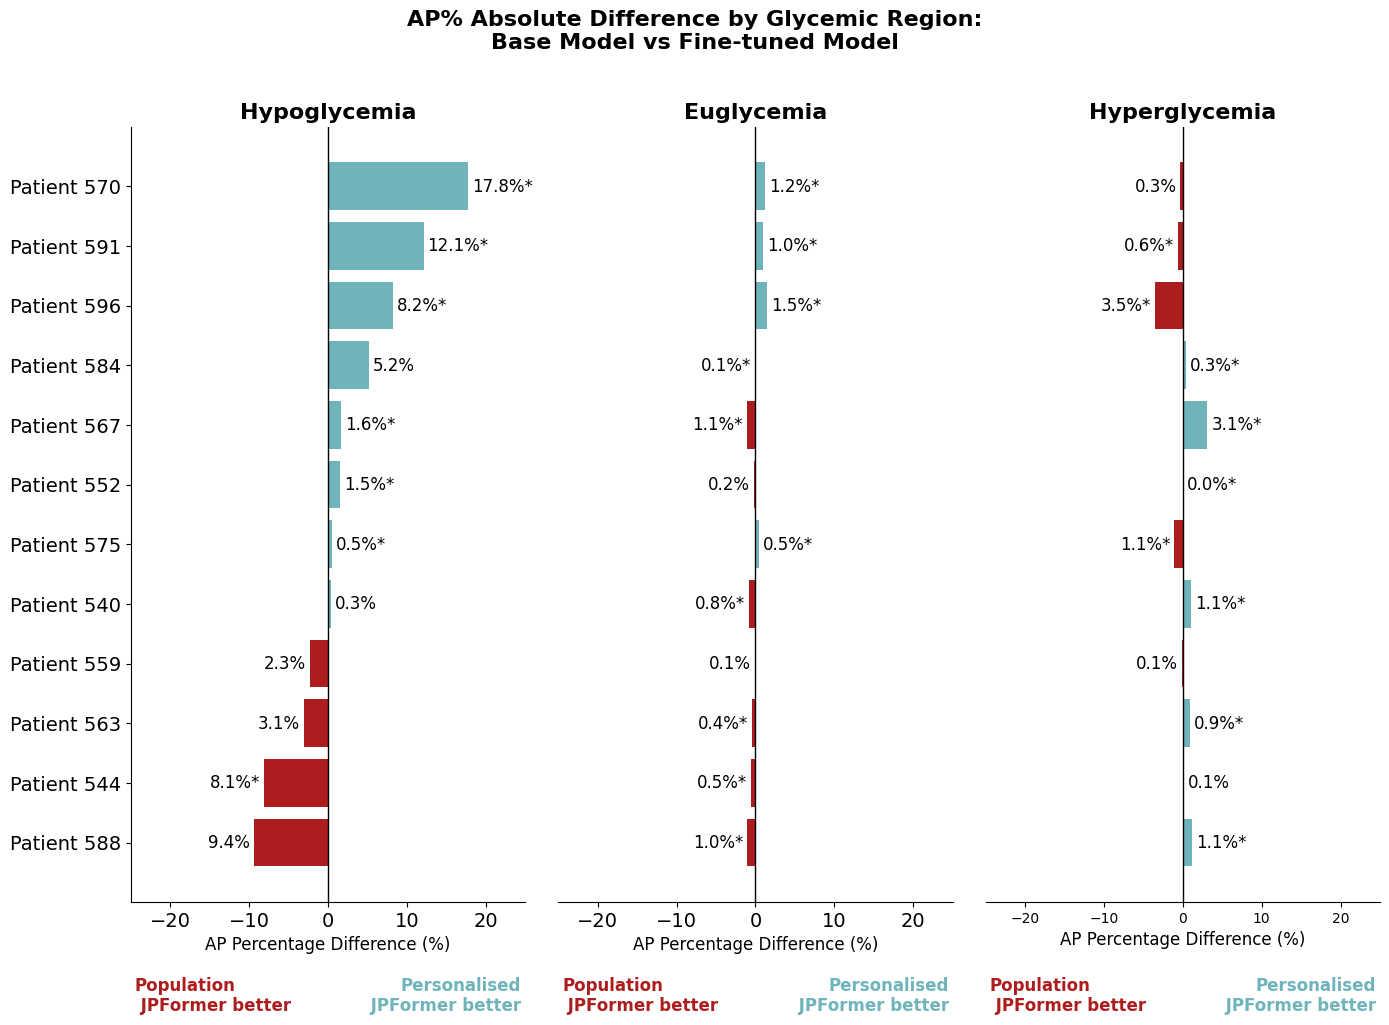

In [39]:
# Compute AP% differences for each glycemic region
ptid_hypo_ap_diff = {}
ptid_eu_ap_diff = {}
ptid_hyper_ap_diff = {}

for ptid in ptid_list:
    # HYPO region
    base_hypo_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hypo']
    fine_tuned_hypo_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hypo']
    
    if len(base_hypo_df) > 0 and len(fine_tuned_hypo_df) > 0:
        base_hypo_ap_pct = base_hypo_df['AP'].sum() / len(base_hypo_df) * 100
        fine_tuned_hypo_ap_pct = fine_tuned_hypo_df['AP'].sum() / len(fine_tuned_hypo_df) * 100
        ptid_hypo_ap_diff[ptid] = fine_tuned_hypo_ap_pct - base_hypo_ap_pct
    
    # EU region
    base_eu_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'eu']
    fine_tuned_eu_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'eu']
    
    if len(base_eu_df) > 0 and len(fine_tuned_eu_df) > 0:
        base_eu_ap_pct = base_eu_df['AP'].sum() / len(base_eu_df) * 100
        fine_tuned_eu_ap_pct = fine_tuned_eu_df['AP'].sum() / len(fine_tuned_eu_df) * 100
        ptid_eu_ap_diff[ptid] = fine_tuned_eu_ap_pct - base_eu_ap_pct
    
    # HYPER region
    base_hyper_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hyper']
    fine_tuned_hyper_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hyper']
    
    if len(base_hyper_df) > 0 and len(fine_tuned_hyper_df) > 0:
        base_hyper_ap_pct = base_hyper_df['AP'].sum() / len(base_hyper_df) * 100
        fine_tuned_hyper_ap_pct = fine_tuned_hyper_df['AP'].sum() / len(fine_tuned_hyper_df) * 100
        ptid_hyper_ap_diff[ptid] = fine_tuned_hyper_ap_pct - base_hyper_ap_pct



# Create 3x1 plot
fig, axs = plt.subplots(1, 3, figsize=(14, 10))

model1_color = (173 / 255, 29 / 255, 30 / 255)
model2_color = (110 / 255, 180 / 255, 186 / 255)

# ---- HYPOTHETIC REGION ----
# Prepare significance dict
hypo_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in hypo_chi2_summary.iterrows()
}
hypo_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_hypo_ap_diff.keys())],
    'AP Percentage Difference': [ptid_hypo_ap_diff[ptid] for ptid in sorted(ptid_hypo_ap_diff.keys())],
    'Is_Significant': [hypo_significance_dict.get(ptid, False) for ptid in sorted(ptid_hypo_ap_diff.keys())]
}).sort_values('AP Percentage Difference')

hypo_colors = [model2_color if val > 0 else model1_color for val in hypo_df['AP Percentage Difference']]

bars_hypo = axs[0].barh(hypo_df['Patient ID'], hypo_df['AP Percentage Difference'], color=hypo_colors)
axs[0].set_title('Hypoglycemia', fontsize=16, fontweight='bold')
axs[0].axvline(0, color='black', linestyle='-', linewidth=1)
axs[0].set_xlim(-25, 25)
axs[0].tick_params(axis='both', labelsize=14)

# Annotate bars with value and asterisk
for i, bar in enumerate(bars_hypo):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if hypo_df['Is_Significant'].iloc[i] else ''
    axs[0].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# ---- EUGLYCEMIC REGION ----
eu_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in eu_chi2_summary.iterrows()
}

eu_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_eu_ap_diff.keys())],
    'AP Percentage Difference': [-ptid_eu_ap_diff[ptid] for ptid in sorted(ptid_eu_ap_diff.keys())],
    'Is_Significant': [eu_significance_dict.get(ptid, False) for ptid in sorted(ptid_eu_ap_diff.keys())]
}).set_index('Patient ID').reindex(hypo_df['Patient ID']).reset_index()

eu_colors = [model2_color if val > 0 else model1_color for val in eu_df['AP Percentage Difference']]

bars_eu = axs[1].barh(eu_df['Patient ID'], eu_df['AP Percentage Difference'], color=eu_colors)
axs[1].set_title('Euglycemia', fontsize=16, fontweight='bold')
axs[1].axvline(0, color='black', linestyle='-', linewidth=1)
axs[1].set_xlim(-25, 25)
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize=14)

for i, bar in enumerate(bars_eu):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if eu_df['Is_Significant'].iloc[i] else ''
    axs[1].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# ---- HYPERGLYCEMIC REGION ----
hyper_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in hyper_chi2_summary.iterrows()
}

hyper_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_hyper_ap_diff.keys())],
    'AP Percentage Difference': [-ptid_hyper_ap_diff[ptid] for ptid in sorted(ptid_hyper_ap_diff.keys())],
    'Is_Significant': [hyper_significance_dict.get(ptid, False) for ptid in sorted(ptid_hyper_ap_diff.keys())]
}).set_index('Patient ID').reindex(hypo_df['Patient ID']).reset_index()

hyper_colors = [model2_color if val > 0 else model1_color for val in hyper_df['AP Percentage Difference']]

bars_hyper = axs[2].barh(hyper_df['Patient ID'], hyper_df['AP Percentage Difference'], color=hyper_colors)
axs[2].set_title('Hyperglycemia', fontsize=16, fontweight='bold')
axs[2].axvline(0, color='black', linestyle='-', linewidth=1)
axs[2].set_xlim(-25, 25)
axs[2].set_yticks([])

for i, bar in enumerate(bars_hyper):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if hyper_df['Is_Significant'].iloc[i] else ''
    axs[2].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# Styling
for ax in axs:
    ax.set_xlabel('AP Percentage Difference (%)', fontsize=12)
    sns.despine(ax=ax)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[0]+0.5, ylim[0] - 1.25, 'Population\n JPFormer better', 
            color=model1_color, fontsize=12, fontweight='bold', ha='left', va='top')
    ax.text(xlim[1]-0.5, ylim[0] - 1.25, 'Personalised\n JPFormer better', 
            color=model2_color, fontsize=12, fontweight='bold', ha='right', va='top')

axs[1].spines['left'].set_visible(False)
axs[2].spines['left'].set_visible(False)

plt.suptitle('AP% Absolute Difference by Glycemic Region:\nBase Model vs Fine-tuned Model', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

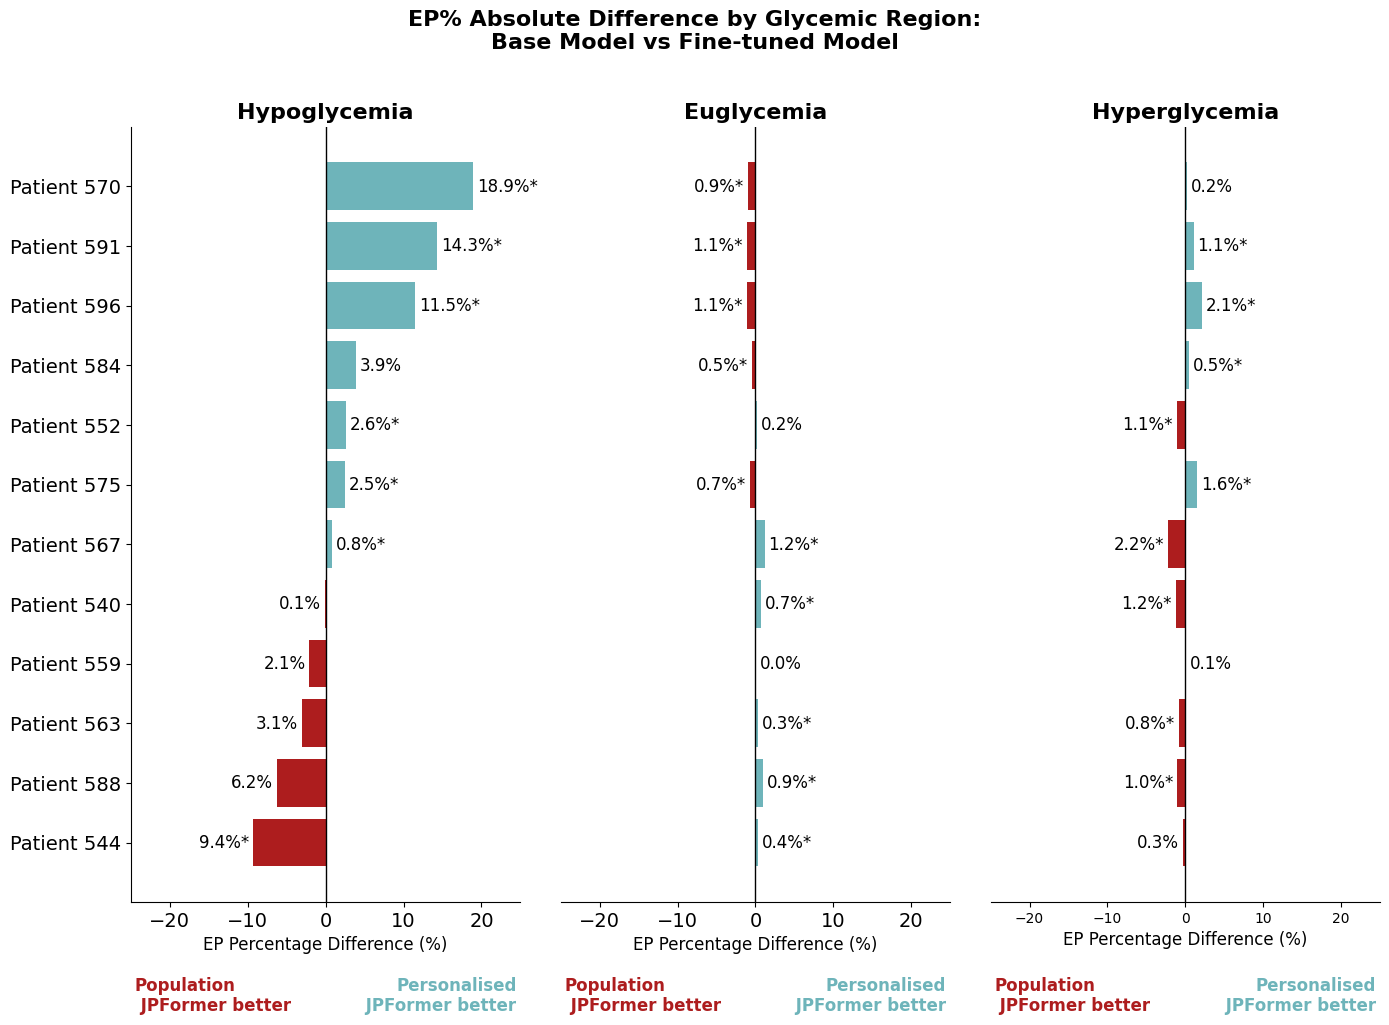

In [40]:
# Compute EP% differences for each glycemic region
ptid_hypo_ep_diff = {}
ptid_eu_ep_diff = {}
ptid_hyper_ep_diff = {}

for ptid in ptid_list:
    # HYPO region
    base_hypo_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hypo']
    fine_tuned_hypo_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hypo']
    
    if len(base_hypo_df) > 0 and len(fine_tuned_hypo_df) > 0:
        base_hypo_ep_pct = base_hypo_df['EP'].sum() / len(base_hypo_df) * 100
        fine_tuned_hypo_ep_pct = fine_tuned_hypo_df['EP'].sum() / len(fine_tuned_hypo_df) * 100
        ptid_hypo_ep_diff[ptid] = (fine_tuned_hypo_ep_pct - base_hypo_ep_pct)*-1
    
    # EU region
    base_eu_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'eu']
    fine_tuned_eu_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'eu']
    
    if len(base_eu_df) > 0 and len(fine_tuned_eu_df) > 0:
        base_eu_ep_pct = base_eu_df['EP'].sum() / len(base_eu_df) * 100
        fine_tuned_eu_ep_pct = fine_tuned_eu_df['EP'].sum() / len(fine_tuned_eu_df) * 100
        ptid_eu_ep_diff[ptid] = fine_tuned_eu_ep_pct - base_eu_ep_pct
    
    # HYPER region
    base_hyper_df = updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hyper']
    fine_tuned_hyper_df = updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hyper']
    
    if len(base_hyper_df) > 0 and len(fine_tuned_hyper_df) > 0:
        base_hyper_ep_pct = base_hyper_df['EP'].sum() / len(base_hyper_df) * 100
        fine_tuned_hyper_ep_pct = fine_tuned_hyper_df['EP'].sum() / len(fine_tuned_hyper_df) * 100
        ptid_hyper_ep_diff[ptid] = fine_tuned_hyper_ep_pct - base_hyper_ep_pct

# Create 3x1 plot
fig, axs = plt.subplots(1, 3, figsize=(14, 10))

model1_color = (173 / 255, 29 / 255, 30 / 255)
model2_color = (110 / 255, 180 / 255, 186 / 255)

# ---- HYPOTHETIC REGION ----
hypo_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in hypo_chi2_summary.iterrows()
}
hypo_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_hypo_ep_diff.keys())],
    'EP Percentage Difference': [ptid_hypo_ep_diff[ptid] for ptid in sorted(ptid_hypo_ep_diff.keys())],
    'Is_Significant': [hypo_significance_dict.get(ptid, False) for ptid in sorted(ptid_hypo_ep_diff.keys())]
}).sort_values('EP Percentage Difference')

hypo_colors = [model2_color if val > 0 else model1_color for val in hypo_df['EP Percentage Difference']]

bars_hypo = axs[0].barh(hypo_df['Patient ID'], hypo_df['EP Percentage Difference'], color=hypo_colors)
axs[0].set_title('Hypoglycemia', fontsize=16, fontweight='bold')
axs[0].axvline(0, color='black', linestyle='-', linewidth=1)
axs[0].set_xlim(-25, 25)
axs[0].tick_params(axis='both', labelsize=14)

for i, bar in enumerate(bars_hypo):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if hypo_df['Is_Significant'].iloc[i] else ''
    axs[0].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# ---- EUGLYCEMIC REGION ----
eu_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in eu_chi2_summary.iterrows()
}

eu_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_eu_ep_diff.keys())],
    'EP Percentage Difference': [-ptid_eu_ep_diff[ptid] for ptid in sorted(ptid_eu_ep_diff.keys())],
    'Is_Significant': [eu_significance_dict.get(ptid, False) for ptid in sorted(ptid_eu_ep_diff.keys())]
}).set_index('Patient ID').reindex(hypo_df['Patient ID']).reset_index()

eu_colors = [model2_color if val > 0 else model1_color for val in eu_df['EP Percentage Difference']]

bars_eu = axs[1].barh(eu_df['Patient ID'], eu_df['EP Percentage Difference'], color=eu_colors)
axs[1].set_title('Euglycemia', fontsize=16, fontweight='bold')
axs[1].axvline(0, color='black', linestyle='-', linewidth=1)
axs[1].set_xlim(-25, 25)
axs[1].set_yticks([])
axs[1].tick_params(axis='x', labelsize=14)

for i, bar in enumerate(bars_eu):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if eu_df['Is_Significant'].iloc[i] else ''
    axs[1].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# ---- HYPERGLYCEMIC REGION ----
hyper_significance_dict = {
    row['Patient ID']: row['Significant']
    for _, row in hyper_chi2_summary.iterrows()
}

hyper_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_hyper_ep_diff.keys())],
    'EP Percentage Difference': [-ptid_hyper_ep_diff[ptid] for ptid in sorted(ptid_hyper_ep_diff.keys())],
    'Is_Significant': [hyper_significance_dict.get(ptid, False) for ptid in sorted(ptid_hyper_ep_diff.keys())]
}).set_index('Patient ID').reindex(hypo_df['Patient ID']).reset_index()

hyper_colors = [model2_color if val > 0 else model1_color for val in hyper_df['EP Percentage Difference']]

bars_hyper = axs[2].barh(hyper_df['Patient ID'], hyper_df['EP Percentage Difference'], color=hyper_colors)
axs[2].set_title('Hyperglycemia', fontsize=16, fontweight='bold')
axs[2].axvline(0, color='black', linestyle='-', linewidth=1)
axs[2].set_xlim(-25, 25)
axs[2].set_yticks([])

for i, bar in enumerate(bars_hyper):
    width = bar.get_width()
    label_x_pos = width + 0.5 if width > 0 else width - 0.5
    asterisk = '*' if hyper_df['Is_Significant'].iloc[i] else ''
    axs[2].text(label_x_pos, bar.get_y() + bar.get_height()/2,
                f'{abs(width):.1f}%{asterisk}', va='center',
                ha='left' if width > 0 else 'right', fontsize=12)

# Styling
for ax in axs:
    ax.set_xlabel('EP Percentage Difference (%)', fontsize=12)
    sns.despine(ax=ax)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[0]+0.5, ylim[0] - 1.25, 'Population\n JPFormer better', 
            color=model1_color, fontsize=12, fontweight='bold', ha='left', va='top')
    ax.text(xlim[1]-0.5, ylim[0] - 1.25, 'Personalised\n JPFormer better', 
            color=model2_color, fontsize=12, fontweight='bold', ha='right', va='top')

axs[1].spines['left'].set_visible(False)
axs[2].spines['left'].set_visible(False)

plt.suptitle('EP% Absolute Difference by Glycemic Region:\nBase Model vs Fine-tuned Model', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()




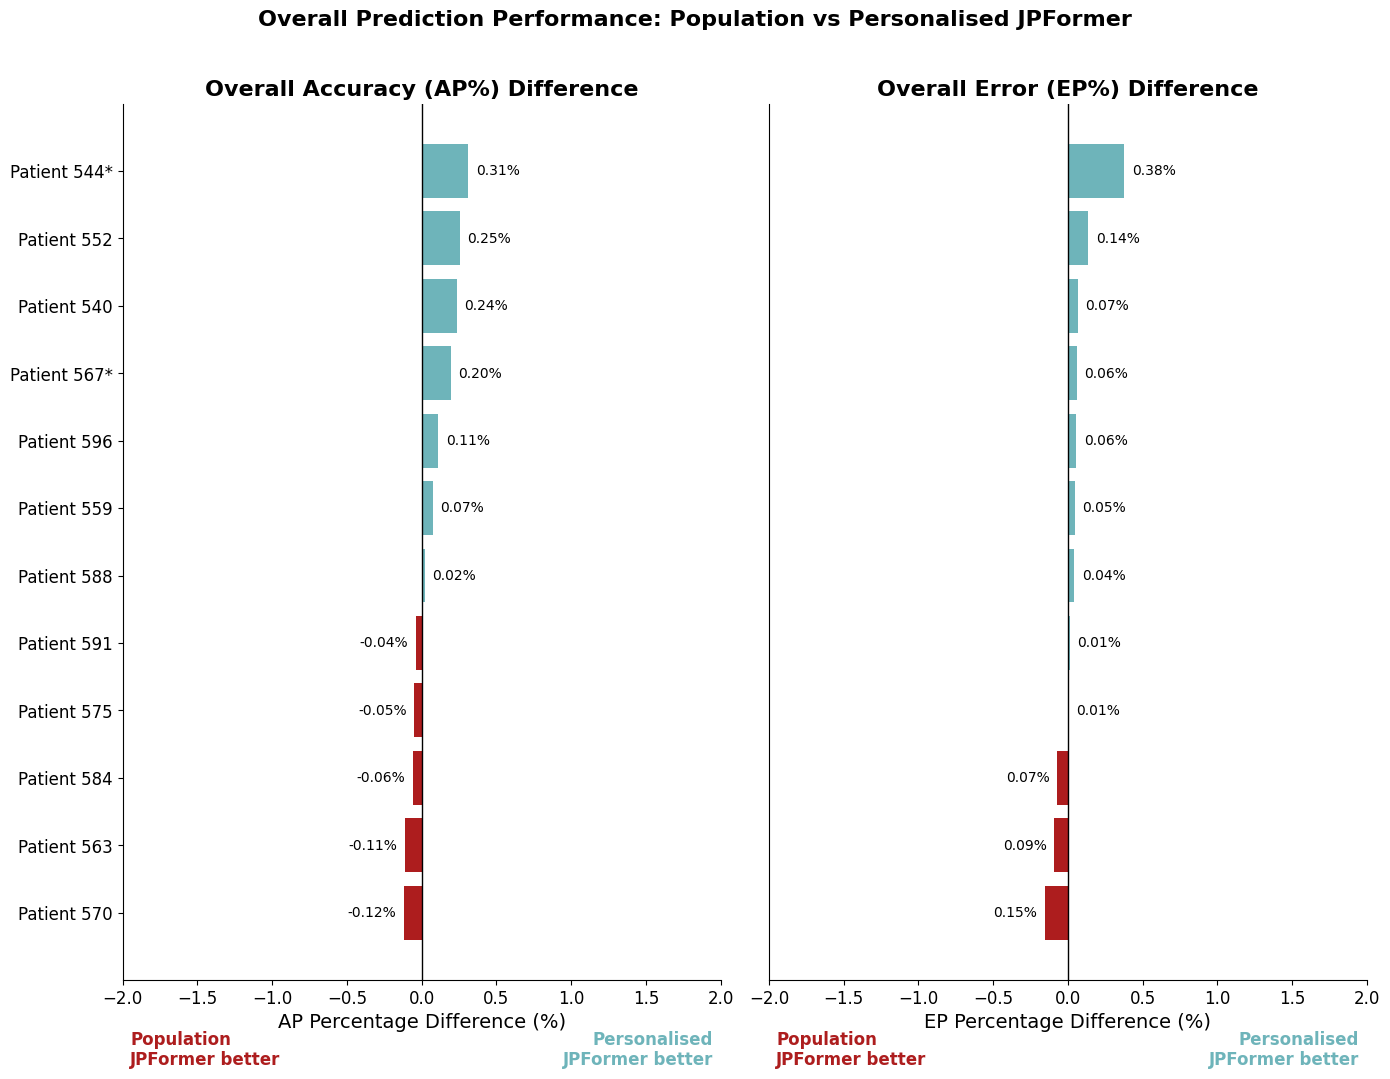

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create figure with 1x2 grid layout
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

model1_color = (173 / 255, 29 / 255, 30 / 255)  # Population model color
model2_color = (110 / 255, 180 / 255, 186 / 255)  # Personalized model color

# ---- AP PERCENTAGE PLOT (left panel) ----
# Compute overall AP% differences across all glycemic regions
ptid_overall_ap_diff = {}

for ptid in ptid_list:
    # Get all data for each patient 
    base_df = updated_base_df[ptid]
    fine_tuned_df = updated_fine_tuned_df[ptid]
    
    if len(base_df) > 0 and len(fine_tuned_df) > 0:
        base_ap_pct = base_df['AP'].sum() / len(base_df) * 100
        fine_tuned_ap_pct = fine_tuned_df['AP'].sum() / len(fine_tuned_df) * 100
        ptid_overall_ap_diff[ptid] = fine_tuned_ap_pct - base_ap_pct

# Create significance dictionary based on overall chi2 results
overall_significance_dict = {}
for ptid in ptid_list:
    # Get overall significance from chi2 results
    row = overall_chi2_summary[overall_chi2_summary['Patient ID'] == ptid]
    overall_significance_dict[ptid] = row['Significant'].values[0] if not row.empty else False

# Create dataframe for AP% plot
ap_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_overall_ap_diff.keys())],
    'AP Percentage Difference': [ptid_overall_ap_diff[ptid] for ptid in sorted(ptid_overall_ap_diff.keys())],
    'Is_Significant': [overall_significance_dict.get(ptid, False) for ptid in sorted(ptid_overall_ap_diff.keys())]
}).sort_values('AP Percentage Difference')

# Add asterisks to patient IDs where results are significant
ap_df['Patient ID'] = [f"{patient_id}*" if is_sig else patient_id 
                      for patient_id, is_sig in zip(ap_df['Patient ID'], ap_df['Is_Significant'])]

ap_colors = [model2_color if val > 0 else model1_color for val in ap_df['AP Percentage Difference']]

# Plot AP% differences
bars_ap = axs[0].barh(ap_df['Patient ID'], ap_df['AP Percentage Difference'], color=ap_colors)
axs[0].set_title('Overall Accuracy (AP%) Difference', fontsize=16, fontweight='bold')
axs[0].axvline(0, color='black', linestyle='-', linewidth=1)
axs[0].set_xlim(-2, 2)  # Adjusted limits for AP% differences
axs[0].set_xlabel('AP Percentage Difference (%)', fontsize=14)

axs[0].tick_params(axis='both', labelsize=12)

# Add data labels without asterisks (since they're on y-axis labels now)
for i, bar in enumerate(bars_ap):
    width = bar.get_width()
    label_x_pos = width + 0.05 if width > 0 else width - 0.05
    axs[0].text(label_x_pos, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}%', va='center',
            ha='left' if width > 0 else 'right', fontsize=10)

# ---- EP PERCENTAGE PLOT (right panel) ----
# Compute overall EP% differences across all glycemic regions
ptid_overall_ep_diff = {}

for ptid in ptid_list:
    # Get all data for each patient 
    base_df = updated_base_df[ptid]
    fine_tuned_df = updated_fine_tuned_df[ptid]
    
    if len(base_df) > 0 and len(fine_tuned_df) > 0:
        base_ep_pct = base_df['EP'].sum() / len(base_df) * 100
        fine_tuned_ep_pct = fine_tuned_df['EP'].sum() / len(fine_tuned_df) * 100
        ptid_overall_ep_diff[ptid] = fine_tuned_ep_pct - base_ep_pct

# Create dataframe for EP% plot
ep_df = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted(ptid_overall_ep_diff.keys())],
    'EP Percentage Difference': [-ptid_overall_ep_diff[ptid] for ptid in sorted(ptid_overall_ep_diff.keys())],
    'Is_Significant': [overall_significance_dict.get(ptid, False) for ptid in sorted(ptid_overall_ep_diff.keys())]
}).sort_values('EP Percentage Difference')

# Add asterisks to patient IDs where results are significant
ep_df['Patient ID'] = [f"{patient_id}*" if is_sig else patient_id 
                      for patient_id, is_sig in zip(ep_df['Patient ID'], ep_df['Is_Significant'])]

ep_colors = [model2_color if val > 0 else model1_color for val in ep_df['EP Percentage Difference']]

# Plot EP% differences
bars_ep = axs[1].barh(ep_df['Patient ID'], ep_df['EP Percentage Difference'], color=ep_colors)
axs[1].set_title('Overall Error (EP%) Difference', fontsize=16, fontweight='bold')
axs[1].axvline(0, color='black', linestyle='-', linewidth=1)
axs[1].set_xlim(-2, 2)  # Adjusted limits for EP% differences
axs[1].set_xlabel('EP Percentage Difference (%)', fontsize=14)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_yticks([])  # Hide y-axis labels on second plot

# Add data labels without asterisks (since they're on y-axis labels now)
for i, bar in enumerate(bars_ep):
    width = bar.get_width()
    label_x_pos = width + 0.05 if width > 0 else width - 0.05
    axs[1].text(label_x_pos, bar.get_y() + bar.get_height()/2,
            f'{abs(width):.2f}%', va='center',
            ha='left' if width > 0 else 'right', fontsize=10)

# Add explanations for colors
for ax in axs:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(xlim[0]+0.05, ylim[0] - 0.75, 'Population\nJPFormer better', 
            color=model1_color, fontsize=12, fontweight='bold', ha='left', va='top')
    ax.text(xlim[1]-0.05, ylim[0] - 0.75, 'Personalised\nJPFormer better', 
            color=model2_color, fontsize=12, fontweight='bold', ha='right', va='top')
    sns.despine(ax=ax)

plt.suptitle('Overall Prediction Performance: Population vs Personalised JPFormer',
             fontsize=16, fontweight='bold', y=1.02)



plt.tight_layout()
plt.subplots_adjust(bottom=0.05)
plt.show()

In [41]:
# First, calculate the AP% and EP% differences
ptid_overall_ap_diff = {}
ptid_overall_ep_diff = {}

for ptid in ptid_list:
    # Get overall data
    base_df = updated_base_df[ptid]
    fine_tuned_df = updated_fine_tuned_df[ptid]
    
    base_total = len(base_df)
    fine_tuned_total = len(fine_tuned_df)
    
    if base_total > 0 and fine_tuned_total > 0:
        base_ap_pct = base_df['AP'].sum() / base_total * 100
        fine_tuned_ap_pct = fine_tuned_df['AP'].sum() / fine_tuned_total * 100
        ap_pct_diff = fine_tuned_ap_pct - base_ap_pct
        ptid_overall_ap_diff[ptid] = ap_pct_diff
        
        base_ep_pct = base_df['EP'].sum() / base_total * 100
        fine_tuned_ep_pct = fine_tuned_df['EP'].sum() / fine_tuned_total * 100
        ep_pct_diff = fine_tuned_ep_pct - base_ep_pct
        ptid_overall_ep_diff[ptid] = ep_pct_diff

# Create more detailed DataFrames for tables
comparison_df = pd.DataFrame(index=[f"Patient {ptid}" for ptid in ptid_list])

# Add AP metrics
comparison_df['AP% Base Model'] = [round(updated_base_df[ptid]['AP'].sum() / len(updated_base_df[ptid]) * 100, 2) if len(updated_base_df[ptid]) > 0 else 0 for ptid in ptid_list]
comparison_df['AP% Fine-tuned'] = [round(updated_fine_tuned_df[ptid]['AP'].sum() / len(updated_fine_tuned_df[ptid]) * 100, 2) if len(updated_fine_tuned_df[ptid]) > 0 else 0 for ptid in ptid_list]
comparison_df['AP% Difference'] = comparison_df['AP% Fine-tuned'] - comparison_df['AP% Base Model']

# Add EP metrics
comparison_df['EP% Base Model'] = [round(updated_base_df[ptid]['EP'].sum() / len(updated_base_df[ptid]) * 100, 2) if len(updated_base_df[ptid]) > 0 else 0 for ptid in ptid_list]
comparison_df['EP% Fine-tuned'] = [round(updated_fine_tuned_df[ptid]['EP'].sum() / len(updated_fine_tuned_df[ptid]) * 100, 2) if len(updated_fine_tuned_df[ptid]) > 0 else 0 for ptid in ptid_list]
comparison_df['EP% Difference'] = comparison_df['EP% Fine-tuned'] - comparison_df['EP% Base Model']

# Sort by AP% Difference
overall_comparison_df = comparison_df.sort_values('AP% Difference', ascending=False)

# Style the dataframe for better visualization
overall_styled_df = overall_comparison_df.style.background_gradient(subset=['AP% Difference', 'EP% Difference'], 
                                                  cmap='RdYlGn', 
                                                  vmin=-0.6, 
                                                  vmax=0.6)

# Format to show percentage signs
styled_df = overall_styled_df.format("{:.2f}%")

# Add a title
print("AP% and EP% Metrics: PopJPFormer vs PersJPFormer")

# Display the table
display(overall_styled_df)


AP% and EP% Metrics: PopJPFormer vs PersJPFormer


,AP% Base Model,AP% Fine-tuned,AP% Difference,EP% Base Model,EP% Fine-tuned,EP% Difference
Patient 544,95.10%,95.42%,0.32%,1.17%,1.04%,-0.13%
Patient 552,94.35%,94.61%,0.26%,1.86%,1.82%,-0.04%
Patient 540,90.22%,90.45%,0.23%,3.07%,3.01%,-0.06%
Patient 567,93.74%,93.94%,0.20%,2.71%,2.33%,-0.38%
Patient 596,93.40%,93.51%,0.11%,1.98%,1.92%,-0.06%
Patient 559,92.64%,92.72%,0.08%,2.75%,2.71%,-0.04%
Patient 588,92.57%,92.59%,0.02%,1.81%,1.80%,-0.01%
Patient 591,90.55%,90.51%,-0.04%,2.93%,2.87%,-0.06%
Patient 575,92.08%,92.03%,-0.05%,2.70%,2.69%,-0.01%
Patient 584,88.74%,88.68%,-0.06%,3.09%,3.16%,0.07%


In [42]:

# Define sorted_ptids based on the ptid_list
sorted_ptids = sorted(ptid_list)

# Create a summary table showing the percentage change in hypoglycemia detection
hypoglycemia_summary = pd.DataFrame({
    'Patient ID': [f"Patient {ptid}" for ptid in sorted_ptids],
    'Base AP%': [round(updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hypo']['AP'].mean() * 100, 1) 
                for ptid in sorted_ptids],
    'Fine-tuned AP%': [round(updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hypo']['AP'].mean() * 100, 1) 
                      for ptid in sorted_ptids],
    'AP% Change': [round(ptid_hypo_ap_diff[ptid], 1) for ptid in sorted_ptids],
    'Base EP%': [round(updated_base_df[ptid][updated_base_df[ptid]['glycemic_region'] == 'hypo']['EP'].mean() * 100, 1) 
                for ptid in sorted_ptids],
    'Fine-tuned EP%': [round(updated_fine_tuned_df[ptid][updated_fine_tuned_df[ptid]['glycemic_region'] == 'hypo']['EP'].mean() * 100, 1) 
                      for ptid in sorted_ptids],
    'EP% Change': [round(-ptid_hypo_ep_diff[ptid], 1) for ptid in sorted_ptids]
})



# Display the table
print("\nHypoglycemia AP and EP% Performance by Patient")
display(hypoglycemia_summary)



Hypoglycemia AP and EP% Performance by Patient


,Patient ID,Base AP%,Fine-tuned AP%,AP% Change,Base EP%,Fine-tuned EP%,EP% Change
0,Patient 540,89.4,89.7,0.3,9.0,9.1,0.1
1,Patient 544,90.6,82.5,-8.1,8.1,17.5,9.4
2,Patient 552,91.4,92.9,1.5,6.0,3.4,-2.6
3,Patient 559,94.9,92.6,-2.3,2.1,4.2,2.1
4,Patient 563,89.4,86.4,-3.1,9.2,12.2,3.1
5,Patient 567,93.4,95.1,1.6,4.7,3.9,-0.8
6,Patient 570,67.4,85.2,17.8,32.6,13.6,-18.9
7,Patient 575,89.8,90.3,0.5,7.5,5.0,-2.5
8,Patient 584,85.1,90.3,5.2,7.1,3.2,-3.9
9,Patient 588,92.7,83.3,-9.4,6.2,12.5,6.2


## Correlation Analysis

### Hypoglycaemia

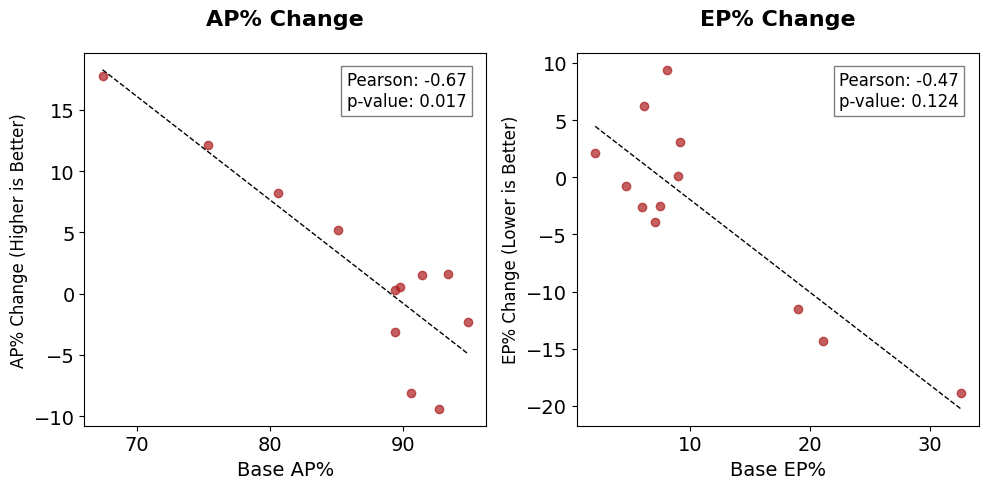

In [43]:
from scipy.stats import pearsonr, spearmanr

def compute_correlation(x, y):
    pearson_corr, pearson_p = pearsonr(x, y)
    spearman_corr, spearman_p = spearmanr(x, y)
    return {
        "Pearson Coefficient": pearson_corr,
        "Pearson p-value": pearson_p,
        "Spearman Coefficient": spearman_corr,
        "Spearman p-value": spearman_p
    }

# Use the original DataFrame instead of the styled version
base_ap_change_corr = compute_correlation(
    hypoglycemia_summary['Base AP%'], 
    hypoglycemia_summary['AP% Change']
)
base_ep_change_corr = compute_correlation(
    hypoglycemia_summary['Base EP%'], 
    hypoglycemia_summary['EP% Change']
)

# plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for Base AP% vs AP% Change
axs[0].scatter(hypoglycemia_summary['Base AP%'], hypoglycemia_summary['AP% Change'], 
               color=model1_color, alpha=0.7)
axs[0].set_title('AP% Change', fontsize=16, fontweight='bold', pad=20)
axs[0].set_xlabel('Base AP%', fontsize=14)
axs[0].set_ylabel('AP% Change (Higher is Better)', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)

# Add regression line without confidence interval (ci=None)
sns.regplot(x=hypoglycemia_summary['Base AP%'], 
            y=hypoglycemia_summary['AP% Change'], 
            ax=axs[0], 
            scatter=False, 
            color='black', 
            ci=None,
            line_kws={'linestyle': '--', 'linewidth': 1})

# Scatter plot for Base EP% vs EP% Change
axs[1].scatter(hypoglycemia_summary['Base EP%'], hypoglycemia_summary['EP% Change'], 
               color=model1_color, alpha=0.7)
axs[1].set_title('EP% Change', fontsize=16, fontweight='bold', pad=20)
axs[1].set_xlabel('Base EP%', fontsize=14)
# For the second plot (ax1)
axs[1].set_ylabel('EP% Change\n(Lower is Better)', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)

# Add regression line without confidence interval (ci=None)
sns.regplot(x=hypoglycemia_summary['Base EP%'], 
            y=hypoglycemia_summary['EP% Change'], 
            ax=axs[1], 
            scatter=False, 
            color='black', 
            ci=None,
            line_kws={'linestyle': '--', 'linewidth': 1})

# Add correlation coefficients to the plots
axs[0].text(0.95, 0.95, f"Pearson: {base_ap_change_corr['Spearman Coefficient']:.2f}\np-value: {base_ap_change_corr['Spearman p-value']:.3f}",
            transform=axs[0].transAxes, 
            fontsize=12, 
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))
axs[1].text(0.95, 0.95, f"Pearson: {base_ep_change_corr['Spearman Coefficient']:.2f}\np-value: {base_ep_change_corr['Spearman p-value']:.3f}",
            transform=axs[1].transAxes, 
            fontsize=12, 
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()
axs[0].set_ylabel('AP% Change (Higher is Better)', fontsize=12)
axs[1].set_ylabel('EP% Change (Lower is Better)', fontsize=12)
plt.draw()  # Force redraw

In [44]:
# Create the DataFrame
data = {
    "Patient ID": [584, 575, 563, 559, 540, 596, 588, 570, 591, 567, 552, 544],
    "Total Slices": [582, 3704, 2142, 1620, 5082, 876, 846, 1140, 1674, 2412, 1974, 1134]
}

df = pd.DataFrame(data)

In [45]:
# Get training data for each patient
training_data = pd.DataFrame({
    "Patient ID": df["Patient ID"],
    "Total Training Slices": df["Total Slices"]
})

# Join the training data with the hypoglycemia summary based on Patient ID
# First convert the Patient ID column to match the format in training_data
hypoglycemia_summary["Patient ID"] = hypoglycemia_summary["Patient ID"].str.extract(r'Patient (\d+)').astype(int)

# Now merge the dataframes on Patient ID
hypoglycemia_summary = pd.merge(
    hypoglycemia_summary,
    training_data,
    on="Patient ID",
    how="left"
)

# Reset the index to ensure proper formatting
hypoglycemia_summary = hypoglycemia_summary.reset_index(drop=True)

In [46]:
hypoglycemia_summary


,Patient ID,Base AP%,Fine-tuned AP%,AP% Change,Base EP%,Fine-tuned EP%,EP% Change,Total Training Slices
0,540,89.4,89.7,0.3,9.0,9.1,0.1,5082
1,544,90.6,82.5,-8.1,8.1,17.5,9.4,1134
2,552,91.4,92.9,1.5,6.0,3.4,-2.6,1974
3,559,94.9,92.6,-2.3,2.1,4.2,2.1,1620
4,563,89.4,86.4,-3.1,9.2,12.2,3.1,2142
5,567,93.4,95.1,1.6,4.7,3.9,-0.8,2412
6,570,67.4,85.2,17.8,32.6,13.6,-18.9,1140
7,575,89.8,90.3,0.5,7.5,5.0,-2.5,3704
8,584,85.1,90.3,5.2,7.1,3.2,-3.9,582
9,588,92.7,83.3,-9.4,6.2,12.5,6.2,846


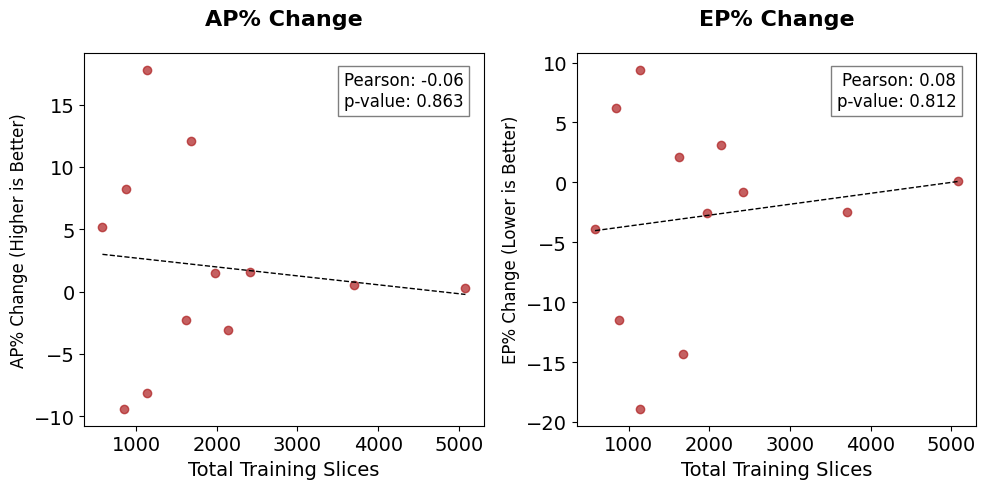

In [47]:
def compute_correlation(x, y):
    pearson_corr, pearson_p = pearsonr(x, y)
    spearman_corr, spearman_p = spearmanr(x, y)
    return {
        "Pearson Coefficient": pearson_corr,
        "Pearson p-value": pearson_p,
        "Spearman Coefficient": spearman_corr,
        "Spearman p-value": spearman_p
    }

# Use the original DataFrame instead of the styled version
base_ap_change_corr = compute_correlation(
    hypoglycemia_summary['Total Training Slices'], 
    hypoglycemia_summary['AP% Change']
)
base_ep_change_corr = compute_correlation(
    hypoglycemia_summary['Total Training Slices'], 
    hypoglycemia_summary['EP% Change']
)

# plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for Base AP% vs AP% Change
axs[0].scatter(hypoglycemia_summary['Total Training Slices'], hypoglycemia_summary['AP% Change'], 
               color=model1_color, alpha=0.7)
axs[0].set_title('AP% Change', fontsize=16, fontweight='bold', pad=20)
axs[0].set_xlabel('Total Training Slices', fontsize=14)
axs[0].set_ylabel('AP% Change', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)

# Add regression line without confidence interval (ci=None)
sns.regplot(x=hypoglycemia_summary['Total Training Slices'], 
            y=hypoglycemia_summary['AP% Change'], 
            ax=axs[0], 
            scatter=False, 
            color='black', 
            ci=None,
            line_kws={'linestyle': '--', 'linewidth': 1})

# Scatter plot for Base EP% vs EP% Change
axs[1].scatter(hypoglycemia_summary['Total Training Slices'], hypoglycemia_summary['EP% Change'], 
               color=model1_color, alpha=0.7)
axs[1].set_title('EP% Change', fontsize=16, fontweight='bold', pad=20)
axs[1].set_xlabel('Total Training Slices', fontsize=14)
axs[1].set_ylabel('EP% Change', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)

# Add regression line without confidence interval (ci=None)
sns.regplot(x=hypoglycemia_summary['Total Training Slices'], 
            y=hypoglycemia_summary['EP% Change'], 
            ax=axs[1], 
            scatter=False, 
            color='black', 
            ci=None,
            line_kws={'linestyle': '--', 'linewidth': 1})

# Add correlation coefficients to the plots
axs[0].text(0.95, 0.95, f"Pearson: {base_ap_change_corr['Spearman Coefficient']:.2f}\np-value: {base_ap_change_corr['Spearman p-value']:.3f}",
            transform=axs[0].transAxes, 
            fontsize=12, 
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))
axs[1].text(0.95, 0.95, f"Pearson: {base_ep_change_corr['Spearman Coefficient']:.2f}\np-value: {base_ep_change_corr['Spearman p-value']:.3f}",
            transform=axs[1].transAxes, 
            fontsize=12, 
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()
axs[0].set_ylabel('AP% Change (Higher is Better)', fontsize=12)
axs[1].set_ylabel('EP% Change (Lower is Better)', fontsize=12)
plt.show()

In [48]:
# Create the DataFrame
data = {
    "Patient ID": [584, 575, 563, 559, 540, 596, 588, 570, 591, 567, 552, 544],
    "Total Slices": [582, 3704, 2142, 1620, 5082, 876, 846, 1140, 1674, 2412, 1974, 1134]
}

df = pd.DataFrame(data)

In [49]:
hypoglycemia_summary


,Patient ID,Base AP%,Fine-tuned AP%,AP% Change,Base EP%,Fine-tuned EP%,EP% Change,Total Training Slices
0,540,89.4,89.7,0.3,9.0,9.1,0.1,5082
1,544,90.6,82.5,-8.1,8.1,17.5,9.4,1134
2,552,91.4,92.9,1.5,6.0,3.4,-2.6,1974
3,559,94.9,92.6,-2.3,2.1,4.2,2.1,1620
4,563,89.4,86.4,-3.1,9.2,12.2,3.1,2142
5,567,93.4,95.1,1.6,4.7,3.9,-0.8,2412
6,570,67.4,85.2,17.8,32.6,13.6,-18.9,1140
7,575,89.8,90.3,0.5,7.5,5.0,-2.5,3704
8,584,85.1,90.3,5.2,7.1,3.2,-3.9,582
9,588,92.7,83.3,-9.4,6.2,12.5,6.2,846
